<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2018 </h1>

<H3 align='center'> Tarea 0 - Introducción a Redes Neuronales </H3>

<hr style="height:2px;border:none"/>
<p align='center'> Alfredo Silva Celpa   201373511-8 </p>
<p align='center'> Margarita Bugueño Pérez   201373510-K </p>

**Temas**  
* NNs por dentro: *back-propagation from scratch*.
* Principales hiperparámetros de *back propagation*
* Introducción a keras
* Verificación numérica de las derivadas implementadas.

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de responder preguntas sobre cada punto del trabajo realizado*)
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega: 30 de Marzo.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea0-INF395-I-2018]

<hr style="height:2px;border:none"/>


#### Paquetes instalación
Para poder trabajar en el curso se necesitará instalar librerías para Python, por lo que se recomienda instalarlas a través de *anaconda* (para Windows y sistemas Unix) en un entorno virtual, donde podrán elegir su versión de Python. Se instalarán librerías como __[*sklearn*](http://scikit-learn.org/stable/)__, una librería simple y de facil acceso para *data science*, __[*keras*](https://keras.io/)__ en su versión con GPU (para cálculo acelerado a través de la tarjeta gráfica), además de que ésta utiliza como *backend* *TensorFlow* o *Theano*, por lo que habrá que instalar alguno de éstos, además de las librerías básicas de *computer science* como *numpy*, *matplotlib*, *pandas*, además de claramente *jupyter*.

* __[Descargar anacona](https://www.anaconda.com/download/#linux)__ 

* Luego de instalar Anaconda y tenerla en el *path* de su computador crear un entorno virtual: 
```
conda create -n redesneuronales python=version
```

con *version*, la version de Python que desea utilizar. Si está en Windows, se recomienda Python 3 debido a dependencias con una de las librerías a utilziar.
 
* Acceder al ambiente creado 
```
source activate redesneuronales
```

* Instalar los paquetes a utilizar
```
conda install jupyter sklearn numpy pandas matplotlib keras-gpu tensorflow-gpu 
```

* Para salir del entorno
```
source deactivate redesneuronales
```
<hr style="height:1px;border:none"/>


La tarea se divide en cuatro secciones:

[1.](#primero)   Back-propagation (BP) from *Scratch*   
[2.](#segundo)   Comparar back-propagation (BP) de Keras  
[3.](#tercero)   Verificación numérica del gradiente para una componente  
[4.](#cuarto)   Implementar momentum como variante

<a id="primero"></a>
## 1. Back-propagation (BP) from *Scratch*

BP (Back-propagation) es sin duda el paradigma dominante para entrenar redes neuronales *feed-forward*. En
redes grandes, diseñadas para problemas reales, implementar BP eficientemente puede ser una tarea delicada
que puede ser razonable delegar a una librerı́a especializada. Sin embargo, construir BP *from scratch* es muy
útil con fines pedagógicos.

$$ w^{(t+1)} \leftarrow w^{(t)} - \eta \nabla_{w^{(t)}} Loss $$
 
> a) Escriba un programa que permita entrenar una red FF con una arquitectura fija de 2 capa ocultas (con 32 neuronas en la primera capa y 16 en la segunda) y $K$ neuronas de salida, sin usar librerı́as, excepto eventualmente *numpy* para implementar operaciones básicas de algebra lineal. Por simplicidad, asuma funciones de activacion y error (*loss function*) diferenciables o subdiferenciables, además de tener la misma función de activación para las 2 capas ocultas. Adapte la arquitectura para un problema de clasificación de 3 clases, es decir la función de activación para la capa de salida debe ser **softmax** con número de neuronas $K$=3. Escriba funciones para:  
* (i)  implementar el *forward pass*  
* (ii) implementar el *backward pass*  
* (iii) implementar la rutina principal de entrenamiento, adoptando, por simplicidad, la variante cíclica aleatorizada de SGD (un ejemplo a la vez, pero iterando cíclicamente sobre una configuración aleatoria del conjunto de entrenamiento) con una tasa de aprendizaje fija de 0.1 y número de ciclos fijos (*epochs*).



In [91]:
def softmax_pre(x): #lo mismo
    salida=[] 
    suma=0.0
    for elemento in range(len(x)):
        aux=np.minimum(x[elemento],epsilon_gigantes)
        suma+=np.exp(aux)
    for elemento in range(len(x)):
        aux=np.minimum(x[elemento],epsilon_gigantes)
        temp=np.exp(aux)/suma
        salida.append(temp)
    return salida

In [92]:
a=[534.0,746.0,425.0]
b=np.max(a)
e=np.exp(a-b)
e/np.sum(e)

array([  8.50295414e-093,   1.00000000e+000,   3.90365393e-140])

In [93]:
softmax_pre(a)

[2.1705220113036397e-29, 1.0, 9.9647330101036719e-77]

In [94]:
import numpy as np

epsilon=1e-15
epsilon_gigantes=600
x_muy_grande=600
#constante para aproximar RELU
K=0.5
def sigmoidal(x):
    if (x>0):
        x = np.maximum(epsilon,x)
        return 1/(1+ np.exp(-x))
    elif(x<0):
        x = np.maximum(-600,x)
        return 1/(1+ np.exp(-x))
    else:
        return 1/(1+ np.exp(-(epsilon)))

def d_sigmoidal(x):
    return sigmoidal(x)*(1-sigmoidal(x))

def relu(x):#probar sin los trukillos
    #return np.maximum(0,x)
    x_aux=np.minimum(x,x_muy_grande)
    return (1/(2*K))*np.log(1+np.exp(2*K*x_aux))

def d_relu(x):#probar sin los trikullos
    x_aux=np.minimum(x,x_muy_grande)
    return np.exp(2*K*x_aux)/(np.exp(2*K*x_aux)+1)
    
    
#donde x es un vector
def softmax(x): 
    b=np.max(x)
    e=np.exp(x-b)
    return e/np.sum(e)

def d_softmax(x):
    return softmax(x)*(np.subtract(1,softmax(x)))

def error_mse(ytrue, ypred):
    return (0.5)*((np.subtract(ytrue,ypred))**2)

def d_error_mse(ytrue, ypred):
    return (np.subtract(ytrue,ypred))

#ypred, ytrue componentes
def error_CE(ytrue,ypred):
    vector_retorno=[]
    for i in range(len(ytrue)):
        aux = np.maximum(ypred[i],epsilon) 
        temp=-(ytrue[i]*np.log(aux)
        vector_retorno.append(temp)
    return vector_retorno

def d_error_CE(ytrue,ypred):
    #return (np.subtract(ytrue,ypred))/(ypred*(np.subtract(1,ypred)))
    vector_retorno=[]
    for i in range(len(ytrue)):
        aux = np.maximum(ypred[i],epsilon)
        temp = -ytrue[i]/aux 
        #tmp=np.minimum(temp,epsilon_gigantes) #aqui le pongo el techo epsilon/5 funca piola
        vector_retorno.append(temp)
    return vector_retorno


#definir el modelo y su arquitectura
#total capas= capas ocultas + capa de salida
def size_layers(total_capas,input_size,n_capa_o1, n_capa_o2, n_capa_out):
    sizes=np.arange(total_capas+1)
    sizes[0]=input_size
    sizes[1]=n_capa_o1
    sizes[2]=n_capa_o2    
    sizes[3]=n_capa_out
    return sizes

def iniciar_estructuras(total_capas,tamanios_arquit):
    #vector sallida de cada capa, vector derivada de sallida respecto a w, vector error en la salida de cada capa
    salida_l=[]
    da_salida_l=[]
    e_salida_l=[]
    for i in np.arange(total_capas+1):        
        if i<total_capas:
            salida_l.append(np.zeros(tamanios_arquit[i+1]))
        else: 
            salida_l.append(np.zeros(tamanios_arquit[0]))
            
    da_salida_l=salida_l.copy()
    e_salida_l=salida_l.copy()    
    #matrices de pesos originales, matrices errores de pesos
    #matrices de peso inicializadas como 1
    m_pesos=[]
    for i in np.arange(total_capas):
        m_pesos.append(np.random.uniform(-0.1,0.1,([tamanios_arquit[i],tamanios_arquit[i+1]])))
    #matrices de errores en los pesos inicializadas como 0
    e_m_pesos=[]
    for i in np.arange(total_capas):
        e_m_pesos.append(np.zeros((tamanios_arquit[i],tamanios_arquit[i+1])))  
    momentums=[]
    for i in np.arange(total_capas):
        momentums.append(np.zeros((tamanios_arquit[i],tamanios_arquit[i+1])))
      
    return salida_l, da_salida_l, e_salida_l, m_pesos, e_m_pesos, momentums    

def one_hot(posicion):
    array=np.zeros(3)
    array[posicion]=1
    return array


In [95]:
def vector2hot(vector):
    array=np.zeros(len(vector))
    posicion=np.argmax(vector)
    array[posicion]=1.0
    return array

In [96]:
def forwarding(total_capas, vector_x, salida_l, da_salida_l,m_pesos, vector_arquit, f_activ):
    vector=vector_x.copy() #se modifica en cada capa
    salida_l[-1]=vector.copy()
    da_salida_l[-1]=vector.copy()
    for capa in range(total_capas-1):
        salida_capa=[]
        d_salida_capa=[]

        for neurona in range(vector_arquit[capa+1]):
            #pesos como vector columna de m_pesos
            w=(m_pesos[capa].T[neurona]).copy() #vector pesos hacia neurona desde las xs inputs (vector dimesion entrada a capa)
            temp= np.dot(vector,w)
            if f_activ=="sigmoid":
                temp1=sigmoidal(temp)
                temp2=d_sigmoidal(temp)
                salida_capa.append(temp1)
                d_salida_capa.append(temp2)
            else:                 
                temp1=relu(temp)
                temp2=d_relu(temp)
                salida_capa.append(temp1)
                d_salida_capa.append(temp2)
        salida_l[capa]=salida_capa.copy()
        da_salida_l[capa]=d_salida_capa.copy()
        vector=salida_capa.copy()
    salida_last_t=[]
    d_salida_last=[] 
    #EN SOFTMAX
    for neurona in range(vector_arquit[-1]): #0,1,2               
        #pesos como vector columna de m_pesos
        w=(m_pesos[-1].T[neurona]).copy() #vector pesos entre ult. capa oculta y la capa out (dimesion largo de capa anterior)
        temp= np.dot(vector,w) #elemento i-esimo entrada a softmax (de la salida de la capa)
        salida_last_t.append(temp) #vector de w*a    
    salida_last=softmax(salida_last_t)
    d_salida_last=d_softmax(salida_last_t)
    salida_l[-2]=salida_last.copy()
    da_salida_l[-2]=d_salida_last.copy()
    vector=salida_last.copy()
    return vector

In [1]:
def backwarding(total_capas, vector_x, vector_y, tipo_error ,tasa, salida_l, da_salida_l,e_salida_l,m_pesos, vector_arquit,e_m_pesos):

    if tipo_error=="mse":
        error_EA=d_error_mse(vector_y,salida_l[-2])
    else:
        error_EA=d_error_CE(vector_y,salida_l[-2]) 
    
    m_pesos_copia = m_pesos.copy()
    
    for neurona_final in range(vector_arquit[-1]):
        error_EW_n=error_EA[neurona_final]*da_salida_l[-2][neurona_final]*m_pesos_copia[total_capas-1].T[neurona_final]*np.array(salida_l[-3])
        e_m_pesos_T=e_m_pesos[total_capas-1].T.copy()
        e_m_pesos_T[neurona_final]=error_EW_n.copy()
        e_m_pesos[total_capas-1] = e_m_pesos_T.T.copy()
        #correccion vector de pesos-matriz final correspondiente a la neurona
        pesos_auxiliar=m_pesos[total_capas-1].T.copy()
        pesos_auxiliar[neurona_final]= pesos_auxiliar[neurona_final].copy()-(tasa*error_EW_n)
        #print ("el peso termina siendo",pesos_auxiliar[neurona_final])

        m_pesos[total_capas-1]=pesos_auxiliar.T.copy()
    e_salida_l[total_capas-1]=error_EA.copy() #es el triangulo (Delta mayus.)        
    #backwarding de capas ocultas y capa input
    #corrección de pesos que debiese ser por batch         
    for capa in np.arange(total_capas-2,-1,-1): #se mueve en capa 1 y 0
        error_EA_s=np.sum(e_salida_l[capa+1]) #suma el vector EA calculado en la capa 2 (igual para todos)
        error_aux=[]
        pesos_auxiliar2=m_pesos[capa].T.copy() #se hace (16x32 la matriz)
        for neurona in range(vector_arquit[capa+1]):
            error_EW_s=error_EA_s*da_salida_l[capa][neurona]*m_pesos_copia[capas].T[neurona]*np.array(salida_l[capa-1])
            e_m_pesos[capa].T[neurona]=error_EW_s.copy()
            arreglo=(pesos_auxiliar2[neurona]-(tasa*error_EW_s)).copy() 
            pesos_auxiliar2[neurona]=arreglo.copy() 
            m_pesos[capa]=(pesos_auxiliar2.T).copy()
            error_aux.append(error_EA_s.copy())
        e_salida_l[capa]=error_aux.copy()

    return m_pesos,e_m_pesos

In [98]:
def shuffling(X_train,y_onehot):
    concatenados = []
    y_onehot_shuffled=[]
    X_train_shuffled=[]
    
    for i in range(X_train.shape[0]):
        concatenados.append((X_train[i], y_onehot[i]))
        
    np.random.shuffle(concatenados)
    
    for i in range(len(concatenados)):
        X_train_shu,y_onehot_shu = concatenados[i]
        y_onehot_shuffled.append(y_onehot_shu)
        X_train_shuffled.append(X_train_shu)
    
    return X_train_shuffled,y_onehot_shuffled

In [134]:
class NN_2ocultas:
    def __init__(self, total_capas, tamanios_arquit):
        self.n_capa_in=tamanios_arquit[0]
        self.n_capa_1=tamanios_arquit[1]
        self.n_capa_2=tamanios_arquit[2]
        self.n_capa_out=tamanios_arquit[3]
        self.total_capas=total_capas
        self.salidas_l, self.da_salida_l, self.e_salida_l, self.m_pesos, self.e_m_pesos, self.momentums =iniciar_estructuras(total_capas,tamanios_arquit)

    def training(self, Xtrain, Ytrain, epoch, error, f_activ, tasa, tipo_back, reinit, mu):
        t=size_layers(self.total_capas,self.n_capa_in,self.n_capa_1, self.n_capa_2, self.n_capa_out)
        y_pred=forwarding(self.total_capas, Xtrain, self.salidas_l, self.da_salida_l,self.m_pesos, t, f_activ)

        if(error=="mse"):
            v_e = error_mse(y_pred, Ytrain)
            E = np.sum(v_e)/len(v_e)
            vector_hot=vector2hot(y_pred)
            acc = np.dot(vector_hot,Ytrain)
        else:
            print("ypred",y_pred)
            print("ytrain",Ytrain)
            v_e = error_CE(y_pred, Ytrain)
            E = np.sum(v_e)
            vector_hot=vector2hot(y_pred)
            acc = np.dot(vector_hot,Ytrain)
        if tipo_back=="grad":
            self.m_pesos,self.e_m_pesos = backwarding(self.total_capas, Xtrain, Ytrain, error , tasa, 
                                                      self.salidas_l, self.da_salida_l,self.e_salida_l,
                                                      self.m_pesos, t,self.e_m_pesos)
        else:
            self.m_pesos,self.e_m_pesos = backwarding_momentum(self.total_capas, Xtrain, Ytrain, error , tasa, 
                                                               self.salidas_l, self.da_salida_l,self.e_salida_l,
                                                               self.m_pesos, t,self.e_m_pesos, mu, self.momentums)
        return E,acc
    
    def entrenamiento(self,tamanios_arquit,Xtrain,Ytrain, f_activ, tasa, tipo_back, reinit, mu):
        errores=[]
        acc_epoch=[]
        for i in range(100):
            X_t,Y_t = shuffling(Xtrain,Ytrain)
            print("Epoch: ",i)
            acc_batch=[]
            err_batch=[]
            if reinit==1:
                momentums=[]
                for i in np.arange(self.total_capas):
                    momentums.append(np.zeros((tamanios_arquit[i],tamanios_arquit[i+1])))
                self.momentums=momentums.copy()
            for j in range(len(X_t)):
                #print("Batch: ",j)
                print ("EJEMPLO : ", X_t[j],Y_t[j])
                error,acc=self.training(X_t[j],Y_t[j],1,"ce", f_activ, tasa, tipo_back, reinit, mu) #lo definimos ce porque mse no aprende (problema mal planteado)
                acc_batch.append(acc)
                err_batch.append(error)
            acc_epoch.append(acc_batch)
            errores.append(err_batch)
        return errores,acc_epoch
    
        


> b) Escriba una función que permita hacer predicciones mediante la red FF definida anteriormente, sin usar librerı́as, excepto eventualmente *numpy*. Escriba una función vectorizada que implemente el forward pass sobre un conjunto de $n_{t}$ ejemplos, además de implementar la función de decisión, que a través de la salida de la red prediga el valor categórico de la clase (1, 2 o 3).



In [135]:
def prediccion(redN,df_x,df_y,vector_arquit):
    vector_clase=[]
    for ejemplo in range(df_x.shape[0]):
        vector_x=df_x[ejemplo]
        temp_retorno=forwarding(redN.total_capas, vector_x, redN.salidas_l, redN.da_salida_l,redN.m_pesos, vector_arquit)
        vector_clase.append(temp_retorno)
    return vector_clase

def clase_vector(array_vector):
    to_return=[]
    for arreglo in array_vector:
        aux=np.argmax(a)+1
        to_return.append(aux)
    return to_return
        

> c) Demuestre que sus programas funcionan en un problema de clasificación. Para esto utilice el dataset **iris**, disponible a través de la librería __[*sklearn*](http://scikit-learn.org)__, el cual corresponde a la clasificación de distintos tipos de plantas de iris (3 clases) mediante 4 características reales continuas específicas de la planta, deberá entrenar (ajustar) los pesos de la red para realizar la tarea encomendada, variando las funciones de error (*loss*) entre *categorical cross entropy* y *mean squared error*, además de variar las funciones de activación para las 2 capas ocultas entre  ReLU (Rectifier Linear Unit) y la función logística (*sigmoid*). Especifique explícitamente las funciones anteriores, así como sus gradientes. Recuerde que debe transformar las etiquetas usando *one hot vectors*.
<div class="alert alert-block alert-info">Es una buena práctica el normalizar los datos antes de trabajar con el modelo</div>
```python
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
#transform target to one hot vector
import keras
y_onehot = keras.utils.to_categorical(y_train)
```
Para evaluar los resultados, construya un gráfico correspondiente al error de clasificación versus número
de epochs, utilizando sólo el conjunto de entrenamiento (el objetivo de esta sección es familiarizarse
con el algoritmo BP, no encontrar la mejor red). Grafique también la evolución de la función objetivo utilizada para el entrenamiento. Además de reportar el tiempo de entrenamiento mediante el algoritmo implementado.  
Por último, para alguna configuración elegida, reporte la matriz de confusión mediante el uso de librerías como *sklearn* o *keras*.

## ARREGLAR RELU


In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
#transform target to one hot vector
import keras
y_onehot = keras.utils.to_categorical(y_train)

In [136]:
arquitectura=size_layers(3,4,32,16,3) #(3,4,32,16,3)
modelo=NN_2ocultas(3, arquitectura)
print ("MPESOS ORIGINAL",modelo.m_pesos)
print (X_train.shape[0])
errores,accs = modelo.entrenamiento(arquitectura,X_train,y_onehot, "sigmoid", 0.1, "grad",0, 0.1) 
promerr=[]
promacc=[]
#calculo de los promedios por epoch
for i in range(len(errores)):
    prome=np.mean(errores[i])
    proma=np.mean(accs[i])
    promerr.append(prome)
    promacc.append(proma)

print ("MPESOS FINAL",modelo.m_pesos)

MPESOS ORIGINAL [array([[ -4.68001692e-02,   1.84026322e-02,   6.37538589e-03,
          5.29276591e-02,   5.77660744e-02,   4.30741675e-02,
         -3.47061981e-02,  -1.18544349e-02,  -4.43440198e-02,
         -8.18483512e-02,  -1.20745256e-02,  -3.29660680e-02,
          8.17863783e-02,  -3.68920970e-02,   9.01885614e-02,
          6.45586082e-02,  -9.26496133e-02,  -2.50691622e-02,
          9.26953381e-02,  -2.01044259e-02,   7.77614678e-02,
         -3.92168680e-02,   4.40783481e-03,   9.40013313e-02,
         -6.34755540e-02,   9.46653938e-02,   2.22023097e-02,
          6.05706989e-02,  -2.67027542e-02,  -5.55916234e-02,
          6.50692737e-02,   4.29102968e-02],
       [ -6.83711632e-02,   1.81577524e-03,   2.50632535e-02,
         -3.03249731e-02,  -7.62816965e-02,  -3.10568992e-02,
         -9.17952768e-02,  -4.76277105e-02,  -4.02240539e-02,
          6.37292361e-06,  -2.84020871e-02,  -6.97756058e-02,
          8.25682693e-02,  -3.81751116e-02,   6.36642848e-02,
        

EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.09523126  0.38268903  0.5220797 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.51337539  0.02350449 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.04273086  0.33457898  0.62269015]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904 -1.74477836 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.02612548  0.59316431  0.38071021]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.01691969  0.73652015  0.24656016]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.76501198 -0.35636057  1.44514709  0.79059079] [ 0.  0.  1.]
ypred [ 0.01220612  0.80992177  0.17787212]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.0605359   0.49326672  0.44619738]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.0858025   0.47999779  0.43419971]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333

EJEMPLO :  [-1.50652052  0.80065426 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [  1.80564647e-04   2.53573231e-01   7.46246204e-01]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.02139903  0.36037668  0.61822429]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.91683689 -0.35636057  0.47843012  0.13322594] [ 0.  1.  0.]
ypred [ 0.01941838  0.32702082  0.65356081]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.01763674  0.38876679  0.59359647]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.58776353  0.76275864  1.57942861] [ 0.  0.  1.]
ypred [ 0.015964    0.35189458  0.63214142]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969 -1.51337539  0.02350449 -0.12972   ] [ 0.  1.  0.]
ypred [  3.86954408e-04   1.87586653e-01   8.12026392e-01]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [  2.57247853e-04   4.58360324e-01   5.41382428e-

ypred [ 0.55849613  0.20719522  0.23430864]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654  -0.58776353  0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.53111774  0.22723564  0.24164662]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969 -1.74477836  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.63974949  0.11720859  0.24304192]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.46898108  0.35248492  0.178534  ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.28650682  0.60470199  0.10879119]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.76275864  0.79059079] [ 0.  0.  1.]
ypred [ 0.46101134  0.37846167  0.16052699]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.81962435  1.05353673] [ 0.  0.  1.]
ypred [ 0.43325798  0.35567789  0.21106413]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -1.74477836  0.36469871  0.13322594] [ 0.  1.  0.]
ypred [ 0.47089715  

EJEMPLO :  [ 1.2803405   0.10644536  0.93335575  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.72142529  0.26074593  0.01782878]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.4321654   0.80065426  0.93335575  1.44795564] [ 0.  0.  1.]
ypred [ 0.71528838  0.25852786  0.02618377]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346 -1.05056946  1.78634131  1.44795564] [ 0.  0.  1.]
ypred [ 0.706478    0.25534351  0.03817849]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133   0.80065426 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.87955639  0.11489895  0.00554466]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.2844067  -1.18150376] [ 1.  0.  0.]
ypred [ 0.89852534  0.09680324  0.00467142]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.76501198 -0.35636057  1.44514709  0.79059079] [ 0.  0.  1.]
ypred [ 0.73039607  0.22104582  0.04855811]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.71433173  0.21618413  0.06948414]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566

EJEMPLO :  [-0.41600969 -1.28197243  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.4540184   0.54174771  0.00423389]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654  -1.97618132  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.286401    0.71092082  0.00267817]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.1372359  -0.26119297] [ 0.  1.  0.]
ypred [ 0.20196117  0.79615442  0.00188441]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.53529583  0.39617188] [ 0.  1.  0.]
ypred [ 0.29120796  0.68067703  0.02811501]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.1941016  -0.26119297] [ 0.  1.  0.]
ypred [ 0.12403867  0.87480473  0.0011566 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.16133424  0.8341521   0.00451366]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [  8.64755609e-02   9.12718387e-01   8.06052606e-04]
ytrain [ 1.  0.  0.]
EJEMP

EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.11705606  0.09140442  0.79153952]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.36042671  0.08720614  0.55236715]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.91683689 -0.1249576   0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.31457608  0.13715378  0.54827014]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.29758958  0.18301816  0.51939227]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346 -0.58776353  1.67260991  1.05353673] [ 0.  0.  1.]
ypred [ 0.2681564   0.1651185   0.56672511]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.13370684  0.05168247  0.81461069]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.10176098  0.03858671  0.85965231]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367

ypred [ 0.36337966  0.47382991  0.16279043]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -0.58776353  0.76275864  0.39617188] [ 0.  0.  1.]
ypred [ 0.32391827  0.54787833  0.12820339]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478  0.10644536 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.23470806  0.39907241  0.36621953]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.65834543  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.51063644  0.25518562  0.23417795]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  1.27454998  1.71090158] [ 0.  0.  1.]
ypred [ 0.51659986  0.24689038  0.23650976]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.71090158] [ 0.  0.  1.]
ypred [ 0.47636054  0.22765944  0.29598002]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608  2.18907205 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.52453756  0.11980539  0.35565705]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691 -1.28197243  0.42156442  0.65911782] [ 0.  0.  1.]
ypred [ 0.70244346  

ypred [ 0.51387709  0.21421924  0.27190368]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.56925129 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.59699462  0.1037454   0.29925998]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [ 0.55100586  0.16639236  0.28260178]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.58776353  0.47843012  0.39617188] [ 0.  1.  0.]
ypred [ 0.69163772  0.12452884  0.18383345]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.50600226  0.3608929   0.13310484]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.12851559 -0.1249576   1.6157442   1.1850097 ] [ 0.  0.  1.]
ypred [ 0.52238964  0.29714957  0.18046079]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.15917263 -0.1249576   0.99022146  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.4882378   0.27769739  0.23406481]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.1372359  -0.26119297] [ 0.  1.  0.]
ypred [ 0.57212557  

EJEMPLO :  [ 2.24968346 -1.05056946  1.78634131  1.44795564] [ 0.  0.  1.]
ypred [ 0.69341536  0.29804647  0.00853818]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.52267624 -0.1249576   1.21768427  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.67115594  0.28847879  0.04036527]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.4321654   0.80065426  0.93335575  1.44795564] [ 0.  0.  1.]
ypred [ 0.58513585  0.2515053   0.16335885]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.08037019  0.00175297] [ 0.  1.  0.]
ypred [ 0.40091722  0.17231057  0.4267722 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.27172127  0.43903619  0.28924253]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346 -0.58776353  1.67260991  1.05353673] [ 0.  0.  1.]
ypred [ 0.16588661  0.65753007  0.17658333]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.11188803  0.44349421  0.44461776]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099

EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.00349579  0.54283254  0.45367167]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.01699023  0.53547799  0.44753178]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.01038463  0.32739258  0.6622228 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.56925129 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.04863265  0.31473906  0.6366283 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.18978351  0.26804238  0.5421741 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.1372359  -0.26119297] [ 0.  1.  0.]
ypred [ 0.46130972  0.17821389  0.36047639]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -0.58776353  0.76275864  0.39617188] [ 0.  0.  1.]
ypred [ 0.31054596  0.44678229  0.24267174]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717

ypred [ 0.12801667  0.84433144  0.02765189]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.11601105  0.76527661  0.11871234]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.76275864  0.79059079] [ 0.  0.  1.]
ypred [ 0.35060883  0.5621751   0.08721607]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.2721156   0.43632902  0.29155538]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.26418478  0.10644536 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.54505242  0.27271752  0.18223006]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.40150837  0.33784833  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.71268824  0.17222615  0.11508561]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.49486315 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.48311931  0.43887861  0.07800208]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.6812171   

EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.09611665  0.34378131  0.56010203]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.1372359  -0.26119297] [ 0.  1.  0.]
ypred [ 0.06113177  0.21867514  0.72019309]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.91683689 -0.35636057  0.47843012  0.13322594] [ 0.  1.  0.]
ypred [ 0.0395843   0.49417404  0.46624166]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.64384411  0.33784833  1.27454998  0.79059079] [ 0.  0.  1.]
ypred [ 0.02449875  0.68694477  0.28855648]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -1.28197243  0.08037019 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.01519323  0.42614354  0.55866323]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.00925946  0.65033789  0.34040265]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478  0.80065426 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.00565331  0.39715924  0.59718745]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.43216

EJEMPLO :  [ 0.55333328  0.56925129  0.53529583  0.52764485] [ 0.  1.  0.]
ypred [ 0.07300378  0.77692058  0.15007563]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.1941016  -0.26119297] [ 0.  1.  0.]
ypred [ 0.05474797  0.83269803  0.112554  ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.58776353  0.64902723  1.05353673] [ 0.  0.  1.]
ypred [ 0.04361036  0.8667368   0.08965284]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.0336709   0.66930988  0.29701922]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328  0.80065426  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.02296199  0.77452368  0.20251433]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.01507454  0.50863183  0.47629363]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.65834543  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.00937574  0.69438909  0.29623517]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.43216

EJEMPLO :  [ 2.24968346  1.72626612  1.67260991  1.31648267] [ 0.  0.  1.]
ypred [ 0.01227228  0.61598162  0.3717461 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.00746459  0.37471307  0.61782234]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.88617985 -0.58776353  1.33141568  0.92206376] [ 0.  0.  1.]
ypred [ 0.00490887  0.24639043  0.7487007 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.00358027  0.17976535  0.81665438]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.01739288  0.17729265  0.80531447]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.81962435  1.44795564] [ 0.  0.  1.]
ypred [ 0.01343851  0.13698415  0.84957734]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.01091166  0.11124938  0.87783896]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301

EJEMPLO :  [-1.02184904  0.33784833 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.5239428  0.017425   0.4586322]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -1.74477836  0.36469871  0.13322594] [ 0.  1.  0.]
ypred [ 0.70214555  0.0109023   0.28695215]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -0.1249576   0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.6737241   0.05092515  0.27535075]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.42044773  0.03177589  0.54777638]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.12851559 -0.1249576   1.6157442   1.1850097 ] [ 0.  0.  1.]
ypred [ 0.64709132  0.01935394  0.33355474]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.35636057  0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.39573709  0.01183256  0.59243035]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.87649005  1.44795564] [ 0.  0.  1.]
ypred [ 0.37845547  0.05500573  0.5665388 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904

EJEMPLO :  [-1.14301691 -1.28197243  0.42156442  0.65911782] [ 0.  0.  1.]
ypred [ 0.23423649  0.02980788  0.73595563]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  0.80065426 -1.17067529 -1.31297673] [ 1.  0.  0.]
ypred [ 0.1688907   0.02149227  0.80961703]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.53529583  0.00175297] [ 0.  1.  0.]
ypred [ 0.43444803  0.01462799  0.55092398]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.35636057  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.41135608  0.06700286  0.52164106]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.33414282  0.24212433  0.42373286]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.59287535  0.14804193  0.25908272]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.1372359  -0.26119297] [ 0.  1.  0.]
ypred [ 0.73638514  0.09585775  0.16775711]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068

EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [ 0.75714774  0.11339046  0.1294618 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608  2.18907205 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.55875933  0.34570054  0.09554012]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.71950119  0.21975833  0.06074049]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.4321654  -1.97618132  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.59358296  0.18128063  0.22513642]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.39823256  0.4507243   0.15104314]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.63411943  0.27404072  0.09183984]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.76501198 -0.35636057  1.44514709  0.79059079] [ 0.  0.  1.]
ypred [ 0.39598902  0.54665646  0.05735452]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982

ypred [ 0.09223244  0.09431357  0.81345399]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -0.58776353  0.42156442  0.13322594] [ 0.  1.  0.]
ypred [ 0.07054682  0.307258    0.62219518]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.04346012  0.57330922  0.38323067]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478  0.10644536 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.02782961  0.7267241   0.24544629]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.58776353  0.47843012  0.39617188] [ 0.  1.  0.]
ypred [ 0.11942613  0.65824346  0.22233041]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.08075029  0.76892043  0.15032928]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654  -1.97618132  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.0600779   0.82807343  0.11184867]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.15917263 -0.1249576   0.99022146  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.04760462  

ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.1249576   0.25096731  0.00175297] [ 0.  1.  0.]
ypred [ 0.08161993  0.18357319  0.73480688]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.05462243  0.45362339  0.49175418]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -0.8191665   0.76275864  0.52764485] [ 0.  1.  0.]
ypred [ 0.03343816  0.66554991  0.30101193]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904 -1.74477836 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.02272995  0.77263709  0.20463296]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.01697871  0.83018482  0.15283647]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.10644536  0.93335575  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.01179194  0.57657414  0.41163393]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.00717493  0.35082267  0.6420024 ]
ytrain [ 0.  0.  1.]

ypred [ 0.51049116  0.16400942  0.32549942]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.72626612 -1.2844067  -1.18150376] [ 1.  0.  0.]
ypred [ 0.31275758  0.10048202  0.58676039]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.64384411  1.26346019  1.33141568  1.71090158] [ 0.  0.  1.]
ypred [ 0.57743922  0.06179053  0.36077025]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.1249576   0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.35159227  0.0376162   0.61079152]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.58776353  0.47843012  0.39617188] [ 0.  1.  0.]
ypred [ 0.30901027  0.15419029  0.53679943]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.21422197  0.4136364   0.37214162]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.4321654   0.80065426  0.93335575  1.44795564] [ 0.  0.  1.]
ypred [ 0.13030756  0.25160458  0.61808786]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.31648267] [ 0.  0.  1.]
ypred [ 0.08569537  

ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.58776353  0.76275864  1.57942861] [ 0.  0.  1.]
ypred [ 0.48883348  0.02338785  0.48777867]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328  0.56925129  1.27454998  1.71090158] [ 0.  0.  1.]
ypred [ 0.30191095  0.01444473  0.68364432]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.4321654  -1.97618132  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.2081441   0.00995689  0.78189901]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691 -1.51337539 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.20041209  0.0467343   0.75285361]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -0.58776353  0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.17157617  0.18389321  0.64453062]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.11478427  0.4540254   0.43119032]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  0.53529583  0.52764485] [ 0.  1.  0.]
ypred [ 0.34831892  0.33424541  0.31743566]
ytrain [ 0.  1.  0.]

ypred [ 0.44416175  0.49288137  0.06295688]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.2747486   0.68630767  0.03894373]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.15917263 -0.58776353  0.59216153  0.26469891] [ 0.  1.  0.]
ypred [ 0.54728847  0.42839892  0.02431261]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.33358447  0.65159513  0.0148204 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -0.58776353  0.76275864  0.39617188] [ 0.  0.  1.]
ypred [ 0.22446053  0.76556809  0.00997138]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346 -1.05056946  1.78634131  1.44795564] [ 0.  0.  1.]
ypred [ 0.21611264  0.73709601  0.04679135]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.18499372  0.63095864  0.18404764]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.58776353  0.76275864  1.57942861] [ 0.  0.  1.]
ypred [ 0.12374778  

EJEMPLO :  [ 0.79566902 -0.1249576   0.81962435  1.05353673] [ 0.  0.  1.]
ypred [ 0.12068392  0.84244312  0.03687296]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966  0.80065426  0.42156442  0.52764485] [ 0.  1.  0.]
ypred [ 0.10630851  0.7420553   0.15163619]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  0.56925129 -1.17067529 -0.91855782] [ 1.  0.  0.]
ypred [ 0.07707624  0.81298064  0.10994312]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654  -0.58776353  0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.26775581  0.64500789  0.08723631]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.91683689 -0.35636057  0.47843012  0.13322594] [ 0.  1.  0.]
ypred [ 0.20780409  0.50058776  0.29160814]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.12887429  0.69027473  0.18085098]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.37351944  0.4964194   0.13006117]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099

ypred [ 0.0486462   0.63604213  0.31531167]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [ 0.03236965  0.75778755  0.20984279]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.70589294  0.39617188] [ 0.  0.  1.]
ypred [ 0.02382399  0.8217322   0.15444381]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -1.28197243  0.70589294  1.05353673] [ 0.  0.  1.]
ypred [ 0.01650964  0.56944688  0.41404348]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.01004672  0.34652947  0.64342381]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.1941016  -0.26119297] [ 0.  1.  0.]
ypred [ 0.0471337   0.33354731  0.61931898]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654   0.80065426  0.93335575  1.44795564] [ 0.  0.  1.]
ypred [ 0.0288268   0.59245147  0.37872173]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.01752582  

EJEMPLO :  [-0.90068117  0.56925129 -1.17067529 -0.91855782] [ 1.  0.  0.]
ypred [ 0.09780229  0.19915969  0.70303802]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969  1.03205722 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.31467142  0.15128594  0.53404264]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.70589294  0.65911782] [ 0.  1.  0.]
ypred [ 0.5788649  0.0929702  0.3281649]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.44398558  0.30432068  0.25169374]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.17067529 -1.31297673] [ 1.  0.  0.]
ypred [ 0.66029765  0.18592764  0.15377471]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.76995358  0.12590974  0.10413668]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.57786725  0.09448936  0.32764339]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182

EJEMPLO :  [-0.90068117  1.72626612 -1.05694388 -1.05003079] [ 1.  0.  0.]
ypred [ 0.04723227  0.83446468  0.11830305]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.33784833  1.10395287  1.44795564] [ 0.  0.  1.]
ypred [ 0.18545655  0.71339466  0.10114878]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.4321654  -1.97618132  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.13996803  0.53845213  0.32157984]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.08811938  0.70942425  0.20245637]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [ 0.29363231  0.54953944  0.15682825]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.18580974  0.71494977  0.09924049]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.70589294  0.65911782] [ 0.  1.  0.]
ypred [ 0.13149551  0.79827104  0.07023345]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652

ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328  0.80065426  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.39183313  0.47244064  0.13572623]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.88617985 -0.58776353  1.33141568  0.92206376] [ 0.  0.  1.]
ypred [ 0.27883927  0.3362018   0.38495892]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.58776353  0.64902723  1.05353673] [ 0.  0.  1.]
ypred [ 0.16952268  0.20439757  0.62607975]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -1.74477836  0.36469871  0.13322594] [ 0.  1.  0.]
ypred [ 0.1120609   0.13511541  0.75282369]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  1.26346019 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.07981499  0.38398881  0.53619619]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.15917263  0.33784833  1.21768427  1.44795564] [ 0.  0.  1.]
ypred [ 0.27437249  0.30280421  0.4228233 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.16711766  0.18443563  0.64844671]
ytrain [ 0.  0.  1.]

EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.49711844  0.09187839  0.41100317]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.68849316  0.05691349  0.25459334]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.57353152  0.21438604  0.21208243]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.33784833 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.72683511  0.13732021  0.13584468]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -0.8191665   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.80464513  0.09820511  0.09714976]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.61203519  0.0746975   0.31326731]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.8191665   0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.37626745  0.04591777  0.57781478]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717

ypred [ 0.09967109  0.79238378  0.10794513]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.58776353  0.76275864  1.57942861] [ 0.  0.  1.]
ypred [ 0.07596459  0.84176531  0.0822701 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.72626612 -1.05694388 -1.05003079] [ 1.  0.  0.]
ypred [ 0.05957832  0.66026944  0.28015223]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.22194599  0.54627121  0.2317828 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.28197243  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.49763115  0.35271284  0.14965601]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885626  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.30327344  0.60552108  0.09120549]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.57028261  0.37346492  0.05625246]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.72522074  

EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.44744867  0.04605879  0.50649255]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  0.33784833 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.27808438  0.0286218   0.69329382]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.55009778  0.01784004  0.43206218]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.33784833 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.33545329  0.01087712  0.65366959]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.59378924  0.00664875  0.39956201]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.73682605  0.00430844  0.25886551]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904 -1.74477836 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.46387953  0.00271174  0.53340873]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.91683

EJEMPLO :  [ 1.03800476  0.10644536  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [  7.80526187e-01   2.18863603e-01   6.10209765e-04]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.64384411  0.33784833  1.27454998  0.79059079] [ 0.  0.  1.]
ypred [ 0.77865062  0.21833751  0.00301187]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.76955251  0.21577799  0.0146695 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.51337539 -0.03336121 -0.26119297] [ 0.  1.  0.]
ypred [ 0.82842447  0.16065361  0.01092192]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691 -1.28197243  0.42156442  0.65911782] [ 0.  0.  1.]
ypred [ 0.56947947  0.42301254  0.00750799]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.10644536  0.93335575  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.55329986  0.41099783  0.03570231]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.48908808  0.36329736  0.14761455]
ytrain [ 1.  0.  0.]
EJEMP

ypred [ 0.27889015  0.41174106  0.30936879]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.40150837  0.33784833  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.16969478  0.64206682  0.1882384 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346 -1.05056946  1.78634131  1.44795564] [ 0.  0.  1.]
ypred [ 0.11340662  0.76079367  0.12579972]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -1.28197243  0.70589294  1.05353673] [ 0.  0.  1.]
ypred [ 0.08195803  0.54985132  0.36819065]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.70589294  0.39617188] [ 0.  0.  1.]
ypred [ 0.04986437  0.334537    0.61559863]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395  1.72626612 -1.17067529 -1.18150376] [ 1.  0.  0.]
ypred [ 0.03273883  0.21964283  0.74761834]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.13725379  0.19590988  0.66683633]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.52267624 -0.1249576   1.21768427  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.38748507  

EJEMPLO :  [ 0.79566902 -0.1249576   0.81962435  1.05353673] [ 0.  0.  1.]
ypred [ 0.17738546  0.79680237  0.02581217]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.16171711  0.72645439  0.1118285 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.11560347  0.80445592  0.0799406 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.3498508   0.59137855  0.05877064]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.29004831  0.49029793  0.21965376]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969  2.65187798 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.5599042   0.30393344  0.13616236]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.15917263 -0.58776353  0.59216153  0.26469891] [ 0.  1.  0.]
ypred [ 0.72008436  0.19331045  0.08660519]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068

EJEMPLO :  [ 1.64384411  0.33784833  1.27454998  0.79059079] [ 0.  0.  1.]
ypred [ 0.08748357  0.7089855   0.20353094]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.05738851  0.46511814  0.47749335]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.28197243  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.2157459   0.38697895  0.39727515]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.58776353  0.47843012  0.39617188] [ 0.  1.  0.]
ypred [ 0.13115949  0.62732785  0.24151266]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.64384411 -0.1249576   1.16081857  0.52764485] [ 0.  0.  1.]
ypred [ 0.08677739  0.75343364  0.15978897]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  0.56925129 -1.17067529 -0.91855782] [ 1.  0.  0.]
ypred [ 0.0597171   0.51851997  0.42176293]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691 -1.51337539 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.22233515  0.42884408  0.34882077]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652

EJEMPLO :  [ 2.24968346 -0.58776353  1.67260991  1.05353673] [ 0.  0.  1.]
ypred [ 0.29492961  0.32652053  0.37854986]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.25096731  0.39617188] [ 0.  1.  0.]
ypred [ 0.17933567  0.19854492  0.62211941]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966  0.80065426  0.42156442  0.52764485] [ 0.  1.  0.]
ypred [ 0.11820713  0.47173808  0.41005478]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.07266798  0.67524379  0.25208823]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -0.1249576   0.25096731  0.00175297] [ 0.  1.  0.]
ypred [ 0.04976751  0.77758133  0.17265116]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.91683689 -0.1249576   0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.03735607  0.8330549   0.12958903]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.93335575  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.02976452  0.86698168  0.1032538 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250

ypred [ 0.0528065   0.80578575  0.14140775]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691 -0.1249576  -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.04081949  0.84987216  0.10930835]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.16489743  0.73993416  0.09516841]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  0.53529583  0.52764485] [ 0.  1.  0.]
ypred [ 0.42896612  0.50595328  0.0650806 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.12851559 -0.1249576   1.6157442   1.1850097 ] [ 0.  0.  1.]
ypred [ 0.26655042  0.69301127  0.04043831]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.4321654  -1.97618132  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.2323272  0.6040505  0.1636223]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.15144009  0.7419044   0.10665551]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.10979358  0.8

ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.62768839 -1.74477836 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.58652712  0.18941141  0.22406147]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691 -1.28197243  0.42156442  0.65911782] [ 0.  0.  1.]
ypred [ 0.73325171  0.12219706  0.14455123]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.58776353  0.47843012  0.39617188] [ 0.  1.  0.]
ypred [ 0.51507352  0.08584048  0.39908601]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.4920192   1.72626612  1.50201279  1.05353673] [ 0.  0.  1.]
ypred [ 0.40091247  0.28845274  0.31063478]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.24667153  0.17747499  0.57585348]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.16619126  0.44583604  0.38797271]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.43075516  0.30437419  0.26487065]
ytrain [ 1.  0.  0.]

ypred [ 0.45237846  0.01643889  0.53118265]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.28390178  0.01031566  0.70578256]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.55491779  0.00641236  0.43866985]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.64384411  1.26346019  1.33141568  1.71090158] [ 0.  0.  1.]
ypred [ 0.3387364   0.00391458  0.65734902]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  0.80065426 -1.17067529 -1.31297673] [ 1.  0.  0.]
ypred [ 0.22887489  0.00264442  0.76848068]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.53529583  0.00175297] [ 0.  1.  0.]
ypred [ 0.50478109  0.00169845  0.49352046]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.91683689 -0.35636057  0.47843012  0.13322594] [ 0.  1.  0.]
ypred [ 0.5014262   0.00833366  0.49024014]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -0.8191665   0.76275864  0.52764485] [ 0.  1.  0.]
ypred [ 0.48569358  

EJEMPLO :  [ 0.4321654  -1.97618132  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.35215387  0.6419616   0.00588452]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.23533188  0.76073526  0.00393286]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.23175209  0.74918798  0.01905993]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.50768654  0.48009814  0.01221531]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966  0.80065426  0.42156442  0.52764485] [ 0.  1.  0.]
ypred [ 0.4848434   0.45849721  0.05665938]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.15917263  0.33784833  1.21768427  1.44795564] [ 0.  0.  1.]
ypred [ 0.29710477  0.66817654  0.03471869]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478  0.80065426 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.26340223  0.59239445  0.14420331]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068

ypred [ 0.32482643  0.49245765  0.18271591]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.58776353  0.64902723  1.05353673] [ 0.  0.  1.]
ypred [ 0.21758935  0.32987937  0.45253128]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.1331625   0.20188216  0.66495535]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.35636057 -0.09022692  0.13322594] [ 0.  1.  0.]
ypred [ 0.09048357  0.13718001  0.77233642]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.31648267] [ 0.  0.  1.]
ypred [ 0.06424901  0.387366    0.54838499]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.35636057  0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.04063322  0.24499153  0.71437525]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.02579963  0.52061535  0.45358502]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.05056946  0.36469871  0.00175297] [ 0.  1.  0.]
ypred [ 0.01612033  

EJEMPLO :  [-1.26418478  0.80065426 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.04848462  0.83925507  0.11226031]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.18932767  0.71502876  0.09564357]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.46075238  0.47562392  0.0636237 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904 -0.1249576  -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.37736273  0.38954316  0.23309411]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.74885626 -0.1249576  -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.62139238  0.23686987  0.14173775]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.75049136  0.15610114  0.09340751]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.51337539  0.02350449 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.81764134  0.11408981  0.06826885]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184

EJEMPLO :  [ 0.06866179 -0.1249576   0.76275864  0.79059079] [ 0.  0.  1.]
ypred [ 0.11345748  0.07524533  0.81129719]
ytrain [ 0.  0.  1.]
Epoch:  22
EJEMPLO :  [-0.29484182 -0.35636057 -0.09022692  0.13322594] [ 0.  1.  0.]
ypred [ 0.0882255   0.05851082  0.85326368]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.07319443  0.21894032  0.70786525]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.04737672  0.49445021  0.45817307]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.02902714  0.30296111  0.66801175]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.58776353  0.47843012  0.39617188] [ 0.  1.  0.]
ypred [ 0.12384763  0.27337789  0.60277448]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.64384411 -0.1249576   1.16081857  0.52764485] [ 0.  0.  1.]
ypred [ 0.07736171  0.54611873  0.37651956]
ytrain [ 0.  0.  1.]
EJEMPLO :

ypred [ 0.44241748  0.54810002  0.0094825 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.4321654  -1.97618132  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.42672495  0.52866181  0.04461324]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885626 -0.1249576  -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.26751241  0.70451971  0.02796789]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.53529583  0.39617188] [ 0.  1.  0.]
ypred [ 0.54108018  0.441396    0.01752382]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.33784833 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.3304334   0.65886583  0.01070077]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.59026814  0.40318323  0.00654863]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.57556633  0.39313879  0.03129488]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.81962435  1.05353673] [ 0.  0.  1.]
ypred [ 0.72783433  

EJEMPLO :  [ 1.76501198 -0.35636057  1.44514709  0.79059079] [ 0.  0.  1.]
ypred [ 0.51680636  0.3751609   0.10803274]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [ 0.3850771   0.27953504  0.33538787]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.23539028  0.17087444  0.59373528]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.62768839 -1.74477836 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.15980234  0.43711488  0.40308278]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395  1.72626612 -1.17067529 -1.18150376] [ 1.  0.  0.]
ypred [ 0.4218013   0.30080928  0.27738942]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.64787323  0.18319471  0.16893206]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608  2.18907205 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.4408575  0.1246545  0.434488 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328

ypred [ 0.71434703  0.22923235  0.05642062]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.81962435  1.44795564] [ 0.  0.  1.]
ypred [ 0.79795975  0.1621333   0.03990695]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.69660337  0.14153382  0.16186282]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691 -1.51337539 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.78861712  0.09860962  0.11277326]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117 -1.28197243 -0.43142114 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.5981085   0.31636122  0.08553029]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.33784833 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.36734632  0.58012268  0.052531  ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.33784833  1.10395287  1.44795564] [ 0.  0.  1.]
ypred [ 0.61505468  0.35298057  0.03196476]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133   1.03205722 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.54992031  

ypred [ 0.47894464  0.09821445  0.42284091]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.36352402  0.31553529  0.32094069]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.61259028  0.1920599   0.19534982]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969  2.65187798 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.40637157  0.46404598  0.12958245]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.17067529 -1.31297673] [ 1.  0.  0.]
ypred [ 0.63895233  0.282235    0.07881267]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.75923121  0.18821081  0.05255799]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  0.56925129 -1.17067529 -0.91855782] [ 1.  0.  0.]
ypred [ 0.63975826  0.15859033  0.20165141]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.58776353  0.47843012  0.39617188] [ 0.  1.  0.]
ypred [ 0.7596337   

ypred [ 0.20176692  0.68243183  0.11580126]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478  0.80065426 -1.05694388 -1.31297673] [ 1.  0.  0.]
ypred [ 0.14827553  0.50152376  0.35020071]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [ 0.40481646  0.35046308  0.24472046]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.15917263 -0.58776353  0.59216153  0.26469891] [ 0.  1.  0.]
ypred [ 0.257085    0.22256704  0.52034796]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.81962435  1.44795564] [ 0.  0.  1.]
ypred [ 0.16591505  0.4982698   0.33581516]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.10140922  0.30455639  0.59403439]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.32214815  0.22974318  0.44810867]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476 -1.28197243  1.16081857  0.79059079] [ 0.  0.  1.]
ypred [ 0.20675271  

EJEMPLO :  [ 0.55333328  0.56925129  1.27454998  1.71090158] [ 0.  0.  1.]
ypred [ 0.02974955  0.79653912  0.17371134]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.71090158] [ 0.  0.  1.]
ypred [ 0.02013009  0.53897974  0.44089017]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.10644536  0.76275864  1.44795564] [ 0.  0.  1.]
ypred [ 0.01229234  0.32912529  0.65858237]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [ 0.00831251  0.22258355  0.76910393]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691 -1.51337539 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.00536444  0.49829817  0.49633739]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395  1.72626612 -1.17067529 -1.18150376] [ 1.  0.  0.]
ypred [ 0.00332429  0.68910011  0.3075756 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.01616827  0.68021595  0.30361578]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099

ypred [ 0.18332091  0.21478761  0.60189148]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -1.28197243  0.70589294  1.05353673] [ 0.  0.  1.]
ypred [ 0.11906573  0.49000212  0.39093214]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.07238413  0.29787908  0.62973679]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.04796673  0.1973972   0.75463607]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346 -0.58776353  1.67260991  1.05353673] [ 0.  0.  1.]
ypred [ 0.03519753  0.14484676  0.81995572]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969 -1.51337539  0.02350449 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.0276314   0.11371405  0.85865455]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.02038135  0.34631366  0.63330499]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.01353774  

EJEMPLO :  [ 0.55333328  0.80065426  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.26197084  0.62787362  0.11015554]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.70589294  0.92206376] [ 0.  0.  1.]
ypred [ 0.1944472   0.46604065  0.33951214]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -1.28197243  0.08037019 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.11876123  0.28464462  0.59659415]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.07379206  0.55552502  0.37068292]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.47843012  0.26469891] [ 0.  1.  0.]
ypred [ 0.0448895   0.33793425  0.61717625]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.02742428  0.59550154  0.37707418]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.74885626 -0.35636057 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.11790733  0.54009938  0.34199329]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717

EJEMPLO :  [-1.50652052  0.33784833 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.31827142  0.66425122  0.01747736]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.65834543  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.58152545  0.40774619  0.01072836]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  1.27454998  1.71090158] [ 0.  0.  1.]
ypred [ 0.73077772  0.26231971  0.00690258]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.08037019  0.00175297] [ 0.  1.  0.]
ypred [ 0.71163513  0.25544221  0.03292266]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885626  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.44889535  0.53033723  0.02076742]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.66298669  0.32431355  0.01269976]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.77132743  0.22005482  0.00861775]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982

ypred [ 0.08854747  0.40948646  0.50196607]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.93335575  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.29459475  0.31691697  0.38848828]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478  0.10644536 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.17908811  0.19265845  0.62825343]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.70589294  0.65911782] [ 0.  1.  0.]
ypred [ 0.44791813  0.12956998  0.42251189]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.58776353  0.47843012  0.39617188] [ 0.  1.  0.]
ypred [ 0.32178003  0.37469152  0.30352846]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.28197243  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.19569244  0.61971501  0.18459254]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -0.35636057  0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.12882399  0.74965905  0.12151695]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346 -0.58776353  1.67260991  1.05353673] [ 0.  0.  1.]
ypred [ 0.09408329  

EJEMPLO :  [-1.87002413 -0.1249576  -1.51186952 -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.51846358  0.01956226  0.46197417]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.69937978  0.0122126   0.28840762]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654  -1.97618132  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.79006852  0.0085284   0.20140309]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.76472058  0.0403339   0.19494552]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.38535265  0.33784833 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.50581255  0.02667701  0.46751044]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133   1.03205722 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.69295083  0.01657499  0.29047417]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.1372359  -0.26119297] [ 0.  1.  0.]
ypred [ 0.78671384  0.01151352  0.20177264]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885

EJEMPLO :  [-1.14301691 -1.28197243  0.42156442  0.65911782] [ 0.  0.  1.]
ypred [ 0.4066704   0.25838882  0.33494078]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.24861074  0.15796305  0.59342621]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  0.80065426 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.16102773  0.10231324  0.73665903]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.81962435  1.44795564] [ 0.  0.  1.]
ypred [ 0.42354292  0.07030219  0.50615489]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.33784833 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.26319158  0.04368431  0.69312411]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  0.80065426 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.53729256  0.02743326  0.43527418]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.35636057  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.7088412   0.01726309  0.27389572]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.52267

EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.20495449  0.73626948  0.05877603]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [ 0.47912749  0.48236551  0.038507  ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.47843012  0.26469891] [ 0.  1.  0.]
ypred [ 0.29541839  0.68083779  0.02374382]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.05056946  0.36469871  0.00175297] [ 0.  1.  0.]
ypred [ 0.20321678  0.78045089  0.01633233]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885626 -0.35636057 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.15296955  0.83473643  0.01229401]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.71090158] [ 0.  0.  1.]
ypred [ 0.41186946  0.57959347  0.00853707]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.39864515  0.56098831  0.04036654]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.64384

ypred [ 0.03191185  0.74330333  0.22478482]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.08037019  0.00175297] [ 0.  1.  0.]
ypred [ 0.1343067  0.664684   0.2010093]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.76275864  0.79059079] [ 0.  0.  1.]
ypred [ 0.09124824  0.772187    0.13656476]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.10644536  0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.06485278  0.54879781  0.38634941]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.04102197  0.71458001  0.24439802]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -0.35636057  0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.16556437  0.62177756  0.21265807]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.10913707  0.75068254  0.14018039]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -0.8191665   0.76275864  0.52764485] [ 0.  1.  0.]
ypred [ 0.33755673  0.5

ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.02008792  0.26647431  0.71343777]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.05694388 -1.05003079] [ 1.  0.  0.]
ypred [ 0.08952202  0.24759261  0.66288536]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.29677132  0.19123387  0.51199481]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -1.74477836  0.36469871  0.13322594] [ 0.  1.  0.]
ypred [ 0.56523738  0.11822803  0.31653459]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.41365838  0.35469068  0.23165094]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.76275864  0.79059079] [ 0.  0.  1.]
ypred [ 0.26510504  0.22731387  0.50758109]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.16482116  0.14132547  0.69385337]
ytrain [ 1.  0.  0.]

ypred [ 0.29926041  0.45892011  0.24181948]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.1941016  -0.26119297] [ 0.  1.  0.]
ypred [ 0.19041528  0.29200555  0.51757917]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.4920192   1.72626612  1.50201279  1.05353673] [ 0.  0.  1.]
ypred [ 0.11794502  0.56146625  0.32058872]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969  2.65187798 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.07235268  0.34443625  0.58321107]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.26418478  0.10644536 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.25600003  0.27624783  0.46775214]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.53084186  0.17419966  0.29495848]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885626 -0.35636057 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.35898944  0.44154253  0.19946803]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -1.74477836 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.6096554   

ypred [ 0.33227121  0.58715197  0.08057681]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.70589294  0.39617188] [ 0.  0.  1.]
ypred [ 0.59156421  0.35914863  0.04928716]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [ 0.5028931   0.3053149   0.19179201]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.30994817  0.57184463  0.11820719]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -0.35636057  0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.57535197  0.35190501  0.07274302]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.1372359  -0.26119297] [ 0.  1.  0.]
ypred [ 0.35067884  0.60498406  0.0443371 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476 -1.28197243  1.16081857  0.79059079] [ 0.  0.  1.]
ypred [ 0.22871845  0.74236371  0.02891784]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.81962435  1.44795564] [ 0.  0.  1.]
ypred [ 0.20645557  

EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.71910013  0.24344395  0.03745592]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.81962435  1.05353673] [ 0.  0.  1.]
ypred [ 0.80050097  0.17289698  0.02660206]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115  0.33784833  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.7279472   0.15722819  0.11482461]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.93335575  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.50262458  0.41809377  0.07928165]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.70589294  0.39617188] [ 0.  0.  1.]
ypred [ 0.39682629  0.33008806  0.27308565]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.24790617  0.20621332  0.54588051]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.2844067  -1.18150376] [ 1.  0.  0.]
ypred [ 0.5233678  0.1306857  0.3459465]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.38535265

EJEMPLO :  [-0.17367395 -0.58776353  0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.01691125  0.28346744  0.69962131]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.01051329  0.55456263  0.43492408]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.00666897  0.71744272  0.27588832]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.10644536  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.00416053  0.44758731  0.54825216]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  1.03205722 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.00263108  0.28306009  0.71430883]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.01284419  0.28016153  0.70699427]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.05938531  0.26695285  0.67366184]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.91683

ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.01176075  0.23388842  0.75435082]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.05468266  0.22373002  0.72158732]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885626  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.03525714  0.4994929   0.46524996]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.70589294  0.39617188] [ 0.  0.  1.]
ypred [ 0.14608974  0.44210963  0.41180063]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [ 0.08888499  0.26899159  0.64212342]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904 -1.74477836 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.05564485  0.54236533  0.40198982]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.03509426  0.71137759  0.25352815]
ytrain [ 1.  0.  0.]

ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.13523603  0.25835688  0.60640709]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.93335575  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.38418707  0.18398111  0.43183181]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.1249576   0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.23426441  0.1121849   0.65355069]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.2844067  -1.18150376] [ 1.  0.  0.]
ypred [ 0.17325051  0.34341535  0.48333415]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.44029351  0.23249163  0.32721485]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.62768839 -1.74477836 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.28200207  0.50842225  0.20957568]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969  2.65187798 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.55335717  0.31627271  0.13037012]
ytrain [ 1.  0.  0.]

EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.48837232  0.46984269  0.04178499]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.30007571  0.67424941  0.02567487]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395  1.72626612 -1.17067529 -1.18150376] [ 1.  0.  0.]
ypred [ 0.27369784  0.61498403  0.11131813]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  1.26346019 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.54640161  0.38407674  0.06952165]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.31648267] [ 0.  0.  1.]
ypred [ 0.71338661  0.24268454  0.04392885]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -1.28197243  0.08037019 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.61558515  0.20941208  0.17500278]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.91683689 -0.35636057  0.47843012  0.13322594] [ 0.  1.  0.]
ypred [ 0.40168403  0.48412138  0.11419459]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652

EJEMPLO :  [-1.74885626  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.16954981  0.23855198  0.59189821]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.17067529 -1.31297673] [ 1.  0.  0.]
ypred [ 0.4353389   0.16220241  0.40245869]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.65550975  0.09895746  0.24553279]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  0.56925129 -1.17067529 -0.91855782] [ 1.  0.  0.]
ypred [ 0.41606533  0.0628094   0.52112527]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969  1.03205722 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.64459143  0.03822859  0.31717998]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.76275864  0.79059079] [ 0.  0.  1.]
ypred [ 0.76205712  0.02559407  0.2123488 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478  0.80065426 -1.05694388 -1.31297673] [ 1.  0.  0.]
ypred [ 0.4959901   0.01665764  0.48735226]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800

ypred [ 0.14495571  0.17020335  0.68484095]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  0.33784833 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.39971466  0.11949156  0.48079378]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -0.58776353  1.67260991  1.05353673] [ 0.  0.  1.]
ypred [ 0.63501547  0.07265368  0.29233084]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346 -1.05056946  1.78634131  1.44795564] [ 0.  0.  1.]
ypred [ 0.39327965  0.04499609  0.56172426]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.74885626  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.25036093  0.02864394  0.72099513]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.91683689 -0.1249576   0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.52566051  0.01812509  0.4562144 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -1.28197243  0.70589294  1.05353673] [ 0.  0.  1.]
ypred [ 0.49169462  0.08156999  0.42673539]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -0.8191665   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.29961408  

ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904 -0.1249576  -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.13544684  0.19211626  0.67243689]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969  2.65187798 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.38453376  0.13676553  0.4787007 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.2844067  -1.18150376] [ 1.  0.  0.]
ypred [ 0.62583678  0.0831445   0.29101872]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476 -1.28197243  1.16081857  0.79059079] [ 0.  0.  1.]
ypred [ 0.75269693  0.05495468  0.19234839]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.47843012  0.26469891] [ 0.  1.  0.]
ypred [ 0.49914604  0.03644283  0.46441112]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.70589294  0.92206376] [ 0.  0.  1.]
ypred [ 0.4402291   0.15017676  0.40959414]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.72626612 -1.05694388 -1.05003079] [ 1.  0.  0.]
ypred [ 0.26780568  0.09135678  0.64083755]
ytrain [ 1.  0.  0.]

ypred [ 0.60714826  0.27814235  0.11470939]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -0.58776353  0.76275864  0.39617188] [ 0.  0.  1.]
ypred [ 0.44703279  0.20479142  0.34817579]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.4321654   0.80065426  0.93335575  1.44795564] [ 0.  0.  1.]
ypred [ 0.27262167  0.12489146  0.60248686]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.38535265  0.33784833 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.17753648  0.08133132  0.7411322 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.44591583  0.05479197  0.4992922 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691 -0.1249576  -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.66135721  0.03348752  0.30515527]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -0.58776353  0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.77050709  0.02269397  0.20679894]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.70968373  

ypred [ 0.59904372  0.00602671  0.39492956]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.70589294  0.65911782] [ 0.  1.  0.]
ypred [ 0.73942944  0.0039167   0.25665386]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346 -1.05056946  1.78634131  1.44795564] [ 0.  0.  1.]
ypred [ 0.72824272  0.0189863   0.25277098]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.74885626 -0.1249576  -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.46011713  0.01199562  0.52788725]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.66905994  0.0073533   0.32358676]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.65043222  0.03499165  0.31457614]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -0.58776353  1.67260991  1.05353673] [ 0.  0.  1.]
ypred [ 0.76499069  0.02352467  0.21148464]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328  0.80065426  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.49827175  

ypred [ 0.64437064  0.16120218  0.19442718]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.42642265  0.10667721  0.46690014]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.65050393  0.06500178  0.28449429]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [ 0.53096002  0.23682756  0.23221242]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.339011    0.51272442  0.14826458]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328  0.56925129  1.27454998  1.71090158] [ 0.  0.  1.]
ypred [ 0.23690511  0.35829821  0.40479668]
ytrain [ 0.  0.  1.]
Epoch:  41
EJEMPLO :  [ 0.55333328  0.56925129  1.27454998  1.71090158] [ 0.  0.  1.]
ypred [ 0.14407534  0.21790133  0.63802333]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0

EJEMPLO :  [ 0.91683689 -0.35636057  0.47843012  0.13322594] [ 0.  1.  0.]
ypred [ 0.23698101  0.33816672  0.42485226]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.70589294  0.65911782] [ 0.  1.  0.]
ypred [ 0.14477833  0.59566753  0.25955414]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.09389794  0.7377641   0.16833796]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.74885626 -0.35636057 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.30636255  0.56477171  0.12886574]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.57264225  0.34796213  0.07939562]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966  0.80065426  0.42156442  0.52764485] [ 0.  1.  0.]
ypred [ 0.72639196  0.22277564  0.0508324 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.31648267] [ 0.  0.  1.]
ypred [ 0.46870948  0.49849114  0.03279938]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333

EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.28430298  0.45717121  0.25852581]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.26418478  0.80065426 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.55524819  0.28409748  0.16065433]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.56925129 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.71778517  0.18027251  0.10194233]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.40150837  0.33784833  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.7997917   0.12788787  0.07232044]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.57610048  0.3718094   0.05209012]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.2844067  -1.18150376] [ 1.  0.  0.]
ypred [ 0.72810413  0.23848445  0.03341143]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.80534755  0.17073293  0.02391951]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068

ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.8191665   0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.21017741  0.73264927  0.05717332]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691 -1.28197243  0.42156442  0.65911782] [ 0.  0.  1.]
ypred [ 0.15108692  0.8078138   0.04109929]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.1314358   0.70274549  0.16581871]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.37786499  0.50336154  0.11877347]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395  1.72626612 -1.17067529 -1.18150376] [ 1.  0.  0.]
ypred [ 0.27627926  0.36803784  0.3556829 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.51337539  0.02350449 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.54858614  0.22956007  0.22185379]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.40150837  0.33784833  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.35212231  0.50547247  0.14240522]
ytrain [ 0.  1.  0.]

EJEMPLO :  [-0.41600969  1.03205722 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.59284259  0.12025498  0.28690243]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.53529583  0.00175297] [ 0.  1.  0.]
ypred [ 0.736367    0.07786498  0.18576802]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.33784833 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.58320662  0.26966538  0.147128  ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.73161273  0.1736466   0.09474067]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.80725009  0.12470922  0.06804069]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.85076824  0.09655296  0.05267879]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.64784843  0.31203741  0.04011416]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982

ypred [ 0.52109821  0.03774405  0.44115774]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [ 0.4578094   0.15461307  0.38757753]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.8191665   0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.31718323  0.41429216  0.26852462]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  0.53529583  0.52764485] [ 0.  1.  0.]
ypred [ 0.19302355  0.64356395  0.16341251]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.70589294  0.92206376] [ 0.  0.  1.]
ypred [ 0.12913314  0.76154373  0.10932313]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.10644536  0.76275864  1.44795564] [ 0.  0.  1.]
ypred [ 0.09599147  0.56609556  0.33791297]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.58776353  0.64902723  1.05353673] [ 0.  0.  1.]
ypred [ 0.05864655  0.34586082  0.59549262]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.038032    

ypred [ 0.31842667  0.0673513   0.61422203]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.25842914  0.24307972  0.49849114]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.2844067  -1.18150376] [ 1.  0.  0.]
ypred [ 0.53304282  0.15306403  0.31389315]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.7067177   0.09613509  0.19714721]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.56925129 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.53859981  0.31115144  0.15024875]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [ 0.70949803  0.19590392  0.09459805]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.33784833 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.46883394  0.46865598  0.06251008]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.53529583  0.39617188] [ 0.  1.  0.]
ypred [ 0.67371433  

EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.38032406  0.05487632  0.56479962]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.70589294  0.65911782] [ 0.  1.  0.]
ypred [ 0.6232354   0.03336538  0.34339922]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969  2.65187798 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.55482643  0.1394684   0.30570517]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.71757397  0.08848152  0.1939445 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969 -1.05056946  0.36469871  0.00175297] [ 0.  1.  0.]
ypred [ 0.47509403  0.05858143  0.46632453]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.39406794  0.21913798  0.38679408]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.58776353  0.47843012  0.39617188] [ 0.  1.  0.]
ypred [ 0.23956165  0.13321829  0.62722006]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885

EJEMPLO :  [ 1.2803405   0.33784833  1.10395287  1.44795564] [ 0.  0.  1.]
ypred [ 0.12279594  0.39786997  0.47933409]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.07564526  0.24509925  0.6792555 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -0.58776353  0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.26423467  0.19509342  0.54067191]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.91683689 -0.35636057  0.47843012  0.13322594] [ 0.  1.  0.]
ypred [ 0.17474556  0.467695    0.35755944]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.10731321  0.67310642  0.21958037]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.07337578  0.77648477  0.15013945]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.65834543  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.05114324  0.54122105  0.40763572]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367

EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [ 0.65569051  0.22547163  0.11883786]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.42218627  0.50129633  0.0765174 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.51337539  0.02350449 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.26189446  0.69063958  0.04746596]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.8191665   0.87649005  0.92206376] [ 0.  0.  1.]
ypred [ 0.18157894  0.78551121  0.03290985]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.16187305  0.70026973  0.13785721]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.42473776  0.48064167  0.09462057]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [ 0.6495499   0.29280689  0.05764321]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484

ypred [ 0.49115394  0.22687829  0.28196778]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.35636057 -0.09022692  0.13322594] [ 0.  1.  0.]
ypred [ 0.31590289  0.50274024  0.18135687]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.15917263 -0.58776353  0.59216153  0.26469891] [ 0.  1.  0.]
ypred [ 0.19606368  0.69137764  0.11255868]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.47843012  0.26469891] [ 0.  1.  0.]
ypred [ 0.13601795  0.78589516  0.07808688]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.10295854  0.83793393  0.05910753]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.25096731  0.39617188] [ 0.  1.  0.]
ypred [ 0.32530307  0.63023938  0.04445755]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.21564143  0.75488793  0.02947064]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.1941016  -0.26119297] [ 0.  1.  0.]
ypred [ 0.15826836  

EJEMPLO :  [ 0.55333328 -1.28197243  0.70589294  0.92206376] [ 0.  0.  1.]
ypred [ 0.36615329  0.54532255  0.08852416]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [ 0.28339424  0.42206817  0.29453758]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -0.1249576   0.25096731  0.00175297] [ 0.  1.  0.]
ypred [ 0.17259055  0.64803246  0.17937698]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -0.35636057  0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.11582969  0.76378608  0.12038423]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -0.58776353  0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.08574955  0.82512914  0.08912131]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.80065426 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.06771136  0.8619148   0.07037384]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.24402702  0.69890833  0.05706464]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184

EJEMPLO :  [-1.74885626 -0.1249576  -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.00335122  0.65304589  0.34360289]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  1.27454998  1.71090158] [ 0.  0.  1.]
ypred [ 0.01629583  0.64456319  0.33914099]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.00995344  0.39370604  0.59634051]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.52267624 -0.1249576   1.21768427  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.0060511   0.63141831  0.36253059]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.10644536  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.00368346  0.3843606   0.61195594]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969 -1.51337539  0.02350449 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.00241276  0.251773    0.74581424]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.0015254   0.52696977  0.47150483]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.12851

EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.63553538  0.21847953  0.14598509]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.75752738  0.14535088  0.09712174]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.15917263 -0.1249576   0.99022146  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.57620465  0.11055951  0.31323584]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115  0.33784833  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.35422655  0.06796808  0.57780537]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654  -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.2870601   0.24469353  0.46824638]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.18230289  0.52032849  0.29736862]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.10644536  0.93335575  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.11268179  0.32161612  0.56570209]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068

ypred [ 0.27406661  0.3043454   0.42158799]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.1941016  -0.26119297] [ 0.  1.  0.]
ypred [ 0.54671494  0.1900384   0.26324665]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.36340032  0.4616194   0.17498028]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.56925129 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.24553114  0.31189324  0.44257562]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -0.1249576   0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.52112627  0.19796398  0.28090974]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.70589294  0.65911782] [ 0.  1.  0.]
ypred [ 0.32434     0.12320937  0.55245063]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969  1.03205722 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.23539445  0.36365523  0.40095032]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691 -1.51337539 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.51131592  

ypred [ 0.63173593  0.32118426  0.04707981]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.76501198 -0.35636057  1.44514709  0.79059079] [ 0.  0.  1.]
ypred [ 0.38747519  0.58364796  0.02887685]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.52267624 -0.1249576   1.21768427  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.34980453  0.52690522  0.12329025]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.10644536  0.93335575  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.25384252  0.38235912  0.36379836]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.15450046  0.23272227  0.61277727]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.41412678  0.16126058  0.42461264]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -0.1249576   0.25096731  0.00175297] [ 0.  1.  0.]
ypred [ 0.64347204  0.0981337   0.25839427]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.25096731  0.39617188] [ 0.  1.  0.]
ypred [ 0.48847801  

EJEMPLO :  [-1.50652052  0.80065426 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.02853079  0.39865529  0.57281392]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -1.74477836 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.12201615  0.36029233  0.51769152]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  1.26346019 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.07429119  0.6105053   0.31520352]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.4920192   1.72626612  1.50201279  1.05353673] [ 0.  0.  1.]
ypred [ 0.26087443  0.4874522   0.25167337]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.16493705  0.30819128  0.52687167]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.74885626 -0.35636057 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.10332067  0.19305941  0.70361993]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.32603489  0.14510796  0.52885716]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250

EJEMPLO :  [ 1.64384411  0.33784833  1.27454998  0.79059079] [ 0.  0.  1.]
ypred [ 0.19620847  0.6732042   0.13058733]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133   0.80065426 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.14072621  0.48284447  0.37642933]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.39306819  0.34104807  0.26588374]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.31648267] [ 0.  0.  1.]
ypred [ 0.63103286  0.20733046  0.16163669]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.1372359  -0.26119297] [ 0.  1.  0.]
ypred [ 0.43325206  0.1423472   0.42440074]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.30530109  0.39563512  0.2990638 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.5718341  0.243843   0.1843229]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608

ypred [ 0.35008857  0.53137219  0.11853923]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395  1.72626612 -1.17067529 -1.18150376] [ 1.  0.  0.]
ypred [ 0.60377237  0.32395852  0.07226911]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.76501198 -0.35636057  1.44514709  0.79059079] [ 0.  0.  1.]
ypred [ 0.74176521  0.21113425  0.04710054]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.52267624 -0.1249576   1.21768427  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.63439338  0.18057219  0.18503443]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.72626612 -1.05694388 -1.05003079] [ 1.  0.  0.]
ypred [ 0.4238943   0.12065535  0.45545035]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.64907038  0.07349658  0.27743304]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.40462977  0.04581769  0.54955254]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.64384411  0.33784833  1.27454998  0.79059079] [ 0.  0.  1.]
ypred [ 0.25605178  

ypred [ 0.0713642   0.70373921  0.22489659]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  0.56925129 -1.17067529 -0.91855782] [ 1.  0.  0.]
ypred [ 0.25348652  0.56572318  0.18079029]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.70589294  0.65911782] [ 0.  1.  0.]
ypred [ 0.52854758  0.3572757   0.11417672]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.49486315 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.32192654  0.60853159  0.06954186]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654   0.80065426  0.93335575  1.44795564] [ 0.  0.  1.]
ypred [ 0.584186    0.37316846  0.04264555]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328  0.56925129  1.27454998  1.71090158] [ 0.  0.  1.]
ypred [ 0.50594474  0.32318922  0.17086605]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.34348095  0.21941001  0.43710904]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.20960998  

EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.74886357  0.0360044   0.21513203]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.70589294  0.39617188] [ 0.  0.  1.]
ypred [ 0.81673459  0.02627401  0.1569914 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.15917263  0.33784833  1.21768427  1.44795564] [ 0.  0.  1.]
ypred [ 0.56409198  0.01814697  0.41776105]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133   2.42047502 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.34338757  0.01104663  0.64556579]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.59925111  0.00674207  0.39400682]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.47843012  0.26469891] [ 0.  1.  0.]
ypred [ 0.73953195  0.00438213  0.25608591]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.72704951  0.02118857  0.25176192]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982

ypred [ 0.47053723  0.10320729  0.42625549]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115 -0.8191665   0.87649005  0.92206376] [ 0.  0.  1.]
ypred [ 0.28670573  0.06288582  0.65040845]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.19274321  0.04227577  0.76498102]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654  -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.46488975  0.028024    0.50708625]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133   1.03205722 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.42083262  0.12013693  0.45903045]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.64732577  0.07315582  0.27951841]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.10644536  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.40314448  0.04556031  0.5512952 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.25532344  

EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.02947215  0.38885387  0.58167398]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.1254777   0.35038807  0.52413423]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  1.26346019 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.36764943  0.253359    0.37899157]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.81962435  1.05353673] [ 0.  0.  1.]
ypred [ 0.61525123  0.15415452  0.23059424]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117 -1.28197243 -0.43142114 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.3946098   0.09887082  0.50651938]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.08037019  0.00175297] [ 0.  1.  0.]
ypred [ 0.29913096  0.31690589  0.38396316]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.18369124  0.5805235   0.23578526]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184

ypred [ 0.50447678  0.16673011  0.32879311]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -1.74477836  0.36469871  0.13322594] [ 0.  1.  0.]
ypred [ 0.69226818  0.1035434   0.20418842]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -0.58776353  0.76275864  0.39617188] [ 0.  0.  1.]
ypred [ 0.52010596  0.32648475  0.15340929]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.36092355  0.22656159  0.41251485]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.70589294  0.65911782] [ 0.  1.  0.]
ypred [ 0.21960951  0.1378549   0.64253559]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [ 0.1557752   0.38845623  0.45576856]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117 -1.28197243 -0.43142114 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.09469683  0.62823653  0.27706664]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.06268936  

ypred [ 0.56345197  0.37106502  0.065483  ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.74885626 -0.35636057 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.4593657   0.30251759  0.23811671]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.66865549  0.18540718  0.14593733]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.4466105   0.45591457  0.09747493]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.27350911  0.66679672  0.05969417]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.71090158] [ 0.  0.  1.]
ypred [ 0.54624041  0.41647467  0.03728492]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.48055327  0.36639227  0.15305446]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [ 0.29242034  

EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.6220063   0.09902721  0.27896649]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.75079609  0.06528671  0.1839172 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.93335575  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.81780952  0.04773068  0.1344598 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.1249576   0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.58306683  0.03402958  0.3829036 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.87002413 -0.1249576  -1.51186952 -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.51801074  0.1418084   0.34018086]
ytrain [ 1.  0.  0.]
Epoch:  55
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.69915072  0.08851433  0.21233495]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.51337539  0.02350449 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.78994863  0.06180023  0.14825114]
ytrain [ 0.  1.  0.]
EJEMPLO :

ypred [ 0.45385351  0.32960438  0.21654211]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.58776353  0.42156442  0.13322594] [ 0.  1.  0.]
ypred [ 0.2943413   0.21376062  0.49189808]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.05694388 -1.05003079] [ 1.  0.  0.]
ypred [ 0.1913398   0.48889645  0.31976376]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.62768839 -1.74477836 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.46319877  0.32453707  0.21226416]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133   0.80065426 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.67071273  0.19907914  0.13020813]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.7752608   0.13587176  0.08886744]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.52267624 -0.1249576   1.21768427  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.55154947  0.38522692  0.06322361]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969 -1.51337539 -0.03336121 -0.26119297] [ 0.  1.  0.]
ypred [ 0.45216747  

ypred [ 0.01490816  0.22254622  0.76254562]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.70589294  0.65911782] [ 0.  1.  0.]
ypred [ 0.01102327  0.16455325  0.82442348]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.74477836  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.00754064  0.42848513  0.56397423]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.00459603  0.65166938  0.34373459]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.4920192   1.72626612  1.50201279  1.05353673] [ 0.  0.  1.]
ypred [ 0.00280503  0.39771125  0.59948372]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.00182328  0.2585291   0.73964762]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -1.28197243  0.08037019 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.00894024  0.2566858   0.73437396]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.81962435  1.44795564] [ 0.  0.  1.]
ypred [ 0.00563544  

ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.58776353  0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.52655552  0.44858102  0.02486346]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.35636057  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.32198201  0.66281403  0.01520395]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  0.56925129 -1.17067529 -0.91855782] [ 1.  0.  0.]
ypred [ 0.21843965  0.77124583  0.01031452]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.49392874  0.49939231  0.00667895]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.33784833  1.10395287  1.44795564] [ 0.  0.  1.]
ypred [ 0.48138861  0.48671347  0.03189792]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.88617985 -0.58776353  1.33141568  0.92206376] [ 0.  0.  1.]
ypred [ 0.43049165  0.43525352  0.13425483]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133   2.42047502 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.30701918  0.31041529  0.38256553]
ytrain [ 1.  0.  0.]

ypred [ 0.52648981  0.02070988  0.45280031]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.70342786  0.01297115  0.28360098]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.81962435  1.44795564] [ 0.  0.  1.]
ypred [ 0.79219077  0.00908909  0.19872014]
ytrain [ 0.  0.  1.]
Epoch:  57
EJEMPLO :  [ 0.55333328  0.56925129  0.53529583  0.52764485] [ 0.  1.  0.]
ypred [ 0.52205039  0.00598983  0.47195977]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.2803405   0.33784833  1.10395287  1.44795564] [ 0.  0.  1.]
ypred [ 0.51011726  0.02871161  0.46117113]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478  0.10644536 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.31277046  0.01760379  0.66962574]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.74885626 -0.1249576  -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.57746328  0.01082353  0.41171319]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115 -0.8191665   0.87649005  0.92206376] [ 0.  0.  1.]
ypred [ 0

ypred [ 0.128861    0.19796683  0.67317218]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.08811333  0.13536726  0.7765194 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.25096731  0.39617188] [ 0.  1.  0.]
ypred [ 0.29361925  0.1048613   0.60151945]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -0.58776353  0.42156442  0.13322594] [ 0.  1.  0.]
ypred [ 0.22005594  0.32912733  0.45081673]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.33784833 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.13470052  0.5893458   0.27595368]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -1.05056946  1.78634131  1.44795564] [ 0.  0.  1.]
ypred [ 0.38330505  0.42002347  0.19667149]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.4920192   1.72626612  1.50201279  1.05353673] [ 0.  0.  1.]
ypred [ 0.25309861  0.2773439   0.46955749]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.4321654  -1.97618132  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.15550231  

ypred [ 0.07634889  0.08050241  0.8431487 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -0.8191665   0.76275864  0.52764485] [ 0.  1.  0.]
ypred [ 0.06154614  0.06489436  0.8735595 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.33784833 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.05024828  0.23653851  0.71321321]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.40150837  0.33784833  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.19472244  0.20055868  0.60471888]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.58776353  0.76275864  1.57942861] [ 0.  0.  1.]
ypred [ 0.12809658  0.47409148  0.39781194]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -0.58776353  0.76275864  0.39617188] [ 0.  0.  1.]
ypred [ 0.07788046  0.28823926  0.63388028]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.05175325  0.19154264  0.75670411]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -0.1249576  -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.1992589   

ypred [ 0.08992064  0.74499951  0.16507985]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.06538081  0.81459053  0.12002866]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.33784833  1.10395287  1.44795564] [ 0.  0.  1.]
ypred [ 0.2378478   0.66427174  0.09788046]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [ 0.18064687  0.50452138  0.31483175]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.11218869  0.69228924  0.19552207]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.35636057  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.07416224  0.45763727  0.46820049]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.04543445  0.66772615  0.2868394 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.1798033   

EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.34047636  0.5187256   0.14079804]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.21257965  0.69951219  0.08790817]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.48760931  0.45518703  0.05720366]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691 -0.1249576  -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.68357544  0.2810987   0.03532586]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.78185724  0.1937889   0.02435386]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.71621148  0.17751676  0.10627176]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.91683689 -0.1249576   0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.48251366  0.44589     0.07159634]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367

ytrain [ 0.  1.  0.]
Epoch:  59
EJEMPLO :  [-1.74885626 -0.35636057 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.5931037   0.31034487  0.09655143]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.87649005  1.44795564] [ 0.  0.  1.]
ypred [ 0.73649619  0.20097732  0.06252649]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.40150837  0.33784833  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.60483331  0.16505007  0.23011662]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.41350614  0.42917195  0.15732192]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.12851559 -0.1249576   1.6157442   1.1850097 ] [ 0.  0.  1.]
ypred [ 0.6431113   0.26115599  0.0957327 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.35636057 -0.09022692  0.13322594] [ 0.  1.  0.]
ypred [ 0.49051829  0.19918971  0.310292  ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.91683689 -0.35636057  0.47843012  0.13322594] [ 0.  1.  0.]
ypred [ 0.32310211  0.47250949  0.2043884 ]
ytrain [ 

ypred [ 0.11965234  0.32441374  0.55593392]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.35728439  0.23684481  0.4058708 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.49486315 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.2281168   0.51274524  0.25913796]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133   2.42047502 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.50400933  0.32947583  0.16651485]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -0.58776353  1.67260991  1.05353673] [ 0.  0.  1.]
ypred [ 0.6920274   0.20457925  0.10339335]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  0.80065426 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.52007648  0.15374556  0.32617797]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.17067529 -1.31297673] [ 1.  0.  0.]
ypred [ 0.70019503  0.09604381  0.20376116]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  0.33784833 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.79049549  

ypred [ 0.19328487  0.60223296  0.20448217]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.53529583  0.39617188] [ 0.  1.  0.]
ypred [ 0.12585189  0.74100543  0.13314268]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117 -1.28197243 -0.43142114 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.09116549  0.81238762  0.09644688]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  0.53529583  0.52764485] [ 0.  1.  0.]
ypred [ 0.07097977  0.85392848  0.07509175]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.05794961  0.88074364  0.06130675]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.2173463   0.73171947  0.05093423]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.58776353  0.47843012  0.39617188] [ 0.  1.  0.]
ypred [ 0.1561091   0.80730736  0.03658354]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.25096731  0.39617188] [ 0.  1.  0.]
ypred [ 0.12087131  

ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.71457048  0.08764589  0.19778364]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.79808588  0.06200109  0.13991303]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.84519961  0.04753404  0.10726635]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -0.58776353  0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.87491322  0.03840998  0.0866768 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [ 0.76713385  0.15686694  0.07599921]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.15917263 -0.1249576   0.99022146  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.5299202   0.41758045  0.05249935]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.8191665   0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.44659612  0.3519201   0.20148378]
ytrain [ 0.  1.  0.]

EJEMPLO :  [-1.26418478  0.10644536 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.02815373  0.69741245  0.27443382]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.12062087  0.63105655  0.24832258]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -0.35636057  0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.35903449  0.45996712  0.18099839]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [ 0.22007442  0.66898049  0.11094509]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691 -1.51337539 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.150001    0.77437969  0.07561931]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478  0.80065426 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.11222045  0.83120637  0.05657317]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.34348353  0.6146798   0.04183667]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367

EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [ 0.11223321  0.25254071  0.63522607]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.07092026  0.52767599  0.40140374]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -0.58776353  0.76275864  0.39617188] [ 0.  0.  1.]
ypred [ 0.25235177  0.42463068  0.32301754]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.58776353  0.42156442  0.13322594] [ 0.  1.  0.]
ypred [ 0.15470463  0.26032123  0.58497414]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133   2.42047502 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.09730953  0.53474053  0.36794994]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.26418478  0.10644536 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.31363535  0.4065923   0.27977234]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.57810523  0.24992404  0.17197074]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367

ypred [ 0.40714446  0.01901247  0.57384306]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.10644536  0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.26083336  0.01218039  0.72698625]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.24912771  0.05650773  0.69436455]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691 -1.28197243  0.42156442  0.65911782] [ 0.  0.  1.]
ypred [ 0.17325236  0.03929719  0.78745045]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.91683689 -0.1249576   0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.131356    0.02979448  0.83884953]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.87002413 -0.1249576  -1.51186952 -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.11824128  0.12665302  0.7551057 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.35471505  0.09268668  0.55259827]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.17067529 -1.31297673] [ 1.  0.  0.]
ypred [ 0.27220442  

EJEMPLO :  [-0.29484182 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.04745109  0.39465684  0.55789207]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.56925129 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.02884687  0.63199014  0.339163  ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  0.80065426 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.12318187  0.57060045  0.30621769]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.36361023  0.41413866  0.22225111]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.15917263 -0.1249576   0.99022146  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.61265563  0.25206893  0.13527544]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.43625919  0.17949212  0.38424869]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.29326171  0.44843903  0.25829926]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800

ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.52267624 -0.1249576   1.21768427  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.57853811  0.00952478  0.41193711]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.35200371  0.00579509  0.64220119]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.60504974  0.00353208  0.39141819]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.76275864  0.79059079] [ 0.  0.  1.]
ypred [ 0.74239713  0.00230383  0.25529904]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [ 0.46834312  0.00145337  0.5302035 ]
ytrain [ 0.  0.  1.]
Epoch:  64
EJEMPLO :  [-0.41600969 -1.28197243  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.29379517  0.00091168  0.70529315]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [ 0.29274305  0.00449297  0.70276398]
ytrain [ 

ypred [ 0.17251112  0.29227032  0.53521856]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.10684167  0.56168033  0.331478  ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.3330633   0.41941637  0.24752033]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -0.1249576   0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.59211861  0.25650403  0.15137736]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.87002413 -0.1249576  -1.51186952 -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.41202042  0.17848522  0.40949436]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.64225111  0.10859712  0.24915177]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.15917263  0.33784833  1.21768427  1.44795564] [ 0.  0.  1.]
ypred [ 0.4780437   0.33650539  0.1854509 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.10644536  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.3192815   

EJEMPLO :  [ 0.06866179 -0.1249576   0.25096731  0.39617188] [ 0.  1.  0.]
ypred [ 0.37200613  0.15928525  0.46870862]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.56925129 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.25617392  0.42105967  0.32276641]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  0.53529583  0.52764485] [ 0.  1.  0.]
ypred [ 0.5310006   0.2654874   0.20351199]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.58776353  0.47843012  0.39617188] [ 0.  1.  0.]
ypred [ 0.33304808  0.53930824  0.12764368]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.20975717  0.70985193  0.08039091]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.1477808   0.79558117  0.05663803]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.87002413 -0.1249576  -1.51186952 -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.40406329  0.55633108  0.03960563]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068

ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.80065426 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.03369289  0.58998359  0.37632353]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -0.1249576   0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.14062636  0.52469432  0.33467931]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [ 0.08597385  0.32077905  0.5932471 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.05273815  0.58335169  0.36391016]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.15917263  0.33784833  1.21768427  1.44795564] [ 0.  0.  1.]
ypred [ 0.03209873  0.3550532   0.61284807]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.02103799  0.23270725  0.74625476]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.01347205  0.50864134  0.47788661]
ytrain [ 0.  1.  0.]

ypred [ 0.25187692  0.57808149  0.17004159]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133   2.42047502 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.1617323   0.72908279  0.10918491]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395  1.72626612 -1.17067529 -1.18150376] [ 1.  0.  0.]
ypred [ 0.42453922  0.50050664  0.07495414]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.64384411 -0.1249576   1.16081857  0.52764485] [ 0.  0.  1.]
ypred [ 0.64943694  0.30490158  0.04566148]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.4321654  -0.58776353  0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.55766537  0.26181611  0.18051852]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.8191665   0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.37445099  0.1757988   0.44975021]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478  0.80065426 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.25275985  0.44365223  0.30358792]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.52788041  

EJEMPLO :  [ 0.31099753 -0.1249576   0.47843012  0.26469891] [ 0.  1.  0.]
ypred [ 0.39723218  0.57230782  0.03046   ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.25427221  0.72623032  0.01949747]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.87002413 -0.1249576  -1.51186952 -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.5292688   0.45842367  0.01230753]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.70482347  0.28745883  0.0077177 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478  0.80065426 -1.05694388 -1.31297673] [ 1.  0.  0.]
ypred [ 0.43739618  0.55781452  0.0047893 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.65665653  0.34042067  0.00292279]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.76812951  0.22989664  0.00197385]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717

ypred [ 0.05251769  0.26665709  0.68082521]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476 -1.28197243  1.16081857  0.79059079] [ 0.  0.  1.]
ypred [ 0.20154238  0.22471676  0.57374086]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.58776353  0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.12910779  0.14395335  0.72693886]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -0.1249576   0.25096731  0.00175297] [ 0.  1.  0.]
ypred [ 0.09076953  0.39815443  0.51107604]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -1.28197243  0.08037019 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.05518645  0.63408733  0.31072622]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.33784833 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.03667805  0.75680688  0.20651506]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -0.8191665   0.76275864  0.52764485] [ 0.  1.  0.]
ypred [ 0.15098614  0.66700295  0.18201091]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.47843012  0.26469891] [ 0.  1.  0.]
ypred [ 0.10275671  

EJEMPLO :  [-1.02184904  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.25235912  0.5578034   0.18983748]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.87649005  1.44795564] [ 0.  0.  1.]
ypred [ 0.52751025  0.35251685  0.1199729 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.74885626  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.3849142   0.2572243   0.35786151]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.62607056  0.1563745   0.21755494]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.35636057 -0.09022692  0.13322594] [ 0.  1.  0.]
ypred [ 0.75281511  0.10337088  0.14381401]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.56577994  0.32613631  0.10808375]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.33784833 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.34657564  0.58721629  0.06620807]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484

ypred [ 0.20862859  0.46262731  0.3287441 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -0.8191665   0.76275864  0.52764485] [ 0.  1.  0.]
ypred [ 0.12796143  0.67040533  0.20163325]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -1.28197243  0.08037019 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.08731215  0.77510674  0.13758111]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.06536873  0.83162726  0.10300402]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.71090158] [ 0.  0.  1.]
ypred [ 0.23781546  0.67818473  0.08399981]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.70589294  0.65911782] [ 0.  1.  0.]
ypred [ 0.18583317  0.52994543  0.2842214 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.88617985 -0.58776353  1.33141568  0.92206376] [ 0.  0.  1.]
ypred [ 0.11656213  0.70516263  0.17827524]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.58776353  0.76275864  1.57942861] [ 0.  0.  1.]
ypred [ 0.07846202  

EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.45548182  0.05221705  0.49230112]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328  0.80065426  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.66656245  0.03197564  0.30146192]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.41138077  0.01973432  0.5688849 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.33784833 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.38269009  0.08809947  0.52921044]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.26418478  0.80065426 -1.05694388 -1.31297673] [ 1.  0.  0.]
ypred [ 0.62470102  0.05356085  0.32173813]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -0.35636057  0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.75213443  0.03537417  0.2124914 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.66549142  0.14649538  0.1880132 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717

EJEMPLO :  [-0.41600969 -1.05056946  0.36469871  0.00175297] [ 0.  1.  0.]
ypred [ 0.16886248  0.1817113   0.64942622]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.28197243  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.11323587  0.45127162  0.43549251]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.70589294  0.65911782] [ 0.  1.  0.]
ypred [ 0.06927981  0.6642797   0.26644049]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.87002413 -0.1249576  -1.51186952 -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.04705231  0.77198979  0.18095791]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.91683689 -0.35636057  0.47843012  0.13322594] [ 0.  1.  0.]
ypred [ 0.18488752  0.66032752  0.15478496]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.17067529 -1.31297673] [ 1.  0.  0.]
ypred [ 0.12519902  0.7699864   0.10481458]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115 -0.8191665   0.87649005  0.92206376] [ 0.  0.  1.]
ypred [ 0.36716248  0.55701316  0.07582436]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184

ypred [ 0.35241596  0.05530095  0.59228309]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691 -0.1249576  -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.22811217  0.0357949   0.73609293]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -0.1249576   0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.50400434  0.02300125  0.4729944 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.35636057  0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.30993717  0.01414438  0.67591846]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.2939623   0.06496028  0.64107741]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.70589294  0.39617188] [ 0.  0.  1.]
ypred [ 0.23996418  0.23671615  0.52331967]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.15010092  0.14806924  0.70182985]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.52267624 -0.1249576   1.21768427  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.10503488  

EJEMPLO :  [ 0.31099753 -0.35636057  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.38651908  0.0383465   0.57513442]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.76275864  1.44795564] [ 0.  0.  1.]
ypred [ 0.33896881  0.15665085  0.50438035]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478  0.80065426 -1.05694388 -1.31297673] [ 1.  0.  0.]
ypred [ 0.21050092  0.09728038  0.69221871]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.64384411  1.26346019  1.33141568  1.71090158] [ 0.  0.  1.]
ypred [ 0.48532573  0.06341825  0.45125603]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.35636057  0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.29692982  0.03879939  0.66427079]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.26005287  0.15817741  0.58176972]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -1.28197243  0.08037019 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.17933468  0.41947021  0.4011951 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484

ypred [ 0.78879142  0.15315265  0.05805593]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.54755991  0.41213907  0.04030102]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.71396241  0.26055824  0.02547935]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.4490295   0.53494619  0.01602431]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.10644536  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.42308018  0.50403177  0.07288804]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.1249576   0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.33890229  0.40374778  0.25734993]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.56925129 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.20609295  0.63740764  0.1564994 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.81962435  1.05353673] [ 0.  0.  1.]
ypred [ 0.48041253  

ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.1941016  -0.26119297] [ 0.  1.  0.]
ypred [ 0.02635593  0.91175218  0.06189189]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346  1.72626612  1.67260991  1.31648267] [ 0.  0.  1.]
ypred [ 0.02315529  0.9224694   0.05437531]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.33784833  1.10395287  1.44795564] [ 0.  0.  1.]
ypred [ 0.0194171   0.77356196  0.20702095]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.4321654  -0.58776353  0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.01269729  0.50585013  0.48145258]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.0078267   0.31180968  0.68036362]
ytrain [ 0.  0.  1.]
Epoch:  72
EJEMPLO :  [ 1.76501198 -0.35636057  1.44514709  0.79059079] [ 0.  0.  1.]
ypred [ 0.00538198  0.21441392  0.7802041 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.10644536  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.00405023  0.16135804  0.83459173]
ytrain [ 

EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.05267626  0.29083689  0.65648684]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.4321654  -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.03556964  0.19638758  0.76804278]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478  0.10644536 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.02349294  0.46922387  0.50728318]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.1029505   0.43104361  0.46600589]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -0.8191665   0.76275864  0.52764485] [ 0.  1.  0.]
ypred [ 0.06276891  0.65310734  0.28412375]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.17067529 -1.31297673] [ 1.  0.  0.]
ypred [ 0.04227967  0.76633971  0.19138062]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.16967998  0.66439772  0.1659223 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717

ypred [ 0.16091764  0.22839595  0.61068641]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.81962435  1.05353673] [ 0.  0.  1.]
ypred [ 0.10338     0.50429312  0.39232688]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.70589294  0.39617188] [ 0.  0.  1.]
ypred [ 0.06284594  0.30656838  0.63058568]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608  2.18907205 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.04166968  0.20326862  0.7550617 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.16768968  0.17653889  0.65577143]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.35636057 -0.09022692  0.13322594] [ 0.  1.  0.]
ypred [ 0.43281044  0.1203049   0.44688465]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.76501198 -0.35636057  1.44514709  0.79059079] [ 0.  0.  1.]
ypred [ 0.31563578  0.35846461  0.32589961]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.87002413 -0.1249576  -1.51186952 -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.19335866  

ypred [ 0.23212271  0.64286322  0.12501408]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -0.35636057  0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.15521339  0.76119377  0.08359284]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -1.74477836  0.36469871  0.13322594] [ 0.  1.  0.]
ypred [ 0.11461487  0.82365732  0.06172781]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133   0.80065426 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.09035522  0.86098243  0.04866236]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.08037019  0.00175297] [ 0.  1.  0.]
ypred [ 0.29862088  0.66385814  0.03752098]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.20274979  0.7717752   0.02547501]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -0.8191665   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.47661812  0.50665766  0.01672422]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115 -0.8191665   0.87649005  0.92206376] [ 0.  0.  1.]
ypred [ 0.44798183  

EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.55866696  0.1907816   0.25055144]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.58776353  0.64902723  1.05353673] [ 0.  0.  1.]
ypred [ 0.35346039  0.12070472  0.52583489]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.22132197  0.07557977  0.70309826]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.49697646  0.04882429  0.45419924]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.68842008  0.03024246  0.28133746]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -0.1249576  -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.78436228  0.02093015  0.19470757]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [ 0.8370297   0.01581817  0.14715213]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.64384

EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.11786208  0.3084767   0.57366122]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.07256568  0.57424086  0.35319346]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478  0.80065426 -1.05694388 -1.31297673] [ 1.  0.  0.]
ypred [ 0.04422084  0.34994074  0.60583843]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.17594303  0.30171366  0.52234331]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  0.56925129 -1.17067529 -0.91855782] [ 1.  0.  0.]
ypred [ 0.11001035  0.18865039  0.70133926]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654  -1.97618132  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.33924694  0.1400593   0.52069376]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [ 0.23985429  0.39200491  0.3681408 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885

EJEMPLO :  [ 0.67450115  0.33784833  0.87649005  1.44795564] [ 0.  0.  1.]
ypred [ 0.46222636  0.50462942  0.03314422]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478  0.10644536 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.41176899  0.44954348  0.13868753]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.64210368  0.27351452  0.0843818 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.52267624 -0.1249576   1.21768427  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.4010531   0.54624267  0.05270423]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346  1.72626612  1.67260991  1.31648267] [ 0.  0.  1.]
ypred [ 0.33780655  0.46009883  0.20209462]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  0.80065426 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.22190217  0.30223587  0.47586196]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.49486315 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.49758524  0.19515254  0.30726223]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068

ypred [ 0.62854408  0.06580793  0.30564799]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.05056946  0.36469871  0.00175297] [ 0.  1.  0.]
ypred [ 0.51202758  0.23898492  0.2489875 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691 -1.28197243  0.42156442  0.65911782] [ 0.  0.  1.]
ypred [ 0.32642727  0.51483849  0.15873424]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.1249576   0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.22494504  0.35478153  0.42027343]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.13705186  0.60688977  0.25605838]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133   0.80065426 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.0864197   0.38268466  0.53089563]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.74885626  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.28978528  0.29749797  0.41271675]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -0.8191665   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.55969188  

EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.04993891  0.20773052  0.74233058]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  1.26346019 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.19378078  0.17627954  0.62993968]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [ 0.46613258  0.11672992  0.4171375 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.3420056   0.35193694  0.30605747]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.5983084   0.21485002  0.18684158]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.87649005  1.44795564] [ 0.  0.  1.]
ypred [ 0.73906591  0.13956397  0.12137012]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115 -0.8191665   0.87649005  0.92206376] [ 0.  0.  1.]
ypred [ 0.53802309  0.10159938  0.36037753]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250

EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.58289481  0.14271553  0.27438966]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.58776353  0.76275864  1.57942861] [ 0.  0.  1.]
ypred [ 0.36391359  0.08910033  0.54698607]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.12851559 -0.1249576   1.6157442   1.1850097 ] [ 0.  0.  1.]
ypred [ 0.23000715  0.05631478  0.71367807]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.91683689 -0.1249576   0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.16258295  0.03980669  0.79761036]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.47843012  0.26469891] [ 0.  1.  0.]
ypred [ 0.14197051  0.16154104  0.69648846]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -1.28197243  0.08037019 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.09748442  0.42426596  0.47824962]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885626 -0.35636057 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.05938409  0.64928303  0.29133289]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.62768

EJEMPLO :  [-0.7795133   2.42047502 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.11675468  0.8011272   0.08211812]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969  1.03205722 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.35198267  0.5877691   0.06024823]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.64384411  1.26346019  1.33141568  1.71090158] [ 0.  0.  1.]
ypred [ 0.60503377  0.35824413  0.0367221 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969 -1.51337539  0.02350449 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.53317534  0.31569447  0.15113019]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.32752962  0.5796311   0.09283928]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [ 0.58820966  0.35493931  0.05685103]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [ 0.35837042  0.60699274  0.03463684]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.38535

EJEMPLO :  [ 0.18982966 -0.8191665   0.76275864  0.52764485] [ 0.  1.  0.]
ypred [ 0.45427274  0.12106756  0.4246597 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346 -1.05056946  1.78634131  1.44795564] [ 0.  0.  1.]
ypred [ 0.33086693  0.35983463  0.30929845]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328  0.56925129  0.53529583  0.52764485] [ 0.  1.  0.]
ypred [ 0.20365535  0.2214855   0.57485915]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.15917263  0.33784833  1.21768427  1.44795564] [ 0.  0.  1.]
ypred [ 0.13154444  0.49714227  0.37131329]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133   0.80065426 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.08001506  0.30240082  0.61758412]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.27484732  0.23835908  0.4867936 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -0.58776353  0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.54737689  0.14877809  0.30384502]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800

ypred [ 0.07388536  0.27486616  0.65124848]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.58776353  0.76275864  1.57942861] [ 0.  0.  1.]
ypred [ 0.0461176   0.54739218  0.40649022]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.58776353  0.64902723  1.05353673] [ 0.  0.  1.]
ypred [ 0.02804932  0.33293096  0.63901972]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.52267624 -0.1249576   1.21768427  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.01870559  0.22202569  0.75926872]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133   1.03205722 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.0137868  0.1636443  0.8225689]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.06343469  0.15540721  0.78115809]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691 -1.28197243  0.42156442  0.65911782] [ 0.  0.  1.]
ypred [ 0.04778385  0.11706511  0.83515104]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.03816419  0.0

EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.45523792  0.51522291  0.02953917]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.4321654  -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.41011946  0.46415935  0.1257212 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476 -1.28197243  1.16081857  0.79059079] [ 0.  0.  1.]
ypred [ 0.25163701  0.67122423  0.07713876]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.1996218   0.53247998  0.26789822]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478  0.10644536 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.12534618  0.70643563  0.16821819]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.36741971  0.51091745  0.12166284]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.58776353  0.64902723  1.05353673] [ 0.  0.  1.]
ypred [ 0.22871565  0.69555077  0.07573358]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.77951

ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133   1.03205722 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.58552857  0.06869607  0.34577536]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.15917263 -0.58776353  0.59216153  0.26469891] [ 0.  1.  0.]
ypred [ 0.73275738  0.04429411  0.2229485 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.63164383  0.17617361  0.19218256]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.58776353  0.76275864  1.57942861] [ 0.  0.  1.]
ypred [ 0.42618676  0.4441418   0.12967143]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904 -1.74477836 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.30611375  0.31901025  0.37487601]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.18786685  0.58206582  0.23006734]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.25096731  0.39617188] [ 0.  1.  0.]
ypred [ 0.45896252  0.38776769  0.15326979]
ytrain [ 0.  1.  0.]

EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.13895681  0.57680443  0.28423876]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.08635353  0.35845285  0.55519362]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.28963479  0.27869947  0.43166574]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.4321654  -1.97618132  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.17660494  0.1699371   0.65345797]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.81962435  1.05353673] [ 0.  0.  1.]
ypred [ 0.12002718  0.43586184  0.44411098]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -0.1249576   0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.07333386  0.26630161  0.66036452]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.04966072  0.18033591  0.77000337]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.88617

ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885626 -0.1249576  -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.18719329  0.60390594  0.20890078]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133   0.80065426 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.45813304  0.40260085  0.13926611]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.91683689 -0.35636057  0.47843012  0.13322594] [ 0.  1.  0.]
ypred [ 0.66799259  0.2466773   0.08533011]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.53529583  0.39617188] [ 0.  1.  0.]
ypred [ 0.42367153  0.5222082   0.05412027]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.26489198  0.70127077  0.03383724]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346 -1.05056946  1.78634131  1.44795564] [ 0.  0.  1.]
ypred [ 0.18527479  0.79105801  0.02366721]
ytrain [ 0.  0.  1.]
Epoch:  81
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.17010092  0.7262764   0.10362268]
ytrain [ 

ypred [ 0.30242087  0.43212182  0.26545731]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.18441325  0.65371362  0.16187314]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.81962435  1.05353673] [ 0.  0.  1.]
ypred [ 0.4546769   0.43708978  0.10823332]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.53529583  0.00175297] [ 0.  1.  0.]
ypred [ 0.33865361  0.32555432  0.33579207]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.12851559 -0.1249576   1.6157442   1.1850097 ] [ 0.  0.  1.]
ypred [ 0.20747803  0.58679708  0.20572489]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.13583337  0.38417104  0.47999559]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.51337539 -0.03336121 -0.26119297] [ 0.  1.  0.]
ypred [ 0.08257837  0.6256137   0.29180793]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.87002413 -0.1249576  -1.51186952 -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.05457165  

EJEMPLO :  [-1.26418478  0.80065426 -1.05694388 -1.31297673] [ 1.  0.  0.]
ypred [ 0.75196389  0.14376966  0.10426645]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.87649005  1.44795564] [ 0.  0.  1.]
ypred [ 0.8184618   0.10522527  0.07631293]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.71090158] [ 0.  0.  1.]
ypred [ 0.65049332  0.08363046  0.26587622]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.40790628  0.05244234  0.53965138]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.15917263  0.33784833  1.21768427  1.44795564] [ 0.  0.  1.]
ypred [ 0.25694432  0.03303396  0.71002172]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.58776353  0.47843012  0.39617188] [ 0.  1.  0.]
ypred [ 0.18105272  0.02327698  0.7956703 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.81962435  1.44795564] [ 0.  0.  1.]
ypred [ 0.16643964  0.10210997  0.73145039]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652

ypred [ 0.05994967  0.05516751  0.88488281]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.51337539  0.02350449 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.22298633  0.04559959  0.73141408]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.19150966  0.18032622  0.62816412]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  0.80065426 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.1267731  0.11937    0.7538569]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.74477836  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.36990288  0.08613419  0.54396293]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.28773508  0.28913435  0.42313058]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.1372359  -0.26119297] [ 0.  1.  0.]
ypred [ 0.55804071  0.17940742  0.26255187]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.05056946  0.36469871  0.00175297] [ 0.  1.  0.]
ypred [ 0.37516079  0.4

ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.10644536  0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.09319381  0.51757286  0.38923333]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904 -0.1249576  -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.05815934  0.69892872  0.24291194]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.21794182  0.58035525  0.20170293]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.10644536  0.93335575  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.14321633  0.38136944  0.47541423]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.35636057  0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.08812803  0.23467649  0.67719547]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346 -1.05056946  1.78634131  1.44795564] [ 0.  0.  1.]
ypred [ 0.05635505  0.51060463  0.43304031]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966  0.80065426  0.42156442  0.52764485] [ 0.  1.  0.]
ypred [ 0.03436994  0.31140489  0.65422517]
ytrain [ 0.  1.  0.]

ypred [ 0.56717065  0.39650278  0.03632658]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  0.80065426 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.50039933  0.34982306  0.14977761]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.70589294  0.92206376] [ 0.  0.  1.]
ypred [ 0.69017793  0.21693879  0.09288328]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691 -0.1249576  -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.52942774  0.16641034  0.30416193]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.70490439  0.10435583  0.19073978]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -0.58776353  1.67260991  1.05353673] [ 0.  0.  1.]
ypred [ 0.79296738  0.07321391  0.13381871]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.76501198 -0.35636057  1.44514709  0.79059079] [ 0.  0.  1.]
ypred [ 0.56590716  0.05224966  0.38184317]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.34405756  

ypred [ 0.10405088  0.76812337  0.12782575]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969  2.65187798 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.07495383  0.55332903  0.37171714]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.40150837  0.33784833  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.26252346  0.4411309   0.29634564]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -0.8191665   0.76275864  0.52764485] [ 0.  1.  0.]
ypred [ 0.16031195  0.65872229  0.18096576]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.1084282   0.76917415  0.12239765]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.33617618  0.57269137  0.09113245]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.21523358  0.72642012  0.0583463 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.91683689 -0.1249576   0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.49049187  

ypred [ 0.78084974  0.01672915  0.20242111]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.25096731  0.39617188] [ 0.  1.  0.]
ypred [ 0.51277552  0.01098585  0.47623863]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.08037019  0.00175297] [ 0.  1.  0.]
ypred [ 0.4918815   0.05128526  0.45683323]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.58776353  0.47843012  0.39617188] [ 0.  1.  0.]
ypred [ 0.41588943  0.19785458  0.38625599]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.27429782  0.47094903  0.25475315]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.54691015  0.29403521  0.15905464]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478  0.80065426 -1.05694388 -1.31297673] [ 1.  0.  0.]
ypred [ 0.37672969  0.2025405   0.42072981]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.62099653  

EJEMPLO :  [ 0.55333328 -1.74477836  0.36469871  0.13322594] [ 0.  1.  0.]
ypred [ 0.05275013  0.36345476  0.58379511]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.70589294  0.65911782] [ 0.  1.  0.]
ypred [ 0.03210763  0.61255575  0.35533662]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885626  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.0210396   0.74611142  0.23284899]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691 -1.28197243  0.42156442  0.65911782] [ 0.  0.  1.]
ypred [ 0.09332058  0.69102271  0.21565672]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.70589294  0.39617188] [ 0.  0.  1.]
ypred [ 0.06056656  0.44848487  0.49094857]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.03744185  0.27725044  0.6853077 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.26418478  0.80065426 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.15359064  0.24379553  0.60261383]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600

ypred [  2.30677705e-01   7.68626009e-01   6.96285650e-04]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.23004541  0.7665192   0.00343539]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  1.26346019 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.22698317  0.75632026  0.01669657]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.76275864  0.79059079] [ 0.  0.  1.]
ypred [ 0.50285032  0.48641142  0.01073825]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.48279448  0.46701117  0.05019435]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [ 0.68106582  0.28798158  0.0309526 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.15917263 -0.1249576   0.99022146  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.61085051  0.25829177  0.13085772]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -0.58776353  0.76275864  0.39617188] [ 0.  0.  1.]
ypred

ypred [ 0.12103682  0.6835564   0.19540678]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  0.80065426 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.35978277  0.49788728  0.14232995]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.61017324  0.30316239  0.08666437]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -0.1249576   0.25096731  0.00175297] [ 0.  1.  0.]
ypred [ 0.7449321   0.19836246  0.05670544]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.49107308  0.47154564  0.03738128]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.30186875  0.67515222  0.02297903]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115  0.33784833  0.87649005  1.44795564] [ 0.  0.  1.]
ypred [ 0.27777802  0.62127149  0.10095049]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.53529583  0.00175297] [ 0.  1.  0.]
ypred [ 0.20972653  

ypred [ 0.50722042  0.23529889  0.25748069]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.56925129 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.32420309  0.51122144  0.16457547]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.58582879  0.31330849  0.10086272]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885626 -0.35636057 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.36013404  0.57786187  0.06200409]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.61040187  0.35184529  0.03775284]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.37204567  0.60494372  0.0230106 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691 -1.51337539 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.61804916  0.36795472  0.01399611]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.58776353  0.47843012  0.39617188] [ 0.  1.  0.]
ypred [ 0.37603696  

EJEMPLO :  [-1.02184904  1.26346019 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.39098092  0.33190315  0.27711594]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.6297708   0.20176738  0.16846182]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.81962435  1.44795564] [ 0.  0.  1.]
ypred [ 0.42876991  0.13737027  0.43385982]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.4321654  -0.58776353  0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.2615269   0.08378858  0.65468453]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [ 0.1763631   0.05650361  0.76713329]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.14707079  0.21320511  0.6397241 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476 -1.28197243  1.16081857  0.79059079] [ 0.  0.  1.]
ypred [ 0.09565117  0.48829133  0.41605751]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717

ypred [ 0.2499325   0.1056317   0.64443579]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  0.53529583  0.52764485] [ 0.  1.  0.]
ypred [ 0.52526099  0.06685838  0.40788063]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.35636057  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.42680313  0.24177226  0.33142461]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.31648267] [ 0.  0.  1.]
ypred [ 0.27157803  0.517534    0.21088797]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691 -1.28197243  0.42156442  0.65911782] [ 0.  0.  1.]
ypred [ 0.17698177  0.33726727  0.48575095]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.70589294  0.92206376] [ 0.  0.  1.]
ypred [ 0.10923277  0.20815995  0.68260728]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.74885626 -0.35636057 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.07524603  0.14339342  0.78136055]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.26324791  

ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -0.1249576   0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.34722939  0.56218696  0.09058364]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.2676058  0.4332712  0.299123 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117 -1.28197243 -0.43142114 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.16529803  0.2676289   0.56707307]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.10355607  0.54118342  0.35526051]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.49486315 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.32651008  0.40658603  0.26690389]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.47843012  0.26469891] [ 0.  1.  0.]
ypred [ 0.58748221  0.24903689  0.1634809 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328  0.80065426  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.37204553  0.52442395  0.10353052]
ytrain [ 0.  0.  1.]
EJ

EJEMPLO :  [-0.41600969  2.65187798 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.34844188  0.36403129  0.28752683]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969  1.03205722 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.60266885  0.22199243  0.17533872]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.74122162  0.14458177  0.11419661]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.28197243  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.52065189  0.39913367  0.08021444]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654  -1.97618132  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.316558    0.63467136  0.04877064]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346 -1.05056946  1.78634131  1.44795564] [ 0.  0.  1.]
ypred [ 0.21047583  0.75709683  0.03242734]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.53529583  0.00175297] [ 0.  1.  0.]
ypred [ 0.18791424  0.67594114  0.13614463]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068

EJEMPLO :  [-0.41600969 -1.51337539 -0.03336121 -0.26119297] [ 0.  1.  0.]
ypred [ 0.00171381  0.52838563  0.46990056]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.00107429  0.70438004  0.29454567]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  0.80065426 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.00066472  0.43585245  0.56348283]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.74885626  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.00328028  0.43471169  0.56200803]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.01595672  0.42918296  0.55486032]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.05056946  0.36469871  0.00175297] [ 0.  1.  0.]
ypred [ 0.07260669  0.40447551  0.5229178 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346  1.72626612  1.67260991  1.31648267] [ 0.  0.  1.]
ypred [ 0.0441562   0.63783459  0.31800921]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.12851

ypred [ 0.56151331  0.09353821  0.34494848]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.87002413 -0.1249576  -1.51186952 -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.34261651  0.05707337  0.60031012]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -0.8191665   0.76275864  0.52764485] [ 0.  1.  0.]
ypred [ 0.59872477  0.03483867  0.36643655]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.1941016  -0.26119297] [ 0.  1.  0.]
ypred [ 0.53061569  0.14463321  0.3247511 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [ 0.37269001  0.39921366  0.22809633]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.22659732  0.63471902  0.13868367]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.81962435  1.44795564] [ 0.  0.  1.]
ypred [ 0.15066709  0.75712038  0.09221253]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.11573124  

ypred [ 0.24379993  0.55248029  0.20371979]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395  1.72626612 -1.17067529 -1.18150376] [ 1.  0.  0.]
ypred [ 0.15449359  0.71641132  0.12909509]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.58776353  0.64902723  1.05353673] [ 0.  0.  1.]
ypred [ 0.41411664  0.49642828  0.08945508]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.31989727  0.38348156  0.29662116]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -1.74477836 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.58271297  0.23529075  0.18199628]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691 -1.28197243  0.42156442  0.65911782] [ 0.  0.  1.]
ypred [ 0.37245828  0.51121339  0.11632832]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.2734651   0.37534083  0.35119406]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.38535265  0.33784833 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.16669512  

EJEMPLO :  [-1.26418478  0.10644536 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.09304867  0.07440944  0.83254189]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.30452455  0.05705923  0.63841622]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -0.8191665   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.57124046  0.0351773   0.39358224]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.34727186  0.0213849   0.63134323]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654   0.80065426  0.93335575  1.44795564] [ 0.  0.  1.]
ypred [ 0.60188118  0.01304351  0.3850753 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -0.58776353  0.76275864  0.39617188] [ 0.  0.  1.]
ypred [ 0.36590317  0.00792958  0.62616726]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.24189572  0.00524218  0.7528621 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301

EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.2429121   0.67354731  0.08354059]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.08037019  0.00175297] [ 0.  1.  0.]
ypred [ 0.5186316   0.42825197  0.05311642]
ytrain [ 0.  1.  0.]
Epoch:  92
EJEMPLO :  [ 1.03800476  0.10644536  0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.31608976  0.65153667  0.03237357]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346  1.72626612  1.67260991  1.31648267] [ 0.  0.  1.]
ypred [ 0.21267223  0.76554611  0.02178166]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.76501198 -0.35636057  1.44514709  0.79059079] [ 0.  0.  1.]
ypred [ 0.19648031  0.70726563  0.09625406]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.10644536  0.53529583  0.39617188] [ 0.  1.  0.]
ypred [ 0.14970595  0.53889305  0.311401  ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969  2.65187798 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.09426843  0.70964458  0.19608699]
ytrain [ 1.  0.  0.]
EJEMPLO :

ypred [ 0.29326982  0.46397382  0.24275635]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.17993346  0.67112523  0.14894131]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.12284325  0.77547231  0.10168444]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654  -0.58776353  0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.09200422  0.83183858  0.0761572 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.10644536  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.07314847  0.66135796  0.26549357]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904 -1.74477836 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.04957124  0.77050803  0.17992073]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.03694296  0.82897199  0.13408506]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -0.8191665   0.76275864  0.52764485] [ 0.  1.  0.]
ypred [ 0.02635389  

EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.85014213  0.08356657  0.0662913 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.87649005  1.44795564] [ 0.  0.  1.]
ypred [ 0.66493107  0.28321914  0.05184978]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [ 0.56135411  0.23910084  0.19954505]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.35784513  0.51495135  0.12720353]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117 -1.28197243 -0.43142114 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.60890662  0.31362226  0.07747112]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478  0.80065426 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.37428317  0.57809683  0.04762001]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.61946114  0.35157806  0.0289608 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968

ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133   0.80065426 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.0347255   0.36559438  0.59968012]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.53529583  0.39617188] [ 0.  1.  0.]
ypred [ 0.14424219  0.32411579  0.53164202]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.08840306  0.58576454  0.3258324 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133   1.03205722 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.05415629  0.3588465   0.58699721]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.20638531  0.30109187  0.49252282]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.4807421   0.19700282  0.32225508]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.1941016  -0.26119297] [ 0.  1.  0.]
ypred [ 0.67999371  0.12140815  0.19859814]
ytrain [ 0.  1.  0.]

ypred [ 0.13964678  0.27067409  0.58967913]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.87002413 -0.1249576  -1.51186952 -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.0873472   0.54381638  0.36883643]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.29189048  0.42193653  0.28617299]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [ 0.17776228  0.6479574   0.17428032]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478  0.80065426 -1.05694388 -1.31297673] [ 1.  0.  0.]
ypred [ 0.11929417  0.76374837  0.11695746]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -1.74477836 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.35663442  0.55792683  0.08543875]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133   0.80065426 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.22659987  0.71911369  0.05428643]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.70589294  0.92206376] [ 0.  0.  1.]
ypred [ 0.50245704  

ypred [ 0.83084615  0.16329146  0.00586239]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654  -1.97618132  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.56926015  0.42672337  0.00401647]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.34687698  0.6506756   0.00244743]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.74885626 -0.1249576  -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.60161564  0.39689151  0.00149285]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.74070039  0.25832793  0.00097169]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.4920192   1.72626612  1.50201279  1.05353673] [ 0.  0.  1.]
ypred [ 0.73787059  0.25734239  0.00478702]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.72429841  0.25260643  0.02309516]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.2844067  -1.18150376] [ 1.  0.  0.]
ypred [ 0.80329343  

ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [ 0.58109481  0.03397982  0.38492537]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.51633716  0.14163385  0.34202899]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.26418478  0.10644536 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.69830354  0.08834756  0.21334891]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -0.58776353  0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.78950542  0.06164037  0.14885421]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [ 0.64980134  0.22768356  0.1225151 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.47214275  0.16543386  0.36242339]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.91683689 -0.35636057  0.47843012  0.13322594] [ 0.  1.  0.]
ypred [ 0.2874079   0.10070471  0.61188739]
ytrain [ 0.  1.  0.]

EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.001776    0.56056976  0.43765423]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.62768839 -1.74477836 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.00112991  0.7204231   0.27844699]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -0.1249576   0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.00556171  0.71722593  0.27721236]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.74885626 -0.35636057 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.00346745  0.44716393  0.54936862]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476 -1.28197243  1.16081857  0.79059079] [ 0.  0.  1.]
ypred [ 0.01685025  0.44115901  0.54199074]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.01062522  0.27818436  0.71119042]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.04969668  0.26719856  0.68310476]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.43216

ypred [ 0.54535869  0.31496704  0.13967427]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -1.28197243  0.70589294  1.05353673] [ 0.  0.  1.]
ypred [ 0.71286939  0.19891874  0.08821187]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346  1.72626612  1.67260991  1.31648267] [ 0.  0.  1.]
ypred [ 0.55209959  0.15405942  0.29384099]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.34172177  0.09535388  0.56292435]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608  2.18907205 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.59811435  0.05821453  0.34367113]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -0.8191665   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.73897065  0.03781124  0.22321811]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.47665336  0.02438884  0.49895781]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -0.8191665   0.76275864  0.52764485] [ 0.  1.  0.]
ypred [ 0.67784727  

ypred [ 0.76000017  0.11120573  0.1287941 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.546633    0.07998556  0.37338144]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.38535265  0.33784833 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.3324614   0.04864671  0.61889189]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117 -1.28197243 -0.43142114 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.59169777  0.02975493  0.37854731]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -1.28197243  0.70589294  1.05353673] [ 0.  0.  1.]
ypred [ 0.53269139  0.12651149  0.34079712]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133   1.03205722 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.32526914  0.07724976  0.5974811 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.2844067  -1.18150376] [ 1.  0.  0.]
ypred [ 0.58659538  0.04733059  0.36607403]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -0.8191665   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.7332843   

EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.59473075  0.37601165  0.0292576 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.76501198 -0.35636057  1.44514709  0.79059079] [ 0.  0.  1.]
ypred [ 0.36166323  0.62054486  0.01779191]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.56925129 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.33868084  0.58111281  0.08020635]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.59602538  0.3549795   0.04899512]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.70589294  0.65911782] [ 0.  1.  0.]
ypred [ 0.50709071  0.3020124   0.19089689]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.31289747  0.56931116  0.11779138]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.64384411  1.26346019  1.33141568  1.71090158] [ 0.  0.  1.]
ypred [ 0.19997247  0.72474648  0.07528105]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.43216

EJEMPLO :  [-0.41600969 -1.51337539 -0.03336121 -0.26119297] [ 0.  1.  0.]
ypred [ 0.62145411  0.07712987  0.30141602]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.49300416  0.26788003  0.23911581]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691 -1.51337539 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.31427147  0.17076322  0.51496531]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  1.26346019 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.21338027  0.43697477  0.34964496]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.48848266  0.28415276  0.22736457]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691 -0.1249576  -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.68402908  0.17552486  0.14044606]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.78209273  0.12104957  0.0968577 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.62768

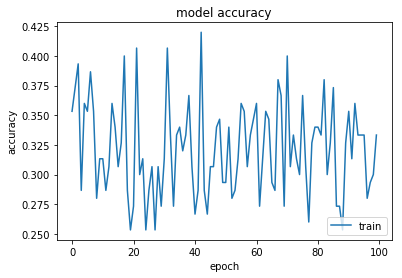

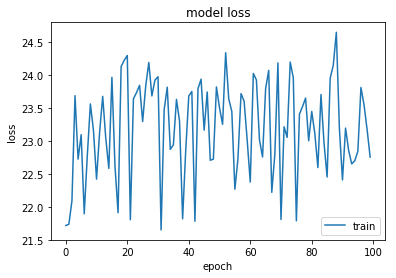

In [137]:
# Grafico para el accuracy
import matplotlib.pyplot as plt
plt.plot(promacc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

# Grafico para el Loss
plt.plot(promerr)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

<a id="segundo"></a>
### 2. Comparar back-propagation (BP) de Keras

Keras es una de las librerı́as más populares para desarrollar nuevos modelos de redes neuronales o implementar eficientemente modelos conocidos con fines prácticos, puesto que ofrece una interfaz para poder trabajar de una manera mucho mas simple además de permitir también el manejo de configuraciones mas específicas.  
Como actividad pedagógica ahora se les pide comparar el algoritmo implementado por ustedes con el de alto nivel de la librería __[keras](https://keras.io/)__ . Se les pedirá comparar sobre el mismo dataset con la misma arquitectura utilizada anteriormente, es decir, dos capas ocultas (con 32 y 16 neuronas respectivamente), 3 neuronas en la capa de salida con función de activación softmax, optimizador Gradiente Descentente (GD) con tasa de aprendizaje fija.

<img src="https://i.imgur.com/hUjFUDU.png" width="40%" height="40%" />


> a) Defina, a través de la interfaz de keras, la arquitectura de la red, con las funciones de activación para comparar con la sección anterior.
```python
from keras.models import Sequential
from keras.layers.core import Dense
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation="sigmoid or relu"))
model.add(Dense(16, activation="sigmoid or relu"))
model.add(Dense(3, activation="softmax"))
```

> b) Defina, a través de la interfaz de keras, el optimizador de la red, en conjunto con la función de error, para poder comparar con la sección anterior.
```python
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.1),loss="categorical_crossentropy or mse", metrics=["accuracy"])
```

> c) Entrene (ajuste) los pesos de la red definida mediante keras, reportando los mismos gráficos de la sección anterior para poder comparar. Si hay diferencias en la convergencia del algoritmo ¿A qué podría deverse? si hay una gran diferencia en los tiempos de entrenamiento ¿A qué podría deverse?
```python
model.fit(X_train, y_onehot, epochs=100, batch_size=1, verbose=1)
```

Epoch 1/100
150/150 [==============================] - 1s 10ms/step - loss: 1.0457 - acc: 0.4467
Epoch 2/100
150/150 [==============================] - 0s 3ms/step - loss: 0.5515 - acc: 0.7267
Epoch 3/100
150/150 [==============================] - 0s 3ms/step - loss: 0.3869 - acc: 0.8733
Epoch 4/100
150/150 [==============================] - 1s 3ms/step - loss: 0.3212 - acc: 0.8800
Epoch 5/100
150/150 [==============================] - 0s 3ms/step - loss: 0.2335 - acc: 0.9533
Epoch 6/100
150/150 [==============================] - 0s 2ms/step - loss: 0.1809 - acc: 0.9533
Epoch 7/100
150/150 [==============================] - 0s 2ms/step - loss: 0.1503 - acc: 0.9400
Epoch 8/100
150/150 [==============================] - 0s 3ms/step - loss: 0.1283 - acc: 0.9733
Epoch 9/100
150/150 [==============================] - 0s 3ms/step - loss: 0.1177 - acc: 0.9667
Epoch 10/100
150/150 [==============================] - 0s 3ms/step - loss: 0.1103 - acc: 0.9667
Epoch 11/100
150/150 [================

150/150 [==============================] - 0s 3ms/step - loss: 0.0471 - acc: 0.9867
Epoch 70/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0570 - acc: 0.9800
Epoch 71/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0481 - acc: 0.9733
Epoch 72/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0544 - acc: 0.9867
Epoch 73/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0489 - acc: 0.9800
Epoch 74/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0502 - acc: 0.9800
Epoch 75/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0577 - acc: 0.9733
Epoch 76/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0530 - acc: 0.9800
Epoch 77/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0505 - acc: 0.9733
Epoch 78/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0581 - acc: 0.9800
Epoch 79/100
150/150 [=====================

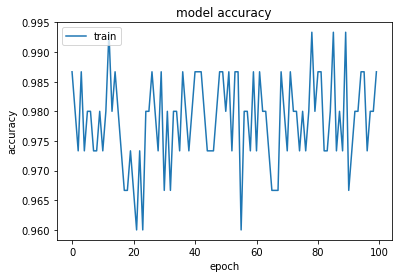

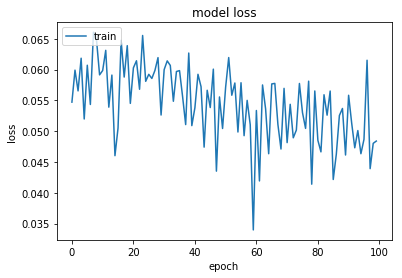

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
#transform target to one hot vector
import keras
y_onehot = keras.utils.to_categorical(y_train)



from keras.models import Sequential
from keras.layers.core import Dense
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation="sigmoid"))
model.add(Dense(16, activation="sigmoid"))
model.add(Dense(3, activation="softmax"))

from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.1),loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_onehot, epochs=100, batch_size=1, verbose=1)

#C
history = model.fit(X_train, y_onehot, epochs=100, batch_size=1, verbose=1)

# Los datos que estan en el history 
print(history.history.keys())

# Grafico para el accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.legend(['train'], loc='upper left')
plt.show()

# Grafico para el Loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.legend(['train'], loc='upper left')
plt.show()


<a id="tercero"></a>
### 3. Verificación numérica del gradiente para una componente

En esta sección deberá verificar numéricamente el gradiente para los parámetros del modelo (que en este caso son los pesos de la red), que hasta ahora a definido de manera analítica en su programa, por ejemplo la derivada de $x^2$ es $2x$. Ahora deberá verificar estos cálculos usando la definición de gradiente.

$$ \nabla_{w} Loss = \lim_{\epsilon \rightarrow 0} \frac{Loss(w+ \epsilon)-Loss(w)}{\epsilon} $$

Debido a que el *forward propagation* es relativamente fácil de implementar, se puede confiar en que se realizó de manera correcta, por lo que el cómputo del error (*loss*) debería ser correcto. Esto significa que podemos verificar el gradiente o la derivada analítica del error $\frac{\partial Loss}{\partial w}$ comprobando que el resultado obtenido es similar (dentro de una tolerancia numérica, por ejemplo $10^6$) al valor que obtenemos aplicando la fórmula anterior. Naturalmente interpretaremos $\lim_{\epsilon \rightarrow 0}$ como un valor "*suficientemente pequeño*" de $\epsilon$.


> a) Para un peso escogido aleatoriamente entre la primera capa de la red (*input*) y la primera capa oculta, calcule el valor del gradiente de la función de error para ambas funciones utilizadas (ayúdese mediante las funciones de *backward pass* implementadas anteriormente), luego compare y verifique con el valor numérico del gradiente mediante el procedimiento explicado anteriormente.

> b) Vuelva a verificar el valor del gradiente para otros dos pesos escodigos aleatoriamente en la primera operación de la red. Compare y concluya.

In [138]:
#Se hace un forward y una backward, se obtiene dE/dw, se hace guarda el L original, sobre los mismos pesos pero con uno alterado
#se tiene que hacer un forward para tener L(w+e) y verificar el limite

m_pesos_originales=[]

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_ejemplo=X_train[0]

#transform target to one hot vector
import keras
y_onehot = keras.utils.to_categorical(y_train)
Y_ejemplo=y_onehot[0]


arquitectura=size_layers(3,4,32,16,3)
dw_v=[]
lim_v=[]
for i in range(100):
    modelo=NN_2ocultas(3, arquitectura)
    m_pesos_originales = modelo.m_pesos.copy()
    error,acc=modelo.training(X_ejemplo,Y_ejemplo,1,"ce", "sigmoid", 0.1,"grad",0, 0.1)
    DE_Dw00 = modelo.e_m_pesos[0][0][0]
    dw_v.append(DE_Dw00)
    
    m_pesos_originales[0][0][0]+=epsilon 
    modelo2=NN_2ocultas(3, arquitectura)
    modelo2.m_pesos= m_pesos_originales.copy()
    error2,acc2=modelo2.training(X_ejemplo,Y_ejemplo,1,"ce", "sigmoid", 0.1,"grad",0, 0.1)
    limite = (error2-error)/epsilon
    lim_v.append(limite)

print("dE/dw_v = ",dw_v)
print("limite = ",lim_v)


ypred [ 0.37033901  0.34829842  0.28136257]
ytrain [ 1.  0.  0.]
ypred [ 0.37033901  0.34829842  0.28136257]
ytrain [ 1.  0.  0.]
ypred [ 0.32813885  0.29514527  0.37671588]
ytrain [ 1.  0.  0.]
ypred [ 0.32813885  0.29514527  0.37671588]
ytrain [ 1.  0.  0.]
ypred [ 0.31993536  0.36022621  0.31983843]
ytrain [ 1.  0.  0.]
ypred [ 0.31993536  0.36022621  0.31983843]
ytrain [ 1.  0.  0.]
ypred [ 0.30505246  0.37386825  0.32107929]
ytrain [ 1.  0.  0.]
ypred [ 0.30505246  0.37386825  0.32107929]
ytrain [ 1.  0.  0.]
ypred [ 0.3679856   0.32303284  0.30898156]
ytrain [ 1.  0.  0.]
ypred [ 0.3679856   0.32303284  0.30898156]
ytrain [ 1.  0.  0.]
ypred [ 0.34411602  0.32287504  0.33300893]
ytrain [ 1.  0.  0.]
ypred [ 0.34411602  0.32287504  0.33300893]
ytrain [ 1.  0.  0.]
ypred [ 0.36421576  0.36137275  0.2744115 ]
ytrain [ 1.  0.  0.]
ypred [ 0.36421576  0.36137275  0.2744115 ]
ytrain [ 1.  0.  0.]
ypred [ 0.35697695  0.37243053  0.27059253]
ytrain [ 1.  0.  0.]
ypred [ 0.35697695  0.372

ypred [ 0.30620444  0.31645173  0.37734383]
ytrain [ 1.  0.  0.]
ypred [ 0.30794279  0.34674941  0.3453078 ]
ytrain [ 1.  0.  0.]
ypred [ 0.30794279  0.34674941  0.3453078 ]
ytrain [ 1.  0.  0.]
ypred [ 0.2765806   0.35437138  0.36904802]
ytrain [ 1.  0.  0.]
ypred [ 0.2765806   0.35437138  0.36904802]
ytrain [ 1.  0.  0.]
ypred [ 0.34264601  0.25626204  0.40109195]
ytrain [ 1.  0.  0.]
ypred [ 0.34264601  0.25626204  0.40109195]
ytrain [ 1.  0.  0.]
ypred [ 0.32720116  0.35560566  0.31719318]
ytrain [ 1.  0.  0.]
ypred [ 0.32720116  0.35560566  0.31719318]
ytrain [ 1.  0.  0.]
ypred [ 0.4150829   0.28642688  0.29849023]
ytrain [ 1.  0.  0.]
ypred [ 0.4150829   0.28642688  0.29849023]
ytrain [ 1.  0.  0.]
ypred [ 0.36568406  0.34562027  0.28869567]
ytrain [ 1.  0.  0.]
ypred [ 0.36568406  0.34562027  0.28869567]
ytrain [ 1.  0.  0.]
ypred [ 0.30588805  0.36859289  0.32551905]
ytrain [ 1.  0.  0.]
ypred [ 0.30588805  0.36859289  0.32551905]
ytrain [ 1.  0.  0.]
ypred [ 0.38816015  0.306

<a id="cuarto"></a>
### 4. Implementar *momentum* como variante

En esta sección deberá construir, sin usar librerı́as, excepto eventualmente *numpy* para implementar operaciones básicas de algebra lineal, una variante del programa definido anteriormente ([sección 1](#primero)) que entrene la red utilizando *momentum* clásico.

$$ v^{(t+1)} \leftarrow \mu v^{(t)} - \eta \nabla_{w^{(t)}} Loss \\
w^{(t+1)} \leftarrow w^{(t)} + v^{(t+1)}
$$

> *Sutskever, I., Martens, J., Dahl, G., & Hinton, G. (2013, February). On the importance of initialization and momentum in deep learning. In International conference on machine learning (pp. 1139-1147).*


Demuestre que su programa funciona en el mismo problema de clasificación presentado anteriormente, para esto, además deberá construir un gráfico de la función de error o pérdida (*loss*) *vs* el número de *epochs* y comentar/analizar la convergencia. ¿Es una mejora significativa? 

In [140]:
def backwarding_momentum(total_capas, vector_x, vector_y, tipo_error ,tasa, salida_l, da_salida_l,e_salida_l,m_pesos, vector_arquit,e_m_pesos, mu, momentums):
    #inicializacion de momentum (vector de largo 16 compuesto por zeros)
    if tipo_error=="mse":
        error_EA=d_error_mse(vector_y,salida_l[-2])
    else:
        error_EA=d_error_CE(vector_y,salida_l[-2])  
    momentum_capa=momentums[total_capas-1].T.copy()    #v_t
    #print ("momentum antes de for", momentum_capa)
    for neurona_final in range(vector_arquit[-1]):
        error_EW_n=error_EA[neurona_final]*da_salida_l[-2][neurona_final]*np.array(salida_l[-3])
        e_m_pesos_T=e_m_pesos[total_capas-1].T.copy()
        e_m_pesos_T[neurona_final]=error_EW_n.copy()
        e_m_pesos[total_capas-1] = e_m_pesos_T.T.copy()    
        #print ("mu*momentum[neurona_final]", mu*momentum_capa[neurona_final] )
        #print ("- tasa*gradiente", -(tasa*error_EW_n))
        momentum= mu*momentum_capa[neurona_final]-(tasa*error_EW_n)    #v_t+1=mu*v_t - n*Grad 
        #print ("momentums[total_capas-1].T", momentums[total_capas-1].T)
        momentums[total_capas-1].T[neurona_final]=momentum.copy() #v_t+1=mu*v_t - n*Grad in place
        #correccion vector de pesos-matriz final correspondiente a la neurona
        pesos_auxiliar=m_pesos[total_capas-1].T.copy()
        pesos_auxiliar[neurona_final]= pesos_auxiliar[neurona_final].copy()+momentum.copy() 
        m_pesos[total_capas-1]=pesos_auxiliar.T.copy()            #actualizacion in place
    e_salida_l[total_capas-1]=error_EA.copy()                     #es el triangulo (Delta mayus.)        
    #backwarding de capas ocultas y capa input
    #corrección de pesos que debiese ser por batch         
    for capa in np.arange(total_capas-2,-1,-1):                   #se mueve en capa 1 y 0
        error_EA_s=np.sum(e_salida_l[capa+1])                     #suma el vector EA calculado en la capa 2 (igual para todos)
        error_aux=[]
        pesos_auxiliar2=m_pesos[capa].T.copy() #se hace (16x32 la matriz)
        momentum_capa=momentums[capa].T.copy()    #v_t
        for neurona in range(vector_arquit[capa+1]):
            error_EW_s=error_EA_s*da_salida_l[capa][neurona]*np.array(salida_l[capa-1])
            e_m_pesos[capa].T[neurona]=error_EW_s.copy()
            #corregir pesos           
            momentum= mu*momentum_capa[neurona]-(tasa*error_EW_s) 
            momentums[capa].T[neurona]=momentum.copy()            
            arreglo=(pesos_auxiliar2[neurona].copy()+momentum.copy()).copy() #(vector de 32)
            pesos_auxiliar2[neurona]=arreglo.copy()  #se hace
            m_pesos[capa]=pesos_auxiliar2.T.copy()  
            error_aux.append(error_EA_s.copy())
        e_salida_l[capa]=error_aux.copy()

    return m_pesos,e_m_pesos

### Con reinicio de momentum por epoch

In [141]:
arquitectura=size_layers(3,4,32,16,3) #(3,4,32,16,3)
modelo2=NN_2ocultas(3, arquitectura)
#print ("MPESOS ORIGINAL",modelo2.m_pesos)
print (X_train.shape[0])
errores,accs = modelo2.entrenamiento(arquitectura,X_train,y_onehot, "sigmoid", 0.1, "momentum",1, 0.1) 
#modelo.entrenamiento(x,y,f_activ,tasa_aprend,tipo_backprop,bool_reinicio,tasa_momentum) 

promerr=[]
promacc=[]
#calculo de los promedios por epoch
for i in range(len(errores)):
    prome=np.mean(errores[i])
    proma=np.mean(accs[i])
    promerr.append(prome)
    promacc.append(proma)

print ("MPESOS FINAL",modelo.m_pesos)

150
Epoch:  0
EJEMPLO :  [ 2.24968346 -1.05056946  1.78634131  1.44795564] [ 0.  0.  1.]
ypred [ 0.34018274  0.30121922  0.35859804]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.72626612 -1.2844067  -1.18150376] [ 1.  0.  0.]
ypred [ 0.30657074  0.27141448  0.42201478]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.36476568  0.24469647  0.39053784]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.74477836  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.47755027  0.17418163  0.3482681 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -0.8191665   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.43936477  0.28606762  0.27456761]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.30932059  0.26053764  0.43014177]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.37593851  0.15619298  0.46786851]
ytrain [ 0.  0.  1.]
EJEMPL

EJEMPLO :  [ 2.24968346  1.72626612  1.67260991  1.31648267] [ 0.  0.  1.]
ypred [ 0.41246206  0.27020456  0.31733338]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.10644536  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.37222229  0.24240597  0.38537174]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.33924036  0.29895047  0.36180917]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  0.80065426 -1.17067529 -1.31297673] [ 1.  0.  0.]
ypred [ 0.26798362  0.22108631  0.51093007]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.15917263 -0.1249576   0.99022146  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.4355168   0.22091066  0.34357253]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.10644536  0.93335575  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.40842167  0.19544251  0.39613582]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -1.28197243  0.70589294  1.05353673] [ 0.  0.  1.]
ypred [ 0.36543766  0.17385749  0.46070485]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800

ypred [ 0.56646919  0.27138422  0.16214658]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608  2.18907205 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.72954826  0.15973041  0.11072133]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117 -1.28197243 -0.43142114 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.80251205  0.11345084  0.08403711]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904 -0.1249576  -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.60245231  0.33675849  0.0607892 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.55146122  0.32132363  0.12721515]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.05694388 -1.05003079] [ 1.  0.  0.]
ypred [ 0.62273484  0.34617912  0.03108604]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.33784833  1.10395287  1.44795564] [ 0.  0.  1.]
ypred [ 0.57810264  0.3266898   0.09520756]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115 -0.8191665   0.87649005  0.92206376] [ 0.  0.  1.]
ypred [ 0.56209386  

ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328  0.56925129  0.53529583  0.52764485] [ 0.  1.  0.]
ypred [ 0.53202149  0.08587608  0.38210244]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -0.35636057  0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.50819302  0.11788187  0.3739251 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.51337539 -0.03336121 -0.26119297] [ 0.  1.  0.]
ypred [ 0.48079841  0.16457659  0.354625  ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.55823007  0.13793602  0.30383391]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.58776353  0.76275864  1.57942861] [ 0.  0.  1.]
ypred [ 0.53177551  0.19269775  0.27552674]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.81962435  1.05353673] [ 0.  0.  1.]
ypred [ 0.49520998  0.17386386  0.33092616]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.71090158] [ 0.  0.  1.]
ypred [ 0.44527435  0.1558385   0.39888715]
ytrain [ 0.  0.  1.]

EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.70182706  0.11647953  0.18169341]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.80290638  0.07727186  0.11982177]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -0.58776353  1.67260991  1.05353673] [ 0.  0.  1.]
ypred [ 0.63337488  0.16331594  0.20330918]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608  2.18907205 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.79880113  0.05118139  0.15001748]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  0.80065426 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.83977245  0.03885273  0.12137482]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654  -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.65952254  0.12277789  0.21769957]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.51337539  0.02350449 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.85158984  0.05800051  0.09040965]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982

EJEMPLO :  [-1.62768839 -1.74477836 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.59084017  0.05263639  0.35652344]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.55941272  0.11987924  0.32070803]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.6346988   0.02727795  0.33802325]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.74887837  0.01782133  0.2333003 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.63816208  0.07818277  0.28365515]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.74120009  0.01062377  0.24817614]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.63286635  0.06145631  0.30567734]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.77951

ypred [  5.06835438e-01   4.92723022e-01   4.41540034e-04]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.28197243  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [  6.95475375e-01   3.04223678e-01   3.00946947e-04]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.15917263 -0.58776353  0.59216153  0.26469891] [ 0.  1.  0.]
ypred [ 0.47050903  0.52015713  0.00933384]
ytrain [ 0.  1.  0.]
Epoch:  4
EJEMPLO :  [ 0.55333328  0.80065426  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.4115245   0.58034122  0.00813428]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.10644536  0.93335575  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.40990079  0.57805143  0.01204778]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.70589294  0.92206376] [ 0.  0.  1.]
ypred [ 0.40722819  0.57428247  0.01848935]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115 -0.8191665   0.87649005  0.92206376] [ 0.  0.  1.]
ypred [ 0.40315345  0.56853618  0.02831037]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.58776353  0.64902723  1.0535

ypred [ 0.24217115  0.70848792  0.04934093]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.33784833  1.10395287  1.44795564] [ 0.  0.  1.]
ypred [ 0.23499394  0.69467395  0.07033211]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.4321654  -0.58776353  0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.22674008  0.67097153  0.10228839]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.21586162  0.63884626  0.14529212]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  0.80065426 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.09318516  0.81620201  0.09061283]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.05694388 -1.05003079] [ 1.  0.  0.]
ypred [ 0.30314888  0.62228349  0.07456763]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [ 0.60512935  0.35232783  0.04254281]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.88617985 -0.58776353  1.33141568  0.92206376] [ 0.  0.  1.]
ypred [ 0.40784611  

EJEMPLO :  [-1.38535265  0.33784833 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.67078579  0.32222015  0.00699406]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  1.27454998  1.71090158] [ 0.  0.  1.]
ypred [ 0.62036001  0.3292613   0.0503787 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.35636057  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.61243483  0.31649585  0.07106932]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.67869316  0.31149112  0.00981571]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654  -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.61288894  0.32990755  0.05720352]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.67509219  0.3193176   0.00559021]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [ 0.76906838  0.22716406  0.00376756]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566

EJEMPLO :  [-1.26418478  0.10644536 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.35584447  0.61272025  0.03143527]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.71090158] [ 0.  0.  1.]
ypred [ 0.50537442  0.40463827  0.08998731]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.58776353  0.47843012  0.39617188] [ 0.  1.  0.]
ypred [ 0.49862304  0.37998926  0.1213877 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.76275864  1.44795564] [ 0.  0.  1.]
ypred [ 0.44985399  0.4371515   0.11299451]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.40150837  0.33784833  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.42463704  0.42279946  0.1525635 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.53529583  0.00175297] [ 0.  1.  0.]
ypred [ 0.38027415  0.47812226  0.14160359]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.1941016  -0.26119297] [ 0.  1.  0.]
ypred [ 0.27365369  0.68812854  0.03821777]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250

EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.31752565  0.67211752  0.01035683]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.74885626 -0.1249576  -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [  1.81835835e-01   8.17663115e-01   5.01050008e-04]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -1.05056946  1.78634131  1.44795564] [ 0.  0.  1.]
ypred [ 0.46930201  0.51727161  0.01342639]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.35636057 -0.09022692  0.13322594] [ 0.  1.  0.]
ypred [ 0.48368848  0.5155395   0.00077202]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  0.56925129 -1.17067529 -0.91855782] [ 1.  0.  0.]
ypred [  3.04370913e-01   6.95109721e-01   5.19366290e-04]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  0.80065426 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [  5.52377681e-01   4.47310549e-01   3.11770238e-04]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.35636057  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.61997888  0.37027946  0.009741

ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133   2.42047502 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.73177935  0.25797488  0.01024577]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691 -1.28197243  0.42156442  0.65911782] [ 0.  0.  1.]
ypred [ 0.81646876  0.17655448  0.00697677]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.35636057 -0.09022692  0.13322594] [ 0.  1.  0.]
ypred [ 0.80272579  0.1652988   0.03197542]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.31648267] [ 0.  0.  1.]
ypred [ 0.47659556  0.42067315  0.10273129]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.4321654  -0.58776353  0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.44357893  0.41846589  0.13795518]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.47408361  0.42757483  0.09834156]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.70589294  0.39617188] [ 0.  0.  1.]
ypred [ 0.67300389  0.26202924  0.06496687]
ytrain [ 0.  0.  1.]

ypred [ 0.5924887   0.36062617  0.04688513]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.64384411 -0.1249576   1.16081857  0.52764485] [ 0.  0.  1.]
ypred [ 0.57344899  0.36011994  0.06643107]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [ 0.70057046  0.27801719  0.02141235]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.43596097  0.54957112  0.01446791]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.25096731  0.39617188] [ 0.  1.  0.]
ypred [ 0.53360204  0.40423715  0.06216081]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133   0.80065426 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.53567799  0.45767439  0.00664762]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.69988686  0.29601806  0.00409508]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.76501198 -0.35636057  1.44514709  0.79059079] [ 0.  0.  1.]
ypred [ 0.64440906  

ypred [ 0.28806116  0.57118611  0.14075272]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.74885626 -0.35636057 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.17640292  0.73971574  0.08388135]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654  -0.58776353  0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.41113226  0.43703159  0.15183616]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.40279822  0.40099965  0.19620214]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.81962435  1.05353673] [ 0.  0.  1.]
ypred [ 0.37317585  0.36908169  0.25774246]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.12851559 -0.1249576   1.6157442   1.1850097 ] [ 0.  0.  1.]
ypred [ 0.33888681  0.33494915  0.32616403]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346 -0.58776353  1.67260991  1.05353673] [ 0.  0.  1.]
ypred [ 0.30385612  0.3003058   0.39583808]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.64384411  0.33784833  1.27454998  0.79059079] [ 0.  0.  1.]
ypred [ 0.27040707  

ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.33784833 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [  7.01374695e-01   2.98076676e-01   5.48629902e-04]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [  8.02461999e-01   1.97176795e-01   3.61205777e-04]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [  8.54780865e-01   1.44953719e-01   2.65416450e-04]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654   0.80065426  0.93335575  1.44795564] [ 0.  0.  1.]
ypred [ 0.54992379  0.44056419  0.00951202]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [  5.76751238e-01   4.22869056e-01   3.79705745e-04]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.53529583  0.39617188] [ 0.  1.  0.]
ypred [ 0.61221301  0.37614021  0.01164679]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypre

ypred [ 0.21628369  0.33808128  0.44563503]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328  0.56925129  0.53529583  0.52764485] [ 0.  1.  0.]
ypred [ 0.18883853  0.2949325   0.51622896]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.16999233  0.35197157  0.4780361 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.06035022  0.45969812  0.47995166]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.1372359  -0.26119297] [ 0.  1.  0.]
ypred [ 0.03557652  0.68133242  0.28309106]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133   2.42047502 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.02276571  0.79607112  0.18116318]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.33784833  1.10395287  1.44795564] [ 0.  0.  1.]
ypred [ 0.1968732  0.5489966  0.2541302]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [ 0.09728732  0.6

EJEMPLO :  [-0.05250608  2.18907205 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.32698648  0.61886692  0.0541466 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133   1.03205722 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.56973711  0.39849797  0.03176491]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.58055734  0.32742851  0.09201416]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.64384411  1.26346019  1.33141568  1.71090158] [ 0.  0.  1.]
ypred [ 0.56779639  0.30786021  0.1243434 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.53730738  0.29018348  0.17250914]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395  1.72626612 -1.17067529 -1.18150376] [ 1.  0.  0.]
ypred [ 0.61518516  0.31635808  0.06845676]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -1.28197243  0.08037019 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.73821481  0.21706334  0.04472185]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.43216

ypred [ 0.33614814  0.59130347  0.07254838]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.93335575  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.30264278  0.62951839  0.06783884]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691 -1.51337539 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.17918171  0.80169573  0.01912256]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.17067529 -1.31297673] [ 1.  0.  0.]
ypred [ 0.137352    0.8468427   0.01580531]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.41047883  0.51942474  0.07009643]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.64384411 -0.1249576   1.16081857  0.52764485] [ 0.  0.  1.]
ypred [ 0.38564128  0.55287208  0.06148664]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.3728018   0.54142519  0.08577302]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.33493811  

ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.28197243  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.27651337  0.42651428  0.29697235]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.18984544  0.63297732  0.17717724]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.74477836  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.4470444   0.44041553  0.11254008]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.2803405   0.33784833  1.10395287  1.44795564] [ 0.  0.  1.]
ypred [ 0.3411696   0.49850753  0.16032286]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.10644536  0.93335575  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.31526005  0.47881183  0.20592812]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478  0.80065426 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.23896072  0.55549134  0.20554794]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133   2.42047502 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.50982302  0.35097958  0.13919739]
ytrain [ 1.  0.  0.]

ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.74885626  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.80335297  0.18894238  0.00770466]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.85519938  0.13913031  0.0056703 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.49486315 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.88539244  0.11011984  0.00448772]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969  1.03205722 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.9050589   0.09122348  0.00371762]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -0.58776353  0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.91890896  0.07791554  0.0031755 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654  -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.60172086  0.36321341  0.03506573]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133   1.03205722 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.58650979  0.41150183  0.00198838]
ytrain [ 1.  0.  0.]

EJEMPLO :  [-0.17367395  1.72626612 -1.17067529 -1.18150376] [ 1.  0.  0.]
ypred [ 0.53253787  0.46667817  0.00078396]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  0.53529583  0.52764485] [ 0.  1.  0.]
ypred [ 0.58369645  0.40083772  0.01546583]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.51337539  0.02350449 -0.12972   ] [ 0.  1.  0.]
ypred [  5.82579635e-01   4.17040551e-01   3.79813693e-04]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.41610674  0.57336717  0.01052609]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -0.8191665   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.36483342  0.62588902  0.00927755]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.4321654  -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.35823822  0.62822234  0.01353944]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [  1.93788532e-01   8.05911825e-01   2.99642870e-04]
ytrain [ 1.

EJEMPLO :  [ 0.55333328 -1.74477836  0.36469871  0.13322594] [ 0.  1.  0.]
ypred [ 0.47731937  0.5111018   0.01157883]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.27410788  0.71928646  0.00660566]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.76501198 -0.35636057  1.44514709  0.79059079] [ 0.  0.  1.]
ypred [ 0.49147097  0.46585556  0.04267347]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.33784833 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.54896908  0.44310573  0.00792519]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.74885626  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.71656641  0.27806915  0.00536444]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.64740255  0.30956719  0.04303025]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.91683689 -0.1249576   0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.59528638  0.36600107  0.03871255]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885

ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [ 0.48183245  0.22504201  0.29312554]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [ 0.52530052  0.11367049  0.36102899]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.35714491  0.33746678  0.3053883 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.70589294  0.92206376] [ 0.  0.  1.]
ypred [ 0.31448412  0.41577254  0.26974335]
ytrain [ 0.  0.  1.]
Epoch:  15
EJEMPLO :  [-0.90068117  1.72626612 -1.05694388 -1.05003079] [ 1.  0.  0.]
ypred [ 0.23868099  0.44617588  0.31514313]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -0.58776353  0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.51454064  0.2845062   0.20095316]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.51337539 -0.03336121 -0.26119297] [ 0.  1.  0.]
ypred [ 0.34677732  0.5333224   0.11990028]
ytrain [ 

ypred [ 0.28545593  0.6660333   0.04851077]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.21733238  0.75074889  0.03191873]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117 -1.28197243 -0.43142114 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.15389627  0.82382905  0.02227468]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.70589294  0.92206376] [ 0.  0.  1.]
ypred [ 0.24372278  0.66362178  0.09265544]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.1249576   0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.11164689  0.8550091   0.033344  ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.05056946  0.36469871  0.00175297] [ 0.  1.  0.]
ypred [ 0.09081294  0.88002645  0.0291606 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.07493901  0.90082237  0.02423861]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [ 0.33973552  

EJEMPLO :  [-1.14301691 -1.28197243  0.42156442  0.65911782] [ 0.  0.  1.]
ypred [ 0.85158261  0.11661111  0.03180627]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904 -1.74477836 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.75455189  0.10304009  0.14240802]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.55699823  0.31939129  0.12361048]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.71090158] [ 0.  0.  1.]
ypred [ 0.52521259  0.29978699  0.17500042]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.1941016  -0.26119297] [ 0.  1.  0.]
ypred [ 0.66298666  0.20413089  0.13288245]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.43355341  0.47426146  0.09218513]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.49943758  0.35374776  0.14681466]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484

ypred [ 0.79118125  0.20716782  0.00165093]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.70589294  0.39617188] [ 0.  0.  1.]
ypred [ 0.84152859  0.15711748  0.00135392]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -1.28197243  0.70589294  1.05353673] [ 0.  0.  1.]
ypred [ 0.66102281  0.28081368  0.05816351]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [ 0.63986461  0.27136583  0.08876956]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.53529583  0.00175297] [ 0.  1.  0.]
ypred [ 0.61234152  0.25964939  0.1280091 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -0.58776353  0.42156442  0.13322594] [ 0.  1.  0.]
ypred [ 0.72856526  0.23686628  0.03456845]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.91683689 -0.1249576   0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.43476896  0.47015009  0.09508094]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.3248291   

EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.18273204  0.79694577  0.0203222 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  1.26346019 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.45201583  0.53319734  0.01478683]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.53529583  0.39617188] [ 0.  1.  0.]
ypred [ 0.5662447   0.37161063  0.06214467]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.60434736  0.38906555  0.0065871 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.59800527  0.3567284   0.04526633]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133   2.42047502 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.63839078  0.35817917  0.00343005]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -1.74477836 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.75061752  0.24713567  0.00224682]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367

EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.48280712  0.51589786  0.00129502]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.4920192   1.72626612  1.50201279  1.05353673] [ 0.  0.  1.]
ypred [ 0.56797626  0.41249153  0.01953221]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.66940254  0.32899933  0.00159813]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.63488553  0.34045117  0.0246633 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.28197243  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.68334611  0.31566889  0.000985  ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133   0.80065426 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [  4.08295972e-01   5.91118196e-01   5.85831814e-04]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.91683689 -0.35636057  0.47843012  0.13322594] [ 0.  1.  0.]
ypred [ 0.55031451  0.4367038   0.01298169]
ytrain [ 0.  1.  0.]
EJEMP

EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.40583684  0.16464469  0.42951847]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [ 0.40307085  0.12787427  0.46905487]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.28283547  0.3867689   0.33039563]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.51337539 -0.03336121 -0.26119297] [ 0.  1.  0.]
ypred [ 0.53380541  0.26817314  0.19802145]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.56925129 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.35758465  0.52414087  0.11827448]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133   0.80065426 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.58800389  0.34320779  0.06878833]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.58776353  0.47843012  0.39617188] [ 0.  1.  0.]
ypred [ 0.56873554  0.29844349  0.13282097]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652

ypred [ 0.87268954  0.12345985  0.0038506 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.55169264  0.41218943  0.03611794]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.47843012  0.26469891] [ 0.  1.  0.]
ypred [ 0.52733166  0.42197835  0.05068999]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133   2.42047502 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.48999505  0.50511582  0.00488912]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.17067529 -1.31297673] [ 1.  0.  0.]
ypred [ 0.67452953  0.32247138  0.00299908]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.87002413 -0.1249576  -1.51186952 -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.79023998  0.20783479  0.00192523]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654  -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.68430136  0.28798667  0.02771196]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.76775371  

ypred [ 0.65832737  0.33356383  0.0081088 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969 -1.74477836  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [  7.95483603e-01   2.04222513e-01   2.93884372e-04]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.40150837  0.33784833  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.50562025  0.48421907  0.01016068]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.52267624 -0.1249576   1.21768427  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.43962397  0.55150219  0.00887385]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.43115104  0.55601527  0.01283369]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [  2.95399669e-01   7.04312138e-01   2.88193599e-04]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.64384411 -0.1249576   1.16081857  0.52764485] [ 0.  0.  1.]
ypred [ 0.52283737  0.46783172  0.00933092]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.10644536  0.64902723  0.39617188] [ 0.

ypred [ 0.51749202  0.45513695  0.02737103]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969 -1.28197243  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.58732316  0.40947569  0.00320116]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -1.74477836  0.36469871  0.13322594] [ 0.  1.  0.]
ypred [ 0.35962573  0.63827821  0.00209606]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966  0.80065426  0.42156442  0.52764485] [ 0.  1.  0.]
ypred [ 0.34001879  0.63394076  0.02604046]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.16728114  0.83173028  0.00098858]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.272006    0.70715469  0.02083932]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608  2.18907205 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.12529886  0.8730914   0.00160974]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.36659523  

EJEMPLO :  [ 2.24968346 -1.05056946  1.78634131  1.44795564] [ 0.  0.  1.]
ypred [ 0.37827969  0.55106816  0.07065215]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.91683689 -0.35636057  0.47843012  0.13322594] [ 0.  1.  0.]
ypred [ 0.35737149  0.54583202  0.09679649]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346  1.72626612  1.67260991  1.31648267] [ 0.  0.  1.]
ypred [ 0.32036666  0.58957379  0.09005955]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.15917263 -0.58776353  0.59216153  0.26469891] [ 0.  1.  0.]
ypred [ 0.30478746  0.57145643  0.12375611]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.87002413 -0.1249576  -1.51186952 -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.16263092  0.80851019  0.02885889]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -0.1249576  -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.41757927  0.56287078  0.01954995]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.67475248  0.3143588   0.01088872]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.74885

EJEMPLO :  [ 0.55333328 -1.28197243  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.37080217  0.6137734   0.01542442]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.05056946  0.36469871  0.00175297] [ 0.  1.  0.]
ypred [  1.97325625e-01   8.02332687e-01   3.41688252e-04]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [ 0.28980469  0.69813541  0.0120599 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.2844067  -1.18150376] [ 1.  0.  0.]
ypred [  1.15504916e-01   8.84295061e-01   2.00023069e-04]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654   0.80065426  0.93335575  1.44795564] [ 0.  0.  1.]
ypred [ 0.41612043  0.57534554  0.00853403]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [  3.75257183e-01   6.24439980e-01   3.02836619e-04]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654  -0.58776353  0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.55711426  0.43296655  0.009919

EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [ 0.83148914  0.16553928  0.00297158]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.51815899  0.44970933  0.03213167]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  0.33784833 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.53508697  0.46041711  0.00449591]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.5853714   0.37642456  0.03820404]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654   0.80065426  0.93335575  1.44795564] [ 0.  0.  1.]
ypred [ 0.53747177  0.42836631  0.03416192]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.10644536  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.52426648  0.42685968  0.04887384]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.40150837  0.33784833  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.47102122  0.48335423  0.04562455]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333

EJEMPLO :  [ 1.64384411  0.33784833  1.27454998  0.79059079] [ 0.  0.  1.]
ypred [ 0.65758739  0.2279504   0.11446222]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.84930942  0.09941356  0.05127703]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -1.28197243  0.70589294  1.05353673] [ 0.  0.  1.]
ypred [ 0.65431219  0.19817514  0.14751267]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.74885626 -0.35636057 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.84151388  0.0753366   0.08314952]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.15917263  0.33784833  1.21768427  1.44795564] [ 0.  0.  1.]
ypred [ 0.64535971  0.16989525  0.18474504]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115  0.33784833  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.60501417  0.15724819  0.23773764]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [ 0.77116789  0.10197166  0.12686045]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.15917

EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.29615979  0.07371541  0.63012481]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.54083684  0.04365361  0.41550955]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608  2.18907205 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.73130493  0.02529795  0.24339712]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.81978907  0.01695055  0.16326038]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.26418478  0.80065426 -1.05694388 -1.31297673] [ 1.  0.  0.]
ypred [ 0.864669    0.01272793  0.12260308]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.05056946  0.36469871  0.00175297] [ 0.  1.  0.]
ypred [ 0.89140008  0.01021376  0.09838615]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.64043601  0.14944427  0.21011971]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301

EJEMPLO :  [-0.29484182 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.60921736  0.28485313  0.10592951]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.71776501  0.26180208  0.02043291]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.53529583  0.39617188] [ 0.  1.  0.]
ypred [ 0.61402933  0.30355732  0.08241335]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.65834543  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.70071502  0.2872267   0.01205828]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  0.33784833 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.7824595   0.20923714  0.00830336]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  1.26346019 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.84171585  0.15227519  0.00600896]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.69421402  0.25512087  0.05066511]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600

EJEMPLO :  [-1.02184904  0.33784833 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.52753694  0.46631897  0.0061441 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654   0.80065426  0.93335575  1.44795564] [ 0.  0.  1.]
ypred [ 0.57962153  0.37584019  0.04453828]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969 -1.51337539  0.02350449 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.71316983  0.2783807   0.00844947]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346  1.72626612  1.67260991  1.31648267] [ 0.  0.  1.]
ypred [ 0.45015962  0.49910537  0.05073501]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.10644536  0.53529583  0.39617188] [ 0.  1.  0.]
ypred [ 0.42743887  0.50189167  0.07066946]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  0.53529583  0.52764485] [ 0.  1.  0.]
ypred [ 0.3826872   0.55157074  0.06574206]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885626 -0.1249576  -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.24224759  0.75054819  0.00720421]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.91683

ypred [ 0.51823524  0.27879858  0.20296618]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.10644536  0.53529583  0.39617188] [ 0.  1.  0.]
ypred [ 0.47726639  0.2648109   0.25792271]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [ 0.4338495   0.32401915  0.24213135]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.42916674  0.43627437  0.13455889]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.70589294  0.65911782] [ 0.  1.  0.]
ypred [ 0.31338108  0.51110044  0.17551848]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.1941016  -0.26119297] [ 0.  1.  0.]
ypred [ 0.17718422  0.76723135  0.05558443]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.35636057 -0.09022692  0.13322594] [ 0.  1.  0.]
ypred [ 0.1263957   0.83395247  0.03965183]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -0.58776353  0.76275864  0.39617188] [ 0.  0.  1.]
ypred [ 0.21948633  

EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.31648267] [ 0.  0.  1.]
ypred [ 0.66486153  0.18924351  0.14589496]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.85345086  0.06731599  0.07923314]
ytrain [ 1.  0.  0.]
Epoch:  28
EJEMPLO :  [ 1.64384411 -0.1249576   1.16081857  0.52764485] [ 0.  0.  1.]
ypred [ 0.65382028  0.16309095  0.18308877]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.56925129 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.82442773  0.05129743  0.12427485]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.65834543  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.8558028   0.04020838  0.10398882]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.28197243  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.88441782  0.03207761  0.08350457]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691 -0.1249576  -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.79468325  0.13215388  0.07316287]
ytrain [ 1.  0.  0.]
EJEMPLO :

ypred [ 0.29414517  0.65678215  0.04907268]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885626  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.13116794  0.86488809  0.00394397]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.49486315 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.37088886  0.6263123   0.00279884]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.64894358  0.34949776  0.00155867]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.35636057 -0.09022692  0.13322594] [ 0.  1.  0.]
ypred [ 0.78420973  0.21483237  0.0009579 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346 -0.58776353  1.67260991  1.05353673] [ 0.  0.  1.]
ypred [ 0.50451589  0.47843757  0.01704654]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.74885626 -0.35636057 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.49620636  0.50255837  0.00123527]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969  1.03205722 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.68543022  

ypred [ 0.81271864  0.0697359   0.11754546]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328  0.80065426  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.63748727  0.15803249  0.20448024]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904 -0.1249576  -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.80169879  0.04765015  0.15065105]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.76275864  0.79059079] [ 0.  0.  1.]
ypred [ 0.62936849  0.1307103   0.23992121]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.5832802   0.11921197  0.29750783]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  0.80065426 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.65557862  0.02729717  0.31712421]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.15917263 -0.1249576   0.99022146  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.58840076  0.09113512  0.32046412]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.66260876  

ypred [ 0.58360364  0.32307878  0.09331758]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.72647148  0.23527018  0.03825834]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.53529583  0.39617188] [ 0.  1.  0.]
ypred [ 0.60618338  0.27793485  0.11588177]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.64384411 -0.1249576   1.16081857  0.52764485] [ 0.  0.  1.]
ypred [ 0.55970482  0.33523556  0.10505963]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.35636057  0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.68951117  0.26095303  0.0495358 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.43135539  0.53537322  0.03327138]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.62736624  0.35301301  0.01962075]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  1.26346019 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.76796198  

EJEMPLO :  [ 1.2803405   0.10644536  0.76275864  1.44795564] [ 0.  0.  1.]
ypred [ 0.60660307  0.32694647  0.06645046]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.56925129 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.77219449  0.20955754  0.01824797]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.35636057  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.63889415  0.27643377  0.08467208]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.08037019  0.00175297] [ 0.  1.  0.]
ypred [ 0.74690701  0.24035788  0.01273511]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.46244083  0.5296977   0.00786147]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.54746497  0.4061104   0.04642463]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.54675241  0.44964007  0.00360752]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.40150

ypred [ 0.673148    0.31960631  0.00724569]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.1249576   0.25096731  0.00175297] [ 0.  1.  0.]
ypred [  8.23708623e-01   1.76091043e-01   2.00334149e-04]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.88617985 -0.58776353  1.33141568  0.92206376] [ 0.  0.  1.]
ypred [ 0.52424325  0.46727493  0.00848181]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.74885626  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [  5.24517343e-01   4.75176899e-01   3.05758366e-04]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.74885626 -0.1249576  -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [  6.99674293e-01   3.00119223e-01   2.06483754e-04]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.26418478  0.80065426 -1.05694388 -1.31297673] [ 1.  0.  0.]
ypred [  8.02347006e-01   1.97516190e-01   1.36804908e-04]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.35636057 -0.09022692  0.13322594] [ 0.  1.  0.]
ypred [  8.54805673e-01   1.45093764e-01   1.00563046e-04]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.64384

ypred [ 0.44110766  0.45163721  0.10725513]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.31648267] [ 0.  0.  1.]
ypred [ 0.41131163  0.49473315  0.09395522]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.40150837  0.33784833  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.39238583  0.47963274  0.12798143]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.17067529 -1.31297673] [ 1.  0.  0.]
ypred [ 0.29523288  0.67104081  0.03372631]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -0.8191665   0.76275864  0.52764485] [ 0.  1.  0.]
ypred [ 0.48330493  0.42341069  0.09328438]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.88617985 -0.58776353  1.33141568  0.92206376] [ 0.  0.  1.]
ypred [ 0.44892805  0.46914383  0.08192812]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.45455738  0.51423895  0.03120368]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117 -1.28197243 -0.43142114 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.66437262  

EJEMPLO :  [ 1.2803405   0.33784833  1.10395287  1.44795564] [ 0.  0.  1.]
ypred [ 0.47871584  0.50986858  0.01141557]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -1.28197243  0.08037019 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.47139258  0.52797582  0.0006316 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.25096731  0.39617188] [ 0.  1.  0.]
ypred [ 0.38743101  0.59776645  0.01480254]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.15917263 -0.1249576   0.99022146  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.34244013  0.64442011  0.01313976]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [  2.13306820e-01   7.86000946e-01   6.92234334e-04]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.48623072  0.49841238  0.0153569 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.70589294  0.39617188] [ 0.  0.  1.]
ypred [ 0.51846101  0.48052813  0.00101085]
ytrain [ 0.  0.  1.]
EJEMP

ypred [ 0.50207245  0.44666947  0.05125808]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.05694388 -1.05003079] [ 1.  0.  0.]
ypred [ 0.68334571  0.28553101  0.03112328]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691 -0.1249576  -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.79444239  0.18544732  0.02011029]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.85056999  0.13481763  0.01461238]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -0.8191665   0.76275864  0.52764485] [ 0.  1.  0.]
ypred [ 0.68466737  0.23723271  0.07809991]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.81459394  0.17509707  0.01030899]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.84836629  0.14367545  0.00795826]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.70589294  0.92206376] [ 0.  0.  1.]
ypred [ 0.69217975  

EJEMPLO :  [ 0.55333328 -0.8191665   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.65158922  0.31207703  0.03633376]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [ 0.64697237  0.30143065  0.05159698]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.47843012  0.26469891] [ 0.  1.  0.]
ypred [ 0.63074922  0.29306218  0.0761886 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.71649819  0.2721428   0.01135901]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -0.1249576   0.25096731  0.00175297] [ 0.  1.  0.]
ypred [ 0.79018583  0.20178633  0.00802784]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478  0.10644536 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.52917413  0.46568551  0.00514036]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -1.28197243  0.08037019 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.67868398  0.31822597  0.00309005]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.43216

ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.56920577  0.33761195  0.09318228]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.70589294  0.65911782] [ 0.  1.  0.]
ypred [ 0.54221438  0.33045721  0.12732841]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -0.58776353  0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.5891554   0.37592437  0.03492023]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.38514239  0.52075286  0.09410475]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  0.80065426 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.31701341  0.64389245  0.03909414]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.25096731  0.39617188] [ 0.  1.  0.]
ypred [ 0.49009183  0.40657177  0.1033364 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  0.53529583  0.52764485] [ 0.  1.  0.]
ypred [ 0.45520805  0.45358421  0.09120774]
ytrain [ 0.  1.  0.]

EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.37213457  0.50366784  0.12419759]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966  0.80065426  0.42156442  0.52764485] [ 0.  1.  0.]
ypred [ 0.47493243  0.35911821  0.16594936]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.93335575  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.44088286  0.41261949  0.14649765]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.41301545  0.3948707   0.19211385]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.4237876   0.38902838  0.18718402]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.4920192   1.72626612  1.50201279  1.05353673] [ 0.  0.  1.]
ypred [ 0.30759675  0.48055637  0.21184688]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.58776353  0.42156442  0.13322594] [ 0.  1.  0.]
ypred [ 0.21792254  0.58650058  0.19557688]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566

ypred [ 0.66492849  0.33341886  0.00165266]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.64227611  0.33423756  0.02348633]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.05694388 -1.05003079] [ 1.  0.  0.]
ypred [ 0.69686944  0.30225474  0.00087582]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.64233922  0.33984797  0.0178128 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.88617985 -0.58776353  1.33141568  0.92206376] [ 0.  0.  1.]
ypred [ 0.64197219  0.33229774  0.02573007]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.35636057  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.63375852  0.3273287   0.03891278]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.4920192   1.72626612  1.50201279  1.05353673] [ 0.  0.  1.]
ypred [ 0.57475271  0.38841965  0.03682764]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.10644536  0.76275864  1.44795564] [ 0.  0.  1.]
ypred [ 0.55902997  

EJEMPLO :  [ 0.31099753 -0.35636057  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.54725865  0.32784507  0.12489629]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.59848164  0.36770675  0.03381161]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  0.53529583  0.52764485] [ 0.  1.  0.]
ypred [ 0.56912919  0.33236051  0.0985103 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -0.1249576   0.25096731  0.00175297] [ 0.  1.  0.]
ypred [ 0.63424849  0.34791301  0.0178385 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.91683689 -0.35636057  0.47843012  0.13322594] [ 0.  1.  0.]
ypred [ 0.40900713  0.52262523  0.06836765]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.27058517  0.72185924  0.00755558]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133   2.42047502 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.53165938  0.46371978  0.00462084]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068

ypred [ 0.25280379  0.62984784  0.11734837]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346  1.72626612  1.67260991  1.31648267] [ 0.  0.  1.]
ypred [ 0.2269826   0.66727254  0.10574486]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.09636624  0.86083127  0.04280249]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.31021675  0.65491731  0.03486594]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.51051917  0.39746036  0.09202047]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966  0.80065426  0.42156442  0.52764485] [ 0.  1.  0.]
ypred [ 0.4761446   0.44319475  0.08066065]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.53529583  0.00175297] [ 0.  1.  0.]
ypred [ 0.42511148  0.50331857  0.07156995]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.8191665   0.87649005  0.92206376] [ 0.  0.  1.]
ypred [ 0.37770036  

EJEMPLO :  [-1.26418478  0.80065426 -1.05694388 -1.31297673] [ 1.  0.  0.]
ypred [  6.33854438e-01   3.66040846e-01   1.04716037e-04]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.62860715  0.36534341  0.00604943]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [  7.57378280e-01   2.42475104e-01   1.46616329e-04]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691 -1.28197243  0.42156442  0.65911782] [ 0.  0.  1.]
ypred [  8.22279272e-01   1.77604498e-01   1.16230073e-04]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.7614057   0.23527191  0.00332239]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.81962435  1.44795564] [ 0.  0.  1.]
ypred [ 0.82656066  0.17127586  0.00216348]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.81872573  0.16927813  0.011996

EJEMPLO :  [ 2.12851559 -0.1249576   1.6157442   1.1850097 ] [ 0.  0.  1.]
ypred [ 0.18382796  0.24995128  0.56622076]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.38535265  0.33784833 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.05970218  0.10865005  0.83164777]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -1.74477836 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.21649335  0.08738033  0.69612632]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.18973352  0.28364723  0.52661925]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.1099407   0.58919935  0.30085994]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -1.05056946  1.78634131  1.44795564] [ 0.  0.  1.]
ypred [ 0.32015665  0.46919397  0.21064938]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.23239103  0.29921382  0.46839515]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.43216

EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.53024739  0.40075731  0.0689953 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.25096731  0.39617188] [ 0.  1.  0.]
ypred [ 0.41949187  0.32132813  0.25918   ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.88617985 -0.58776353  1.33141568  0.92206376] [ 0.  0.  1.]
ypred [ 0.2979402   0.44892391  0.25313589]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -0.8191665   0.76275864  0.52764485] [ 0.  1.  0.]
ypred [ 0.2056665   0.52029272  0.27404078]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.58776353  0.76275864  1.57942861] [ 0.  0.  1.]
ypred [ 0.12622858  0.69494927  0.17882216]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -1.28197243  0.08037019 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.08158973  0.48594601  0.43246426]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.35636057 -0.09022692  0.13322594] [ 0.  1.  0.]
ypred [ 0.04828446  0.65969022  0.29202532]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652

EJEMPLO :  [-0.41600969 -1.28197243  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.47541966  0.52354372  0.00103662]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [  2.75384751e-01   7.24019988e-01   5.95260975e-04]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.4920192   1.72626612  1.50201279  1.05353673] [ 0.  0.  1.]
ypred [ 0.31661195  0.66867433  0.01471372]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.52267624 -0.1249576   1.21768427  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.30888513  0.66982686  0.02128801]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.64384411  1.26346019  1.33141568  1.71090158] [ 0.  0.  1.]
ypred [ 0.30484923  0.66282439  0.03232638]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.64384411 -0.1249576   1.16081857  0.52764485] [ 0.  0.  1.]
ypred [ 0.2995912  0.6515642  0.0488446]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.35636057  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.17273832  0.81653824  0.01072344]
ytrain [ 0.  1.  0.]
EJEMPLO 

EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.31648267] [ 0.  0.  1.]
ypred [ 0.23199599  0.2200969   0.54790712]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.13466753  0.12849162  0.73684085]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.05056946  0.36469871  0.00175297] [ 0.  1.  0.]
ypred [ 0.36637466  0.08759761  0.54602773]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478  0.80065426 -1.05694388 -1.31297673] [ 1.  0.  0.]
ypred [ 0.31201994  0.27967058  0.40830948]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.91683689 -0.35636057  0.47843012  0.13322594] [ 0.  1.  0.]
ypred [ 0.44667278  0.26054805  0.29277917]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691 -1.51337539 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.51483675  0.28728396  0.1978793 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.31114053  0.57059607  0.1182634 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600

ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.36049282  0.24501743  0.39448975]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.46050794  0.22745682  0.31203524]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -0.58776353  0.76275864  0.39617188] [ 0.  0.  1.]
ypred [ 0.5127451   0.1129758   0.37427909]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.4321654   0.80065426  0.93335575  1.44795564] [ 0.  0.  1.]
ypred [ 0.34376453  0.16049045  0.49574502]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.21399509  0.04662242  0.73938249]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.1249576   0.25096731  0.00175297] [ 0.  1.  0.]
ypred [ 0.14846848  0.0323237   0.81920782]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654  -0.58776353  0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.12817148  0.13124586  0.74058266]
ytrain [ 0.  0.  1.]

ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.13979487  0.71817962  0.1420255 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.37722084  0.52535549  0.09742367]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  1.03205722 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.31487749  0.38491442  0.30020808]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  0.53529583  0.52764485] [ 0.  1.  0.]
ypred [ 0.44693155  0.28378026  0.26928819]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.50772288  0.32491912  0.16735801]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.08037019  0.00175297] [ 0.  1.  0.]
ypred [ 0.68804065  0.20977806  0.10218129]
ytrain [ 0.  1.  0.]
Epoch:  43
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.71090158] [ 0.  0.  1.]
ypred [ 0.42167093  0.42218008  0.15614899]
ytrain [ 

EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.17561149  0.78251192  0.04187659]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.31648267] [ 0.  0.  1.]
ypred [ 0.44094924  0.52880752  0.03024324]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -1.74477836  0.36469871  0.13322594] [ 0.  1.  0.]
ypred [ 0.42788497  0.45004822  0.12206682]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.53529583  0.00175297] [ 0.  1.  0.]
ypred [ 0.26103699  0.65304265  0.08592036]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.16427423  0.78090061  0.05482516]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.35636057  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.41344663  0.55023623  0.03631713]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.28717887  0.69074842  0.02207271]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484

EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.15892147  0.48791582  0.35316272]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654   0.80065426  0.93335575  1.44795564] [ 0.  0.  1.]
ypred [ 0.19277996  0.50883584  0.2983842 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.88617985 -0.58776353  1.33141568  0.92206376] [ 0.  0.  1.]
ypred [ 0.17221112  0.47355503  0.35423385]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.49486315 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.06198907  0.47259851  0.46541243]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.22352288  0.38024048  0.39623663]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.74885626 -0.1249576  -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.53599291  0.22656862  0.23743847]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.73594684  0.12889743  0.13515573]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717

EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.66146526  0.33144359  0.00709115]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -0.58776353  1.67260991  1.05353673] [ 0.  0.  1.]
ypred [ 0.61761396  0.33191899  0.05046705]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.60994605  0.31889138  0.07116257]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.64384411  1.26346019  1.33141568  1.71090158] [ 0.  0.  1.]
ypred [ 0.58938596  0.3072945   0.10331955]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.56098015  0.2924037   0.14661615]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.70516314  0.19157393  0.10326294]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.57946863  0.23856972  0.18196165]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450

EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.54160325  0.40106111  0.05733565]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.35324876  0.61343972  0.03331153]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.74885626  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.58650363  0.39407036  0.01942601]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [ 0.75140491  0.2370129   0.01158219]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969 -1.05056946  0.36469871  0.00175297] [ 0.  1.  0.]
ypred [ 0.73441593  0.21469557  0.0508885 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.70589294  0.39617188] [ 0.  0.  1.]
ypred [ 0.47623812  0.48540574  0.03835614]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -1.28197243  0.70589294  1.05353673] [ 0.  0.  1.]
ypred [ 0.39435748  0.455402    0.15024052]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982

EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.19946211  0.14790679  0.6526311 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.71090158] [ 0.  0.  1.]
ypred [ 0.43327297  0.18234442  0.38438261]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.44044322  0.06764152  0.49191526]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.35349096  0.23763421  0.40887483]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.05056946  0.36469871  0.00175297] [ 0.  1.  0.]
ypred [ 0.59187841  0.16393369  0.2441879 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.31648267] [ 0.  0.  1.]
ypred [ 0.42770196  0.4130796   0.15921844]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.30911953  0.32336364  0.36751683]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.88617

ypred [ 0.1189574  0.5159116  0.365131 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.56925129 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.07128674  0.67747444  0.25123881]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -0.58776353  0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.24185762  0.5625717   0.19557068]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969  1.03205722 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.17341378  0.7055559   0.12103032]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.42923733  0.49210451  0.07865816]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.29096484  0.6623896   0.04664557]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.54496505  0.42731178  0.02772316]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.81962435  1.44795564] [ 0.  0.  1.]
ypred [ 0.73401879  0.2

ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -0.1249576   0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.25286877  0.24155226  0.50557896]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.15290852  0.16964841  0.67744307]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.53529583  0.00175297] [ 0.  1.  0.]
ypred [ 0.39565789  0.11494137  0.48940074]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.76501198 -0.35636057  1.44514709  0.79059079] [ 0.  0.  1.]
ypred [ 0.326125    0.33357301  0.34030199]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115  0.33784833  0.87649005  1.44795564] [ 0.  0.  1.]
ypred [ 0.29065881  0.31697207  0.39236911]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.58776353  0.64902723  1.05353673] [ 0.  0.  1.]
ypred [ 0.18785818  0.22628261  0.58585921]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  0.80065426 -1.17067529 -1.31297673] [ 1.  0.  0.]
ypred [ 0.11640286  0.14039816  0.74319898]
ytrain [ 1.  0.  0.]

EJEMPLO :  [ 1.64384411  0.33784833  1.27454998  0.79059079] [ 0.  0.  1.]
ypred [ 0.22792136  0.63212346  0.13995518]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.40150837  0.33784833  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.2133002   0.60208391  0.18461589]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.07815405  0.8591381   0.06270785]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691 -0.1249576  -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.26439949  0.68672984  0.04887067]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.57399745  0.39776729  0.02823526]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.64384411 -0.1249576   1.16081857  0.52764485] [ 0.  0.  1.]
ypred [ 0.58760381  0.32564574  0.08675046]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.75480532  0.21370604  0.03148864]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.62768

EJEMPLO :  [-0.17367395 -1.28197243  0.70589294  1.05353673] [ 0.  0.  1.]
ypred [ 0.30308647  0.69381316  0.00310037]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328  0.56925129  1.27454998  1.71090158] [ 0.  0.  1.]
ypred [ 0.29646913  0.68600803  0.01752284]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [ 0.27356994  0.63370279  0.09272727]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.17964074  0.74786737  0.07249189]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133   2.42047502 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.43505789  0.51686097  0.04808114]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.68317681  0.28996028  0.02686292]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -1.28197243  0.08037019 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.79871659  0.18422335  0.01706006]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484

ypred [ 0.61217212  0.03219357  0.35563431]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.4321654  -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.39669931  0.01899089  0.58430979]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  0.53529583  0.52764485] [ 0.  1.  0.]
ypred [ 0.36382496  0.17356871  0.46260633]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [ 0.3177621  0.1637608  0.5184771]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.76275864  1.44795564] [ 0.  0.  1.]
ypred [ 0.26755148  0.39050901  0.34193952]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.35636057 -0.09022692  0.13322594] [ 0.  1.  0.]
ypred [ 0.16075589  0.39468981  0.4445543 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.1372359  -0.26119297] [ 0.  1.  0.]
ypred [ 0.09547144  0.62623778  0.27829077]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.88617985 -0.58776353  1.33141568  0.92206376] [ 0.  0.  1.]
ypred [ 0.15774113  0.5

ypred [ 0.35580014  0.59265484  0.05154502]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.22957546  0.73442248  0.03600206]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.70589294  0.65911782] [ 0.  1.  0.]
ypred [ 0.26971591  0.49842237  0.23186172]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.1429136   0.73376291  0.12332348]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.38766422  0.52611817  0.08621762]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.25096731  0.39617188] [ 0.  1.  0.]
ypred [ 0.65835412  0.29364342  0.04800246]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.43465569  0.53699972  0.02834459]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.33784833  1.10395287  1.44795564] [ 0.  0.  1.]
ypred [ 0.52476045  

ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969  2.65187798 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.80205658  0.01478515  0.18315827]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.74885626 -0.35636057 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.85513326  0.01082019  0.13404655]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.88542665  0.00855752  0.10601583]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -1.28197243  0.08037019 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.90509065  0.00708881  0.08782055]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.52267624 -0.1249576   1.21768427  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.66576331  0.12902307  0.20521362]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.8176677  0.0359214  0.1464109]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608  2.18907205 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.85045863  0.02834917  0.12119221]
ytrain [ 1.  0.  0.]
EJ

ypred [ 0.34566335  0.50529633  0.14904032]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.47843012  0.26469891] [ 0.  1.  0.]
ypred [ 0.19671968  0.717924    0.08535632]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.65834543  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.12962707  0.81409348  0.05627944]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.81962435  1.05353673] [ 0.  0.  1.]
ypred [ 0.36298134  0.59784309  0.03917557]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.34953034  0.41956704  0.23090262]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.10644536  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.31685925  0.37781287  0.30532787]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.40150837  0.33784833  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.2846746   0.33920985  0.37611555]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.31648267] [ 0.  0.  1.]
ypred [ 0.18982977  

ypred [ 0.13976466  0.21173432  0.64850102]
ytrain [ 0.  1.  0.]
Epoch:  53
EJEMPLO :  [-0.17367395  1.72626612 -1.17067529 -1.18150376] [ 1.  0.  0.]
ypred [ 0.08701368  0.47139224  0.44159408]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969  2.65187798 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.29113511  0.36600046  0.34286443]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.59637517  0.20839919  0.19522564]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.17067529 -1.31297673] [ 1.  0.  0.]
ypred [ 0.42033691  0.45859945  0.12106365]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.6265341   0.30299502  0.07047088]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.76828143  0.18844129  0.04327729]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654  -1.97618132  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0

EJEMPLO :  [-1.02184904  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.26403008  0.28211021  0.45385971]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -0.8191665   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.53035581  0.18844901  0.28119518]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.35624733  0.11338569  0.53036698]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.58765263  0.06604207  0.3463053 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -0.58776353  0.42156442  0.13322594] [ 0.  1.  0.]
ypred [ 0.7518536   0.03936356  0.20878284]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.51337539  0.02350449 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.67424251  0.15209742  0.17366006]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [ 0.44065196  0.44670309  0.11264496]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450

EJEMPLO :  [ 1.64384411  1.26346019  1.33141568  1.71090158] [ 0.  0.  1.]
ypred [ 0.22963151  0.52155843  0.24881006]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.58776353  0.47843012  0.39617188] [ 0.  1.  0.]
ypred [ 0.11659223  0.63751095  0.24589682]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.07661043  0.75210028  0.17128929]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.05029362  0.523826    0.42588038]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.15917263 -0.58776353  0.59216153  0.26469891] [ 0.  1.  0.]
ypred [ 0.18870229  0.42131982  0.38997789]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904 -0.1249576  -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.13034674  0.629457    0.24019626]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -0.58776353  1.67260991  1.05353673] [ 0.  0.  1.]
ypred [ 0.36404018  0.46724906  0.16871075]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968

ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.76501198 -0.35636057  1.44514709  0.79059079] [ 0.  0.  1.]
ypred [ 0.29677769  0.37952444  0.32369787]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -1.28197243  0.70589294  1.05353673] [ 0.  0.  1.]
ypred [ 0.23804384  0.33622293  0.42573323]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  1.03205722 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.1416242   0.19712575  0.66125004]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.37686541  0.13264629  0.4904883 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.53529583  0.39617188] [ 0.  1.  0.]
ypred [ 0.3145865   0.3487299   0.33668361]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969  1.03205722 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.22343904  0.52387856  0.2526824 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.4882813   0.35252529  0.15919341]
ytrain [ 0.  0.  1.]

ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.13768167  0.20279728  0.65952105]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.31648267] [ 0.  0.  1.]
ypred [ 0.42469058  0.1349517   0.44035772]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.28976926  0.078986    0.63124475]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.4321654  -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.1817797   0.04879579  0.7694245 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691 -1.51337539 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.14812014  0.18186158  0.67001829]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.09219934  0.48795996  0.41984071]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.05140581  0.71435824  0.23423595]
ytrain [ 0.  1.  0.]

ypred [ 0.11911183  0.64049448  0.2403937 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.33784833 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.07401331  0.77566715  0.15031954]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.24949102  0.63527175  0.11523723]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654   0.80065426  0.93335575  1.44795564] [ 0.  0.  1.]
ypred [ 0.46257296  0.37727323  0.16015381]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.35636057  0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.55968386  0.32553595  0.11478019]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117 -1.28197243 -0.43142114 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.3442507   0.58125552  0.07449378]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.20457165  0.75092192  0.04450642]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.46039008  

EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.83770268  0.01767573  0.14462159]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969  2.65187798 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.8748442   0.01362935  0.11152645]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.69959824  0.07781265  0.22258911]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.2844067  -1.18150376] [ 1.  0.  0.]
ypred [ 0.88951859  0.02248767  0.08799374]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.90460267  0.02058333  0.074814  ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.71270608  0.0990851   0.18820882]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133   0.80065426 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.86936485  0.01653148  0.11410367]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.74885

EJEMPLO :  [ 0.4321654  -1.97618132  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.78383806  0.01794002  0.19822193]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.81962435  1.44795564] [ 0.  0.  1.]
ypred [ 0.74659819  0.07689613  0.17650568]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.74885626 -0.35636057 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.50101495  0.05994074  0.43904431]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [ 0.66477168  0.03633652  0.2988918 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.17067529 -1.31297673] [ 1.  0.  0.]
ypred [ 0.60357788  0.14256275  0.25385937]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.64384411 -0.1249576   1.16081857  0.52764485] [ 0.  0.  1.]
ypred [ 0.54010385  0.20566604  0.25423011]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.65834543  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.659862    0.09112416  0.24901384]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982

EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.61705823  0.02152125  0.36142052]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.77070669  0.01288136  0.21641195]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.40150837  0.33784833  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.56014343  0.1537495   0.28610707]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.33784833 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.69864486  0.12042031  0.18093484]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969  2.65187798 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.78407138  0.09064363  0.12528499]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -1.74477836  0.36469871  0.13322594] [ 0.  1.  0.]
ypred [ 0.84288002  0.06627637  0.09084361]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.49486315 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.69413183  0.23394495  0.07192322]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982

ypred [ 0.50874957  0.35200123  0.1392492 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [ 0.3363263   0.5816442   0.08202951]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.76275864  1.44795564] [ 0.  0.  1.]
ypred [ 0.29282853  0.56338625  0.14378522]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -0.58776353  0.76275864  0.39617188] [ 0.  0.  1.]
ypred [ 0.18275052  0.72994409  0.08730539]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346  1.72626612  1.67260991  1.31648267] [ 0.  0.  1.]
ypred [ 0.22269031  0.4467567   0.33055299]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.58776353  0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.10622788  0.42786675  0.46590537]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885626 -0.35636057 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.06345194  0.63842055  0.29812751]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.22118175  

EJEMPLO :  [-1.02184904 -0.1249576  -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.13076853  0.24774045  0.62149102]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654  -0.58776353  0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.36361156  0.1688763   0.46751214]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [ 0.24701796  0.09967841  0.65330363]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.18106718  0.30423852  0.5146943 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -0.58776353  0.76275864  0.39617188] [ 0.  0.  1.]
ypred [ 0.43572377  0.22776384  0.33651239]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  0.80065426 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.29196983  0.13579993  0.57223023]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.70589294  0.92206376] [ 0.  0.  1.]
ypred [ 0.54317963  0.08043575  0.37638462]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.77951

ypred [ 0.26306922  0.51634114  0.22058964]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -1.74477836  0.36469871  0.13322594] [ 0.  1.  0.]
ypred [ 0.13562476  0.76899957  0.09537567]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.87002413 -0.1249576  -1.51186952 -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.09772737  0.83354761  0.06872502]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -0.35636057  0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.30642681  0.64270314  0.05087005]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.35636057  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.22870545  0.73843057  0.03286399]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.15962538  0.81776614  0.02260848]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.41063747  0.57422493  0.01513759]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.72626612 -1.05694388 -1.05003079] [ 1.  0.  0.]
ypred [ 0.41948604  

EJEMPLO :  [ 0.55333328 -1.28197243  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.14919304  0.1413587   0.70944826]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.10009166  0.37463262  0.52527572]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.06016154  0.25834093  0.68149754]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.8191665   0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.21334222  0.20646708  0.58019069]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.1941016  -0.26119297] [ 0.  1.  0.]
ypred [ 0.15807926  0.46918273  0.37273802]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.93335575  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.18829866  0.52461445  0.28708689]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  0.80065426 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.07325273  0.62598189  0.30076537]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301

ypred [ 0.43264661  0.3115275   0.25582589]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.33784833 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.44940983  0.26750578  0.28308439]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.65490164  0.16378588  0.18131248]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691 -1.51337539 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.46970956  0.41051267  0.11977777]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969  1.03205722 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.26339693  0.66998573  0.06661734]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -1.28197243  0.08037019 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.51315214  0.4469434   0.03990446]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  1.27454998  1.71090158] [ 0.  0.  1.]
ypred [ 0.33731882  0.63935329  0.02332789]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.88617985 -0.58776353  1.33141568  0.92206376] [ 0.  0.  1.]
ypred [ 0.29798739  

EJEMPLO :  [-1.02184904  0.33784833 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.80813261  0.11748889  0.0743785 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.53529583  0.39617188] [ 0.  1.  0.]
ypred [ 0.6361211   0.20262152  0.16125738]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966  0.80065426  0.42156442  0.52764485] [ 0.  1.  0.]
ypred [ 0.59546139  0.25627548  0.14826312]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.70500723  0.25144233  0.04355044]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [ 0.78367034  0.18614443  0.03018523]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.15917263 -0.58776353  0.59216153  0.26469891] [ 0.  1.  0.]
ypred [ 0.53202767  0.44740554  0.02056679]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476 -1.28197243  1.16081857  0.79059079] [ 0.  0.  1.]
ypred [ 0.30222895  0.68671915  0.01105191]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484

ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.07656165  0.38667511  0.53676324]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.49486315 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.04741493  0.25500089  0.69758418]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  1.26346019 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.17762607  0.20938153  0.6129924 ]
ytrain [ 1.  0.  0.]
Epoch:  63
EJEMPLO :  [ 1.64384411 -0.1249576   1.16081857  0.52764485] [ 0.  0.  1.]
ypred [ 0.4810593   0.13270605  0.38623465]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117 -1.28197243 -0.43142114 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.29539372  0.08025452  0.62435176]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478  0.10644536 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.22160385  0.26227093  0.51612522]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.4920192   1.72626612  1.50201279  1.05353673] [ 0.  0.  1.]
ypred [ 0.4080092   0.25631209  0.33567871]
ytrain [ 

ypred [ 0.25903919  0.73035147  0.01060934]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -1.28197243  0.70589294  1.05353673] [ 0.  0.  1.]
ypred [ 0.51233519  0.48124296  0.00642184]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.52739089  0.44382045  0.02878866]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115  0.33784833  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.40662839  0.370978    0.22239361]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.36632766  0.50377649  0.12989584]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.60405184  0.31690455  0.07904361]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.31648267] [ 0.  0.  1.]
ypred [ 0.76004347  0.19218075  0.04777578]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.66529469  

ypred [ 0.10038587  0.52950984  0.37010429]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -0.8191665   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.01850811  0.55976395  0.42172794]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.91683689 -0.1249576   0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.01128602  0.33277307  0.65594091]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.58776353  0.47843012  0.39617188] [ 0.  1.  0.]
ypred [ 0.00642782  0.56460955  0.42896263]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [ 0.00378728  0.74123683  0.25497589]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  1.26346019 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.00256632  0.82431727  0.17311641]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.07710344  0.63775235  0.28514422]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.01292682  

ypred [ 0.52830542  0.44510355  0.02659104]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.46874595  0.40001826  0.13123579]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.66095962  0.24352615  0.09551423]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.70589294  0.65911782] [ 0.  1.  0.]
ypred [ 0.52666575  0.17837385  0.2949604 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.51337539  0.02350449 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.34923677  0.42765951  0.22310372]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966  0.80065426  0.42156442  0.52764485] [ 0.  1.  0.]
ypred [ 0.27241     0.50836797  0.21922203]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.13553896  0.77656276  0.08789828]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.09748092  

ypred [ 0.49137734  0.28068947  0.2279332 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904 -0.1249576  -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.5994279   0.18163936  0.21893274]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.26418478  0.10644536 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.73458005  0.11639953  0.14902042]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654  -1.97618132  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.81818498  0.07946481  0.10235022]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608  2.18907205 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.6567828   0.26493517  0.07828203]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.33784833 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.74790489  0.20086854  0.05122657]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133   0.80065426 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.8226596   0.14172513  0.03561527]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.05694388 -1.05003079] [ 1.  0.  0.]
ypred [ 0.86563628  

ypred [ 0.88069467  0.06735921  0.05194612]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.74936413  0.05558121  0.19505466]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.81962435  1.05353673] [ 0.  0.  1.]
ypred [ 0.79886433  0.03956534  0.16157033]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.55498667  0.02639886  0.41861447]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -0.58776353  0.42156442  0.13322594] [ 0.  1.  0.]
ypred [ 0.47953901  0.10786982  0.41259117]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.33704882  0.36911502  0.29383616]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  0.56925129 -1.17067529 -0.91855782] [ 1.  0.  0.]
ypred [ 0.57261312  0.25433365  0.17305323]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.58776353  0.76275864  1.57942861] [ 0.  0.  1.]
ypred [ 0.74514991  

ypred [ 0.46798479  0.40679734  0.12521787]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608  2.18907205 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.66733448  0.25102775  0.08163777]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.33784833 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.78765153  0.16002056  0.0523279 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.84710221  0.11520438  0.0376934 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.74885626  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.88046181  0.0900676   0.02947059]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691 -0.1249576  -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.90172568  0.07404596  0.02422836]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [ 0.91650343  0.06291148  0.02058509]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.85240241  

ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.43182619  0.56116887  0.00700494]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.35636057 -0.09022692  0.13322594] [ 0.  1.  0.]
ypred [ 0.41559644  0.54570136  0.03870219]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.8191665   0.87649005  0.92206376] [ 0.  0.  1.]
ypred [ 0.26110168  0.70994021  0.02895811]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.22431467  0.65596802  0.11971731]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.49212037  0.41904074  0.08883889]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.40838994  0.30738023  0.28422982]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.87002413 -0.1249576  -1.51186952 -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.23545715  0.17504688  0.58949597]
ytrain [ 1.  0.  0.]

ypred [ 0.12231154  0.14649627  0.73119218]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133   0.80065426 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.34595805  0.10159603  0.55244592]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969  2.65187798 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.63249744  0.05667435  0.31082821]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328  0.80065426  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.58727068  0.12346461  0.28926471]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.69425582  0.0285923   0.27715188]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.61993562  0.11994732  0.26011706]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.73907779  0.09103958  0.16988263]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133   2.42047502 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.51753617  

ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.8191665   0.87649005  0.92206376] [ 0.  0.  1.]
ypred [ 0.10562351  0.63062529  0.2637512 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.08037019  0.00175297] [ 0.  1.  0.]
ypred [ 0.06311282  0.42445864  0.51242854]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.76275864  0.79059079] [ 0.  0.  1.]
ypred [ 0.03672661  0.62776398  0.33550941]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.02149161  0.40326849  0.5752399 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.08940245  0.35382498  0.55677257]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395  1.72626612 -1.17067529 -1.18150376] [ 1.  0.  0.]
ypred [ 0.32863126  0.25930525  0.41206348]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.26418478  0.80065426 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.62725617  0.14387951  0.22886432]
ytrain [ 1.  0.  0.]

ypred [ 0.00226527  0.31681892  0.68091581]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.00136376  0.56072297  0.43791327]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.00628662  0.58255317  0.41116021]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.03496657  0.56803526  0.39699817]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.02517211  0.34443278  0.63039512]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.53529583  0.39617188] [ 0.  1.  0.]
ypred [ 0.01508301  0.57725805  0.40765894]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [ 0.00893212  0.74711263  0.24395525]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.00610261  

ypred [ 0.74135499  0.04497342  0.21367159]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328  0.80065426  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.61655553  0.11998976  0.26345471]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.40150837  0.33784833  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.74021152  0.02681551  0.23297297]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.81962435  1.44795564] [ 0.  0.  1.]
ypred [ 0.66558477  0.11343402  0.22098121]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608  2.18907205 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.42372537  0.08433151  0.49194312]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.62355656  0.05012809  0.32631534]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.40106002  0.02944725  0.56949273]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133   1.03205722 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.61361131  

ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [ 0.04812963  0.34693893  0.60493143]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.72626612 -1.2844067  -1.18150376] [ 1.  0.  0.]
ypred [ 0.03630094  0.22360575  0.74009331]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.74885626  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.14543305  0.18869222  0.66587474]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.43713308  0.12366397  0.43920295]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.53529583  0.39617188] [ 0.  1.  0.]
ypred [ 0.68966211  0.06820024  0.24213765]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.58483999  0.23048757  0.18467244]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.7174866   0.16713455  0.11537885]
ytrain [ 0.  1.  0.]

EJEMPLO :  [ 0.55333328 -0.8191665   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.23657681  0.7573502   0.00607299]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.10644536  0.93335575  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.22878294  0.7373719   0.03384516]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969 -1.51337539 -0.03336121 -0.26119297] [ 0.  1.  0.]
ypred [ 0.19790014  0.63890419  0.16319567]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.12931681  0.74403439  0.1266488 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.88617985 -0.58776353  1.33141568  0.92206376] [ 0.  0.  1.]
ypred [ 0.08946699  0.82139201  0.089141  ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969  2.65187798 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.06708393  0.64537227  0.2875438 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.76501198 -0.35636057  1.44514709  0.79059079] [ 0.  0.  1.]
ypred [ 0.23324659  0.50673073  0.26002268]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652

ypred [ 0.13984099  0.4795187   0.38064032]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.07778547  0.26888045  0.65333408]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133   2.42047502 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.04641821  0.51723862  0.43634317]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.17276472  0.47026388  0.3569714 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.53529583  0.00175297] [ 0.  1.  0.]
ypred [ 0.12054297  0.66527507  0.21418195]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.07770882  0.78629272  0.13599846]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.62768839 -1.74477836 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.25924038  0.63718936  0.10357026]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.05056946  0.36469871  0.00175297] [ 0.  1.  0.]
ypred [ 0.56897398  

ypred [ 0.00120694  0.69601427  0.30277879]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.17067529 -1.31297673] [ 1.  0.  0.]
ypred [ 0.00559416  0.71025915  0.28414669]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.03126516  0.69343487  0.27529997]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.02577113  0.7837257   0.19050317]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.81962435  1.44795564] [ 0.  0.  1.]
ypred [ 0.01694679  0.53329711  0.4497561 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.00949725  0.29981377  0.69068898]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.87002413 -0.1249576  -1.51186952 -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.04173252  0.27014301  0.68812446]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.19009459  

ypred [ 0.51116334  0.48774286  0.0010938 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.71090158] [ 0.  0.  1.]
ypred [  6.70366606e-01   3.28978296e-01   6.55097863e-04]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.10644536  0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.68324705  0.31370848  0.00304447]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.42176268  0.57605768  0.00217964]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.58776353  0.76275864  1.57942861] [ 0.  0.  1.]
ypred [ 0.39229108  0.59754928  0.01015964]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.3719945  0.5728469  0.0551586]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.61385713  0.34646559  0.03967727]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  0.80065426 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 

EJEMPLO :  [ 1.40150837  0.33784833  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.82224864  0.09102044  0.08673092]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691 -1.28197243  0.42156442  0.65911782] [ 0.  0.  1.]
ypred [ 0.64135709  0.29247125  0.06617166]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117 -1.28197243 -0.43142114 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.50398418  0.26481793  0.23119789]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.35636057 -0.09022692  0.13322594] [ 0.  1.  0.]
ypred [ 0.30669666  0.52996975  0.16333359]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.53529583  0.00175297] [ 0.  1.  0.]
ypred [ 0.17637784  0.72827881  0.09534335]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.1176532   0.81865286  0.06369394]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.34262721  0.61215975  0.04521304]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.77951

ypred [ 0.11426815  0.39549907  0.49023278]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.15917263 -0.58776353  0.59216153  0.26469891] [ 0.  1.  0.]
ypred [ 0.06633074  0.60445467  0.32921459]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.81962435  1.44795564] [ 0.  0.  1.]
ypred [ 0.04009622  0.75797335  0.20193042]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969  2.65187798 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.02536881  0.51586978  0.45876141]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133   2.42047502 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.10386704  0.44734599  0.44878697]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.74885626 -0.1249576  -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.36077363  0.31717298  0.32205339]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.58776353  0.64902723  1.05353673] [ 0.  0.  1.]
ypred [ 0.64772387  0.17468712  0.177589  ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  1.26346019 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.4655633  0

ypred [ 0.63211354  0.14787085  0.2200156 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.75010109  0.09668419  0.15321472]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -1.74477836  0.36469871  0.13322594] [ 0.  1.  0.]
ypred [ 0.82559489  0.06721558  0.10718953]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.08037019  0.00175297] [ 0.  1.  0.]
ypred [ 0.68029405  0.23529427  0.08441167]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  0.56925129 -1.17067529 -0.91855782] [ 1.  0.  0.]
ypred [ 0.40287315  0.54736389  0.04976296]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.12851559 -0.1249576   1.6157442   1.1850097 ] [ 0.  0.  1.]
ypred [ 0.60715715  0.36395151  0.02889134]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133   1.03205722 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.56945533  0.31441979  0.11612488]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.28197243  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.71764075  

ypred [ 0.09648357  0.15120346  0.75231297]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969  1.03205722 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.0669554   0.10474843  0.82829617]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.47843012  0.26469891] [ 0.  1.  0.]
ypred [ 0.23458216  0.0824587   0.68295915]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.93335575  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.20696161  0.27194881  0.52108958]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.12755549  0.19126905  0.68117546]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.35693045  0.13428265  0.50878689]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476 -1.28197243  1.16081857  0.79059079] [ 0.  0.  1.]
ypred [ 0.63958599  0.07489173  0.28552229]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.74885626 -0.1249576  -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.42535549  

EJEMPLO :  [-1.14301691 -1.51337539 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.47450157  0.03426399  0.49123444]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.64384411 -0.1249576   1.16081857  0.52764485] [ 0.  0.  1.]
ypred [ 0.3980782   0.13478266  0.46713914]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.4920192   1.72626612  1.50201279  1.05353673] [ 0.  0.  1.]
ypred [ 0.30320087  0.19059644  0.50620269]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.16912411  0.06787109  0.7630048 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  0.80065426 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.42387793  0.04508577  0.53103631]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.67760342  0.02515655  0.29724003]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.44490278  0.01483424  0.54026299]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367

ypred [ 0.04341058  0.82236589  0.13422353]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.58776353  0.64902723  1.05353673] [ 0.  0.  1.]
ypred [ 0.03311963  0.86288898  0.10399139]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.02433937  0.65466455  0.32099608]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.01367989  0.36912714  0.61719298]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.00818816  0.2210131   0.77079874]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.03670052  0.20264528  0.7606542 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.88617985 -0.58776353  1.33141568  0.92206376] [ 0.  0.  1.]
ypred [ 0.17173076  0.17323137  0.65503787]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.1343425   

ypred [ 0.01763729  0.73656054  0.24580217]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.01305677  0.46893633  0.5180069 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [ 0.00758474  0.26884379  0.72357147]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654  -0.58776353  0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.00456287  0.52026871  0.47516841]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.12851559 -0.1249576   1.6157442   1.1850097 ] [ 0.  0.  1.]
ypred [ 0.00269297  0.3441758   0.65313122]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.00168973  0.21908809  0.77922218]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.00788631  0.20724631  0.78486738]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -0.1249576   0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.04341003  

ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691 -1.28197243  0.42156442  0.65911782] [ 0.  0.  1.]
ypred [ 0.81421518  0.02492221  0.16086261]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.88617985 -0.58776353  1.33141568  0.92206376] [ 0.  0.  1.]
ypred [ 0.57203983  0.01666789  0.41129228]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.31975031  0.00927079  0.6709789 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.55669535  0.0054328   0.43787185]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476 -1.28197243  1.16081857  0.79059079] [ 0.  0.  1.]
ypred [ 0.73794375  0.0031776   0.25887865]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.8191665   0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.48468399  0.0019231   0.51339291]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.45404444  0.00882314  0.53713242]
ytrain [ 0.  0.  1.]

EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [ 0.02955334  0.32807718  0.64236947]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.33784833  1.10395287  1.44795564] [ 0.  0.  1.]
ypred [ 0.01828488  0.20287232  0.7788428 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.1249576   0.25096731  0.00175297] [ 0.  1.  0.]
ypred [ 0.01296638  0.14403206  0.84300156]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904 -1.74477836 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.00888844  0.3883789   0.60273266]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.00495084  0.6585689   0.33648025]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346  1.72626612  1.67260991  1.31648267] [ 0.  0.  1.]
ypred [ 0.03953283  0.63416987  0.3262973 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.00254705  0.69998883  0.29746413]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.77951

ypred [ 0.72675547  0.25820151  0.01504302]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.81459885  0.17505309  0.01034805]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.86140518  0.13084861  0.00774621]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.70589294  0.92206376] [ 0.  0.  1.]
ypred [ 0.88928374  0.10452737  0.0061889 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.87120759  0.09981001  0.0289824 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.65834543  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.7702872   0.08802204  0.14169076]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.81285449  0.06430198  0.12284353]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966  0.80065426  0.42156442  0.52764485] [ 0.  1.  0.]
ypred [ 0.50795622  

EJEMPLO :  [-0.17367395 -0.58776353  0.42156442  0.13322594] [ 0.  1.  0.]
ypred [ 0.06991958  0.43021166  0.49986875]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328  0.80065426  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.14204573  0.50955823  0.34839605]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.70589294  0.92206376] [ 0.  0.  1.]
ypred [ 0.0403026   0.55835335  0.40134405]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.72626612 -1.2844067  -1.18150376] [ 1.  0.  0.]
ypred [ 0.02366847  0.3303321   0.64599943]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.62768839 -1.74477836 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.09747518  0.28547654  0.61704828]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.34699529  0.20514034  0.44786437]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.63919357  0.11326894  0.24753748]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.15917

ypred [ 0.30200589  0.2877373   0.4102568 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.17769371  0.1955876   0.62671869]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.10905434  0.12178738  0.76915828]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.07660386  0.08567163  0.83772451]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.15917263  0.33784833  1.21768427  1.44795564] [ 0.  0.  1.]
ypred [ 0.25893279  0.06613979  0.67492742]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.19928084  0.04391496  0.7568042 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.91683689 -0.35636057  0.47843012  0.13322594] [ 0.  1.  0.]
ypred [ 0.14207429  0.03082851  0.8270972 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.12350487  

ypred [ 0.1038318   0.1764804   0.71968779]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.08037019  0.00175297] [ 0.  1.  0.]
ypred [ 0.31778859  0.12896545  0.55324596]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.25423738  0.36027007  0.38549255]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328  0.80065426  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.42172116  0.29428491  0.28399392]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.46504558  0.20351216  0.33144226]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.27729933  0.12006174  0.60263893]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.19240543  0.34013542  0.46745915]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.10752858  

ypred [ 0.07082615  0.77026371  0.15891013]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.05059492  0.83395354  0.11545153]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478  0.80065426 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.03891439  0.87213754  0.08894807]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -1.74477836 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.15487073  0.76905492  0.07607435]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.13155121  0.8130388   0.05540998]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.10872833  0.68685012  0.20442155]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.1941016  -0.26119297] [ 0.  1.  0.]
ypred [ 0.06609884  0.4184691   0.51543206]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.76501198 -0.35636057  1.44514709  0.79059079] [ 0.  0.  1.]
ypred [ 0.03839321  

ypred [ 0.5819419   0.01461268  0.40344543]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -1.28197243  0.70589294  1.05353673] [ 0.  0.  1.]
ypred [ 0.57518603  0.06285663  0.36195734]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [ 0.35009152  0.04432155  0.60558694]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.17067529 -1.31297673] [ 1.  0.  0.]
ypred [ 0.28517527  0.16903176  0.54579297]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.54454031  0.12001066  0.33544903]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.08037019  0.00175297] [ 0.  1.  0.]
ypred [ 0.35812031  0.07149112  0.57038857]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.64384411  0.33784833  1.27454998  0.79059079] [ 0.  0.  1.]
ypred [ 0.27591611  0.24094761  0.48313628]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.10644536  0.76275864  1.44795564] [ 0.  0.  1.]
ypred [ 0.16526375  

Epoch:  86
EJEMPLO :  [-0.7795133   2.42047502 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.08486551  0.45338724  0.46174725]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.28622531  0.35362708  0.36014761]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.1941016  -0.26119297] [ 0.  1.  0.]
ypred [ 0.19651144  0.58990378  0.21358478]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.21980567  0.5527104   0.22748392]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.33784833 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.0846596   0.82479556  0.09054485]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.27785281  0.65345694  0.06869025]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133   1.03205722 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.20983814  0.74535402  0.04480784]
ytrain [ 1.  0.  0.]
EJEMPLO :

EJEMPLO :  [ 0.31099753 -0.1249576   0.47843012  0.26469891] [ 0.  1.  0.]
ypred [ 0.41912238  0.1426927   0.43818492]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346 -1.05056946  1.78634131  1.44795564] [ 0.  0.  1.]
ypred [ 0.2760672   0.43187869  0.29205411]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.58776353  0.64902723  1.05353673] [ 0.  0.  1.]
ypred [ 0.16367096  0.29822716  0.53810189]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.15917263 -0.58776353  0.59216153  0.26469891] [ 0.  1.  0.]
ypred [ 0.09468979  0.17518642  0.73012378]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.88617985 -0.58776353  1.33141568  0.92206376] [ 0.  0.  1.]
ypred [ 0.0612334   0.42460224  0.51416436]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.03657803  0.28946605  0.67395592]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.14320056  0.2458136   0.61098584]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450

EJEMPLO :  [-1.26418478  0.10644536 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.17479633  0.4153533   0.40985037]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.88617985 -0.58776353  1.33141568  0.92206376] [ 0.  0.  1.]
ypred [ 0.42895133  0.26838721  0.30266146]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.28925448  0.15837252  0.552373  ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -0.58776353  0.76275864  0.39617188] [ 0.  0.  1.]
ypred [ 0.19280754  0.40045257  0.40673989]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.11263595  0.26730485  0.62005921]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.51337539 -0.03336121 -0.26119297] [ 0.  1.  0.]
ypred [ 0.32826082  0.19086902  0.48087016]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.24231256  0.44673786  0.31094958]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333

ypred [ 0.10272285  0.79087761  0.10639954]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -0.58776353  0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.31316946  0.60959486  0.07723568]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.22820903  0.72303274  0.04875824]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [ 0.49289252  0.47691216  0.03019533]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691 -0.1249576  -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.32910255  0.65310376  0.01779369]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.57236419  0.41718873  0.01044707]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.47843012  0.26469891] [ 0.  1.  0.]
ypred [ 0.57498491  0.3791556   0.04585949]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691 -1.51337539 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.35022691  

ypred [ 0.80209553  0.03642157  0.1614829 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.54969325  0.02913717  0.42116959]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  0.56925129 -1.17067529 -0.91855782] [ 1.  0.  0.]
ypred [ 0.30640539  0.01647243  0.67712218]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.54715738  0.00971139  0.44313123]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -1.28197243  0.08037019 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.73386944  0.00564926  0.26048131]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -1.74477836  0.36469871  0.13322594] [ 0.  1.  0.]
ypred [ 0.73443335  0.02552648  0.24004017]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.17067529 -1.31297673] [ 1.  0.  0.]
ypred [ 0.65949949  0.12672233  0.21377818]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -0.8191665   0.76275864  0.52764485] [ 0.  1.  0.]
ypred [ 0.7575421   

ypred [ 0.37343821  0.43797512  0.18858667]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.61059141  0.25946931  0.12993928]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654  -0.58776353  0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.7630198  0.157106   0.0798742]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.61849405  0.11852838  0.26297757]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.58776353  0.47843012  0.39617188] [ 0.  1.  0.]
ypred [ 0.35978621  0.06840484  0.57180894]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.2734613   0.23065462  0.49588408]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.16155342  0.54160261  0.29684397]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.40205447  0.4

EJEMPLO :  [ 0.4321654  -1.97618132  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.31592797  0.24894387  0.43512816]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691 -1.51337539 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.22724041  0.50638204  0.26637755]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.2844067  -1.18150376] [ 1.  0.  0.]
ypred [ 0.13157406  0.7166578   0.15176814]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.36084703  0.53559366  0.10355931]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.29839011  0.38889627  0.31271362]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.55343477  0.231708    0.21485723]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.87002413 -0.1249576  -1.51186952 -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.73802681  0.13499695  0.12697624]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.77951

EJEMPLO :  [-1.14301691 -0.1249576  -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.03765166  0.30473327  0.65761507]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654  -0.58776353  0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.14639257  0.25732482  0.59628261]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.4321654   0.80065426  0.93335575  1.44795564] [ 0.  0.  1.]
ypred [ 0.2074577   0.25483098  0.53771132]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.35636057 -0.09022692  0.13322594] [ 0.  1.  0.]
ypred [ 0.07868348  0.11692226  0.80439426]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.05631718  0.34325481  0.600428  ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.03532379  0.24793581  0.71674039]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -1.05056946  1.78634131  1.44795564] [ 0.  0.  1.]
ypred [ 0.13998285  0.21288775  0.6471294 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800

EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.72255748  0.06020997  0.21723255]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.81053561  0.04065359  0.1488108 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.85891002  0.03023947  0.11085051]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.33784833 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.8876828   0.02406994  0.08824726]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -0.1249576   0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.90662431  0.02001049  0.07336521]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.72941589  0.01579594  0.25478817]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395  1.72626612 -1.17067529 -1.18150376] [ 1.  0.  0.]
ypred [ 0.42509403  0.00917239  0.56573358]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333

ypred [ 0.15882151  0.76528007  0.07589841]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.41270806  0.53672148  0.05057046]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.64384411  0.33784833  1.27454998  0.79059079] [ 0.  0.  1.]
ypred [ 0.28568987  0.68373009  0.03058004]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.58776353  0.64902723  1.05353673] [ 0.  0.  1.]
ypred [ 0.24740049  0.62957693  0.12302258]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.16893969  0.43254405  0.39851626]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.41542458  0.28160757  0.30296785]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.87649005  1.44795564] [ 0.  0.  1.]
ypred [ 0.28404122  0.53177891  0.18417988]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969 -1.28197243  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.18394398  

ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.70589294  0.65911782] [ 0.  1.  0.]
ypred [ 0.10719755  0.82158576  0.07121669]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -0.1249576   0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.08328154  0.85195632  0.06476214]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.71090158] [ 0.  0.  1.]
ypred [ 0.06646563  0.6991881   0.23434627]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691 -0.1249576  -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.03918097  0.41374941  0.54706962]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.14892768  0.3381564   0.51291592]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  0.33784833 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.44129331  0.2201567   0.33854999]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654  -0.58776353  0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.69183785  0.12132937  0.18683278]
ytrain [ 0.  0.  1.]

EJEMPLO :  [ 1.03800476  0.10644536  0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.86051066  0.06951316  0.06997618]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.7018624   0.24282739  0.0553102 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.10644536  0.76275864  1.44795564] [ 0.  0.  1.]
ypred [ 0.56952074  0.22789177  0.20258749]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.34650832  0.14063528  0.5128564 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.23177797  0.37259115  0.39563089]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904 -0.1249576  -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.12877668  0.64825207  0.22297125]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969  2.65187798 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.35334927  0.49464946  0.15200127]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184

EJEMPLO :  [ 0.4321654  -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.30797796  0.34185847  0.35016357]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.17211844  0.62978174  0.19809982]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.87649005  1.44795564] [ 0.  0.  1.]
ypred [ 0.41621004  0.45625515  0.12753481]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.74885626 -0.1249576  -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.32723632  0.31798745  0.35477624]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -0.1249576   0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.57258177  0.18735584  0.2400624 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.38765767  0.11376436  0.49857798]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.22225058  0.06451691  0.71323251]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717

ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.91683689 -0.35636057  0.47843012  0.13322594] [ 0.  1.  0.]
ypred [ 0.64478149  0.26618024  0.08903827]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.37367987  0.57496295  0.05135718]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.47843012  0.26469891] [ 0.  1.  0.]
ypred [ 0.29575717  0.5191514   0.18509143]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904 -1.74477836 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.17962462  0.68955191  0.13082346]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904 -0.1249576  -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.11680376  0.79682614  0.08637011]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.34026876  0.59840028  0.06133096]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.629379    0.33634127  0.03427973]
ytrain [ 1.  0.  0.]

ypred [ 0.23881733  0.3128287   0.44835397]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -0.8191665   0.76275864  0.52764485] [ 0.  1.  0.]
ypred [ 0.49172204  0.19076337  0.31751459]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966  0.80065426  0.42156442  0.52764485] [ 0.  1.  0.]
ypred [ 0.34703401  0.38859215  0.26437384]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.70589294  0.39617188] [ 0.  0.  1.]
ypred [ 0.25815785  0.59360975  0.1482324 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.17592394  0.42981128  0.39426478]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.58776353  0.42156442  0.13322594] [ 0.  1.  0.]
ypred [ 0.09778207  0.24035093  0.661867  ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.05938199  0.49204675  0.44857126]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.81962435  1.05353673] [ 0.  0.  1.]
ypred [ 0.03468623  

EJEMPLO :  [-1.26418478  0.80065426 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.59427076  0.32900024  0.076729  ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.75644995  0.19729277  0.04625728]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.15917263 -0.1249576   0.99022146  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.83164814  0.13634854  0.03200332]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115  0.33784833  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.55222744  0.2183849   0.22938766]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654  -1.97618132  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.6705036   0.19505581  0.1344406 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.42998279  0.4824982   0.08751901]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -1.28197243  0.70589294  1.05353673] [ 0.  0.  1.]
ypred [ 0.241352    0.7094492   0.04919879]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301

EJEMPLO :  [ 0.4321654  -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.10585275  0.48610236  0.4080449 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.58776353  0.64902723  1.05353673] [ 0.  0.  1.]
ypred [ 0.05981867  0.70660523  0.2335761 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.58776353  0.42156442  0.13322594] [ 0.  1.  0.]
ypred [ 0.03661744  0.47540031  0.48798225]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  0.53529583  0.52764485] [ 0.  1.  0.]
ypred [ 0.09624887  0.53014853  0.3736026 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.53529583  0.00175297] [ 0.  1.  0.]
ypred [ 0.01554018  0.74742291  0.2370369 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.35636057  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.01090314  0.82258528  0.16651158]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133   0.80065426 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.00825777  0.86561488  0.12612734]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600

EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.71061177  0.26007629  0.02931194]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.80765517  0.17286236  0.01948248]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.56024696  0.42692627  0.01282677]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.50622799  0.43794622  0.05582579]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.68671524  0.2730599   0.04022485]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -1.05056946  1.78634131  1.44795564] [ 0.  0.  1.]
ypred [ 0.79607278  0.17741165  0.02651557]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346  1.72626612  1.67260991  1.31648267] [ 0.  0.  1.]
ypred [ 0.54195023  0.24854297  0.2095068 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982

ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -1.28197243  0.08037019 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.73968501  0.17554522  0.08476977]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [ 0.4657311   0.48104909  0.05321981]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.25912398  0.71127409  0.02960193]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654   0.80065426  0.93335575  1.44795564] [ 0.  0.  1.]
ypred [ 0.46540994  0.44762818  0.08696188]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.52795873  0.43805325  0.03398802]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.7053131   0.27200529  0.02268161]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -0.1249576   0.25096731  0.00175297] [ 0.  1.  0.]
ypred [ 0.45978125  0.52642444  0.0137943 ]
ytrain [ 0.  1.  0.]

EJEMPLO :  [-0.90068117  0.56925129 -1.17067529 -0.91855782] [ 1.  0.  0.]
ypred [ 0.05292189  0.20293357  0.74414454]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -0.58776353  0.76275864  0.39617188] [ 0.  0.  1.]
ypred [ 0.19282058  0.16221946  0.64495996]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608  2.18907205 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.14627503  0.10574086  0.74798411]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.26418478  0.10644536 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.39325545  0.07143826  0.53530629]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654  -0.58776353  0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.6615414   0.03964808  0.29881051]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.91683689 -0.35636057  0.47843012  0.13322594] [ 0.  1.  0.]
ypred [ 0.43558374  0.02336589  0.54105037]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  0.53529583  0.52764485] [ 0.  1.  0.]
ypred [ 0.3737707   0.18804705  0.43818226]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301

EJEMPLO :  [ 0.18982966 -0.1249576   0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.1711021   0.04583204  0.78306586]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.10644536  0.53529583  0.39617188] [ 0.  1.  0.]
ypred [ 0.12195922  0.03268312  0.84535766]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [ 0.1053846   0.13262181  0.76199359]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.07636573  0.1121835   0.81145077]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.87649005  1.44795564] [ 0.  0.  1.]
ypred [ 0.25909154  0.0881853   0.65272317]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [ 0.19621176  0.05769945  0.74608879]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885626 -0.1249576  -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.15946087  0.20868884  0.63185029]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.15917

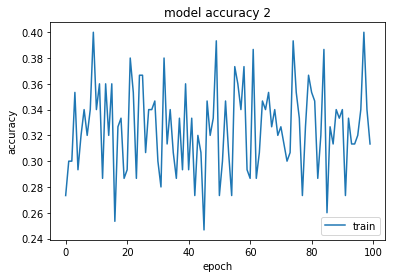

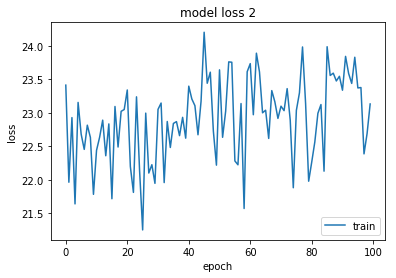

In [142]:
# Grafico para el accuracy
import matplotlib.pyplot as plt
plt.plot(promacc)
plt.title('model accuracy 2')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

# Grafico para el Loss
plt.plot(promerr)
plt.title('model loss 2')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

### Sin reinicio de momentum por epoch

In [143]:
arquitectura=size_layers(3,4,32,16,3) #(3,4,32,16,3)
modelo2=NN_2ocultas(3, arquitectura)
#print ("MPESOS ORIGINAL",modelo2.m_pesos)
print (X_train.shape[0])
errores,accs = modelo2.entrenamiento(arquitectura,X_train,y_onehot, "sigmoid", 0.1, "momentum",0, 0.1) 
#modelo.entrenamiento(x,y,f_activ,tasa_aprend,tipo_backprop,bool_reinicio,tasa_momentum) 

promerr=[]
promacc=[]
#calculo de los promedios por epoch
for i in range(len(errores)):
    prome=np.mean(errores[i])
    proma=np.mean(accs[i])
    promerr.append(prome)
    promacc.append(proma)

print ("MPESOS FINAL",modelo.m_pesos)

150
Epoch:  0
EJEMPLO :  [ 1.88617985 -0.58776353  1.33141568  0.92206376] [ 0.  0.  1.]
ypred [ 0.34293382  0.30695286  0.35011332]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.15917263 -0.58776353  0.59216153  0.26469891] [ 0.  1.  0.]
ypred [ 0.29321165  0.24824524  0.45854311]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -0.58776353  0.76275864  0.39617188] [ 0.  0.  1.]
ypred [ 0.20729563  0.4120028   0.38070157]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.70589294  0.39617188] [ 0.  0.  1.]
ypred [ 0.12547157  0.27524012  0.5992883 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.07679373  0.17038947  0.7528168 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346 -1.05056946  1.78634131  1.44795564] [ 0.  0.  1.]
ypred [ 0.05333846  0.1186319   0.82802964]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.04117862  0.09140627  0.8674151 ]
ytrain [ 0.  1.  0.]
EJEMPL

ypred [ 0.05096416  0.59718423  0.35185161]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.07144652  0.58882976  0.33972371]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -0.1249576   0.25096731  0.00175297] [ 0.  1.  0.]
ypred [ 0.02458788  0.73188359  0.24352853]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.58776353  0.64902723  1.05353673] [ 0.  0.  1.]
ypred [ 0.0189938   0.80654124  0.17446496]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904 -0.1249576  -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.07416531  0.49238964  0.43344505]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.10099664  0.46380211  0.43520125]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.56925129 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.1427256   0.44090655  0.41636785]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.17067529 -1.31297673] [ 1.  0.  0.]
ypred [ 0.19614126  

EJEMPLO :  [-0.41600969 -1.05056946  0.36469871  0.00175297] [ 0.  1.  0.]
ypred [ 0.00654169  0.57525938  0.41819894]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.04661858  0.59437254  0.35900887]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.26418478  0.80065426 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.06571222  0.58999659  0.34429119]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.02057694  0.73186442  0.24755864]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.2803405   0.33784833  1.10395287  1.44795564] [ 0.  0.  1.]
ypred [ 0.01602404  0.80644566  0.1775303 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.10644536  0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.01063251  0.5540037   0.43536379]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -0.35636057  0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.00647858  0.69122337  0.30229806]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.43216

ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.76275864  0.79059079] [ 0.  0.  1.]
ypred [  5.88795802e-04   8.22929336e-02   9.17118271e-01]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478  0.80065426 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.01806061  0.21351253  0.76842686]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.02636873  0.21046629  0.76316498]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117 -1.28197243 -0.43142114 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.00260727  0.07042601  0.92696673]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.00228796  0.25090792  0.74680412]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.00163301  0.20601802  0.79234896]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.31648267] [ 0.  0.  1.]
ypred [ 0.00104016  0.47385744  0.5251024 ]
ytrai

EJEMPLO :  [-1.14301691 -0.1249576  -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.00505263  0.64242565  0.35252172]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [  9.99606097e-05   7.80780229e-01   2.19119811e-01]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.00587061  0.50062423  0.49350515]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [  1.46218405e-04   4.76058071e-01   5.23795711e-01]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654  -0.58776353  0.59216153  0.79059079] [ 0.  0.  1.]
ypred [  9.71325342e-05   6.74764043e-01   3.25138824e-01]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [  5.78700330e-05   4.33661825e-01   5.66280305e-01]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478  0.80065426 -1.05694388 -1.31297673] [ 1.  0.  0.]
ypred [ 0.00412879  0.564

ypred [  2.50996358e-04   5.43133116e-01   4.56615888e-01]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -1.28197243  0.70589294  1.05353673] [ 0.  0.  1.]
ypred [  2.62625657e-07   5.54103620e-01   4.45896118e-01]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [  1.72335203e-07   3.35802415e-01   6.64197413e-01]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966  0.80065426  0.42156442  0.52764485] [ 0.  1.  0.]
ypred [  1.06667655e-07   5.71916963e-01   4.28082931e-01]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.58776353  0.64902723  1.05353673] [ 0.  0.  1.]
ypred [  6.05236378e-08   7.44715544e-01   2.55284396e-01]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [  1.35419053e-04   4.94605118e-01   5.05259463e-01]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -1.05056946  1.78634131  1.44795564] [ 0.  0.  1.]
ypred [  7.65374343e-08   4.61589810e-01   5.38410114e-01]
ytrain [ 0.

ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.1249576   0.25096731  0.00175297] [ 0.  1.  0.]
ypred [  9.70854818e-05   5.55630658e-01   4.44272256e-01]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.52267624 -0.1249576   1.21768427  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.00375442  0.6025206   0.39372497]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.53529583  0.00175297] [ 0.  1.  0.]
ypred [ 0.00321097  0.55176137  0.44502766]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [  1.70736969e-05   6.78181193e-01   3.21801733e-01]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654   0.80065426  0.93335575  1.44795564] [ 0.  0.  1.]
ypred [ 0.00649125  0.59209468  0.40141406]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.56925129 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [  8.07760460e-05   5.74802849e-01   4.25116375e-01]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.74885626 -0.35636057 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [  3.97965470

ypred [ 0.67681933  0.32218428  0.00099639]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [  7.92214536e-01   2.07140604e-01   6.44859817e-04]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.70589294  0.92206376] [ 0.  0.  1.]
ypred [ 0.50930356  0.47659003  0.01410641]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476 -1.28197243  1.16081857  0.79059079] [ 0.  0.  1.]
ypred [ 0.49139337  0.48847611  0.02013052]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904 -0.1249576  -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.49896406  0.49905278  0.00198316]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -0.58776353  0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.68629181  0.31223794  0.00147026]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -1.74477836  0.36469871  0.13322594] [ 0.  1.  0.]
ypred [ 0.45137668  0.5475394   0.00108392]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.80065426 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred

EJEMPLO :  [ 0.18982966 -0.8191665   0.76275864  0.52764485] [ 0.  1.  0.]
ypred [ 0.22445259  0.18942599  0.58612142]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.70589294  0.39617188] [ 0.  0.  1.]
ypred [ 0.13856522  0.49719845  0.36423632]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966  0.80065426  0.42156442  0.52764485] [ 0.  1.  0.]
ypred [ 0.08050721  0.33386153  0.58563126]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.76275864  0.79059079] [ 0.  0.  1.]
ypred [ 0.04701719  0.57432043  0.37866238]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.62768839 -1.74477836 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.02732568  0.37186493  0.60080939]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.11075515  0.32135603  0.56788882]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.87002413 -0.1249576  -1.51186952 -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.08106466  0.20152779  0.71740755]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566

ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115 -0.8191665   0.87649005  0.92206376] [ 0.  0.  1.]
ypred [ 0.05214458  0.20189644  0.74595898]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.04483146  0.1457978   0.80937074]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -1.05056946  1.78634131  1.44795564] [ 0.  0.  1.]
ypred [ 0.17539418  0.12158754  0.70301828]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [ 0.14006359  0.08318973  0.77674668]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.8191665   0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.10232272  0.05984166  0.83783562]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478  0.10644536 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.08236092  0.21645638  0.7011827 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.81962435  1.44795564] [ 0.  0.  1.]
ypred [ 0.27232172  0.19158093  0.53609734]
ytrain [ 0.  0.  1.]

ypred [ 0.69981322  0.05320873  0.24697805]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -1.74477836  0.36469871  0.13322594] [ 0.  1.  0.]
ypred [ 0.76966533  0.03607245  0.19426222]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654  -0.58776353  0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.68830392  0.14369669  0.16799938]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -0.58776353  0.76275864  0.39617188] [ 0.  0.  1.]
ypred [ 0.46225865  0.1120549   0.42568646]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  1.03205722 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.25759505  0.06338277  0.67902218]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.50815342  0.03817698  0.45366959]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.49486315 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.71679927  0.02177266  0.26142806]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.81326447  

ypred [ 0.00839942  0.39967293  0.59192765]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.00503695  0.24176278  0.75320027]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.64384411  1.26346019  1.33141568  1.71090158] [ 0.  0.  1.]
ypred [ 0.00346835  0.16661807  0.82991357]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.47843012  0.26469891] [ 0.  1.  0.]
ypred [ 0.00264351  0.12700397  0.87035252]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.93335575  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.00186873  0.36291599  0.63521528]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691 -1.28197243  0.42156442  0.65911782] [ 0.  0.  1.]
ypred [ 0.00119675  0.2672551   0.73154815]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [ 0.00081735  0.18509497  0.81408768]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [  6.11270333e

EJEMPLO :  [-1.87002413 -0.1249576  -1.51186952 -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.38485916  0.16597329  0.44916755]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [ 0.65575662  0.0923158   0.25192757]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.76275864  0.79059079] [ 0.  0.  1.]
ypred [ 0.5314638   0.28583166  0.18270454]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.4321654  -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.34818382  0.21411918  0.437697  ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.74477836  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.21632493  0.47408968  0.3095854 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.31648267] [ 0.  0.  1.]
ypred [ 0.12161658  0.70206504  0.17631838]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.64384411 -0.1249576   1.16081857  0.52764485] [ 0.  0.  1.]
ypred [ 0.07823121  0.49753961  0.42422919]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333

EJEMPLO :  [-0.90068117  0.56925129 -1.17067529 -0.91855782] [ 1.  0.  0.]
ypred [ 0.07108843  0.59168666  0.33722491]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.28227596  0.45863567  0.25908837]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.91683689 -0.35636057  0.47843012  0.13322594] [ 0.  1.  0.]
ypred [ 0.59359484  0.25978161  0.14662355]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.15917263 -0.1249576   0.99022146  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.40465681  0.50768461  0.08765858]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.30172053  0.42058221  0.27769726]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [ 0.55282271  0.25479537  0.19238192]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.3738044   0.50816791  0.1180277 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566

EJEMPLO :  [-0.17367395 -1.28197243  0.70589294  1.05353673] [ 0.  0.  1.]
ypred [ 0.13781446  0.28066665  0.58151889]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.87002413 -0.1249576  -1.51186952 -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.08322918  0.16667995  0.75009086]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.58776353  0.64902723  1.05353673] [ 0.  0.  1.]
ypred [ 0.26999454  0.12450772  0.60549774]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115  0.33784833  0.87649005  1.44795564] [ 0.  0.  1.]
ypred [ 0.19737198  0.0785869   0.72404112]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.13541276  0.05313083  0.81145642]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.10099141  0.03956705  0.85944154]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.91683689 -0.35636057  0.47843012  0.13322594] [ 0.  1.  0.]
ypred [ 0.08594722  0.15652886  0.75752392]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982

ypred [ 0.60707616  0.06634983  0.32657401]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.15917263 -0.1249576   0.99022146  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.76159503  0.04074533  0.19765964]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.76501198 -0.35636057  1.44514709  0.79059079] [ 0.  0.  1.]
ypred [ 0.52058912  0.02593132  0.45347956]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133   0.80065426 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.2935362   0.0145174   0.69194641]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.91683689 -0.1249576   0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.53854379  0.00859481  0.4528614 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.54699568  0.03808703  0.41491729]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.10644536  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.33386832  0.02693681  0.63919487]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.20734821  

EJEMPLO :  [ 1.2803405   0.10644536  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.58681091  0.03678256  0.37640653]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.49413055  0.14391341  0.36195604]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.31648267] [ 0.  0.  1.]
ypred [ 0.67495219  0.10203051  0.2230173 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -1.74477836  0.36469871  0.13322594] [ 0.  1.  0.]
ypred [ 0.45468032  0.06436992  0.48094976]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.93335575  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.35501892  0.22311185  0.42186924]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -1.28197243  0.08037019 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.21002681  0.15320584  0.63676735]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.76275864  0.79059079] [ 0.  0.  1.]
ypred [ 0.13889723  0.39863914  0.46246363]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652

EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.40246072  0.51752822  0.08001106]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  0.56925129 -1.17067529 -0.91855782] [ 1.  0.  0.]
ypred [ 0.66527595  0.29027489  0.04444917]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.12851559 -0.1249576   1.6157442   1.1850097 ] [ 0.  0.  1.]
ypred [ 0.79095064  0.18131204  0.02773733]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.72954058  0.15680997  0.11364946]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969  1.03205722 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.49902582  0.41073374  0.09024044]
ytrain [ 1.  0.  0.]
Epoch:  11
EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.66460175  0.28067106  0.05472719]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.76275864  0.79059079] [ 0.  0.  1.]
ypred [ 0.43012082  0.53713994  0.03273923]
ytrain [ 0.  0.  1.]
EJEMPLO :

EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [ 0.21136919  0.62056767  0.16806313]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  0.53529583  0.52764485] [ 0.  1.  0.]
ypred [ 0.16054292  0.73156678  0.1078903 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.11139645  0.81498986  0.0736137 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.08352061  0.86137952  0.05509987]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.06673939  0.88923898  0.04402163]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.05561811  0.90769653  0.03668536]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.33784833 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.04822692  0.80319835  0.14857473]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717

EJEMPLO :  [ 2.12851559 -0.1249576   1.6157442   1.1850097 ] [ 0.  0.  1.]
ypred [ 0.28425342  0.19695167  0.51879491]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.17634139  0.13984718  0.68381142]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.15917263 -0.58776353  0.59216153  0.26469891] [ 0.  1.  0.]
ypred [ 0.42834529  0.09217674  0.47947797]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133   2.42047502 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.35767675  0.28872945  0.3535938 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.59557662  0.19634661  0.20807676]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -1.74477836  0.36469871  0.13322594] [ 0.  1.  0.]
ypred [ 0.75604393  0.11932163  0.12463443]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133   1.03205722 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.57048146  0.34227907  0.08723947]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068

EJEMPLO :  [ 1.03800476 -0.1249576   0.81962435  1.44795564] [ 0.  0.  1.]
ypred [ 0.65971723  0.25952896  0.08075381]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.64384411 -0.1249576   1.16081857  0.52764485] [ 0.  0.  1.]
ypred [ 0.54770198  0.19212017  0.26017784]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478  0.10644536 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.32012049  0.11101002  0.56886949]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654  -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.55557248  0.06484295  0.37958456]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.47885884  0.2237951   0.29734606]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.66649538  0.15544127  0.17806335]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -1.28197243  0.08037019 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.78640382  0.10034244  0.11325374]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250

ypred [ 0.67692242  0.13663683  0.18644075]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.74477836  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.47251886  0.37702577  0.15045537]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.26291462  0.65214739  0.08493798]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.51182868  0.43725438  0.05091694]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.33580107  0.6345052   0.02969373]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.21014951  0.77148529  0.0183652 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.4687508   0.51968666  0.01156254]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  0.33784833 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.47864252  

ypred [ 0.72321681  0.04775419  0.22902899]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.58776353  0.64902723  1.05353673] [ 0.  0.  1.]
ypred [ 0.79875493  0.03946206  0.16178301]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.35636057  0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.55911062  0.02683282  0.41405656]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.48306103  0.10968231  0.40725666]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.28817828  0.07643503  0.63538669]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.17795592  0.04793948  0.77410461]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.12574296  0.03392653  0.84033051]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.35855642  

EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.71090158] [ 0.  0.  1.]
ypred [ 0.50390008  0.39566446  0.10043546]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.64384411 -0.1249576   1.16081857  0.52764485] [ 0.  0.  1.]
ypred [ 0.4151871   0.28255817  0.30225472]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -0.58776353  0.76275864  0.39617188] [ 0.  0.  1.]
ypred [ 0.23800826  0.15967767  0.60231407]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.58776353  0.47843012  0.39617188] [ 0.  1.  0.]
ypred [ 0.14112395  0.0945435   0.76433255]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.1031333   0.29413276  0.60273393]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117 -1.28197243 -0.43142114 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.06486815  0.21383922  0.72129263]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.04061068  0.47782366  0.48156566]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333

ypred [ 0.07011998  0.47084853  0.45903149]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.0399349   0.26418763  0.69587747]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969  2.65187798 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.02572802  0.1699489   0.80432308]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.26418478  0.80065426 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.10681011  0.14841097  0.74477892]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.87002413 -0.1249576  -1.51186952 -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.36734286  0.10460863  0.5280485 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -0.1249576   0.25096731  0.00175297] [ 0.  1.  0.]
ypred [ 0.65172483  0.05755847  0.2907167 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  0.53529583  0.52764485] [ 0.  1.  0.]
ypred [ 0.57087789  0.20259024  0.22653186]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346 -0.58776353  1.67260991  1.05353673] [ 0.  0.  1.]
ypred [ 0.35051498  

EJEMPLO :  [-1.74885626  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.19943537  0.34199285  0.45857178]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.45619063  0.24981401  0.29399536]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.91683689 -0.1249576   0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.31348352  0.50861985  0.17789663]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -0.1249576   0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.18082023  0.71786426  0.10131551]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115 -0.8191665   0.87649005  0.92206376] [ 0.  0.  1.]
ypred [ 0.12989374  0.56395598  0.30615028]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.07332084  0.32119635  0.6054828 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.24268019  0.24157026  0.51574955]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068

EJEMPLO :  [ 0.67450115  0.33784833  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.59849606  0.04526139  0.35624256]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.58776353  0.76275864  1.57942861] [ 0.  0.  1.]
ypred [ 0.53718979  0.16977603  0.29303419]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  0.33784833 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.32888829  0.11992376  0.55118795]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654  -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.56589732  0.07152685  0.36257583]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.2844067  -1.18150376] [ 1.  0.  0.]
ypred [ 0.47980377  0.2409638   0.27923243]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.8191665   0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.66597262  0.1670286   0.16699878]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.47222365  0.41892342  0.10885293]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301

EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.01529379  0.74232507  0.24238114]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.87649005  1.44795564] [ 0.  0.  1.]
ypred [ 0.01038144  0.82494065  0.16467792]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.00690352  0.57629484  0.41680164]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.00384111  0.32223426  0.67392463]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.00224996  0.55855287  0.43919717]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.81962435  1.44795564] [ 0.  0.  1.]
ypred [ 0.01030474  0.57774378  0.41195149]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476 -1.28197243  1.16081857  0.79059079] [ 0.  0.  1.]
ypred [ 0.00731398  0.35337293  0.63931309]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566

EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.23170751  0.10245979  0.6658327 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.1448163   0.06397643  0.79120726]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.11362162  0.22440797  0.66197041]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.38535265  0.33784833 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.07482394  0.17165455  0.75352151]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.25312116  0.13414324  0.6127356 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.4920192   1.72626612  1.50201279  1.05353673] [ 0.  0.  1.]
ypred [ 0.5637117   0.07810438  0.35818393]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.37406558  0.04532146  0.58061296]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367

ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.35636057 -0.09022692  0.13322594] [ 0.  1.  0.]
ypred [ 0.50013298  0.05925249  0.44061453]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478  0.80065426 -1.05694388 -1.31297673] [ 1.  0.  0.]
ypred [ 0.44176637  0.2091374   0.34909623]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133   0.80065426 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.64826772  0.14429616  0.20743612]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.7787598  0.0915633  0.1296769]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.35636057  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.61429434  0.28988293  0.09582273]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.3516164   0.59389265  0.05449096]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.27610684  0.52977964  0.19411352]
ytrain [ 1.  0.  0.]
EJ

ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115  0.33784833  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.1263649   0.66519902  0.20843608]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.35636057 -0.09022692  0.13322594] [ 0.  1.  0.]
ypred [ 0.08351727  0.75631954  0.16016319]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.17067529 -1.31297673] [ 1.  0.  0.]
ypred [ 0.05859524  0.82732915  0.11407561]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.35636057  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.21252306  0.69559379  0.09188315]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.40150837  0.33784833  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.16738183  0.77036119  0.06225698]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -0.8191665   0.76275864  0.52764485] [ 0.  1.  0.]
ypred [ 0.1213186   0.83423136  0.04445004]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  0.56925129 -1.17067529 -0.91855782] [ 1.  0.  0.]
ypred [ 0.09347502  0.87232807  0.03419691]
ytrain [ 1.  0.  0.]

EJEMPLO :  [-0.90068117  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.36485947  0.03137246  0.60376807]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -1.74477836 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.58472929  0.0181897   0.39708102]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -0.1249576   0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.56934437  0.07697011  0.35368552]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [ 0.34622283  0.05421387  0.59956331]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.27469915  0.19824046  0.52706039]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.16744506  0.1407879   0.69176704]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.10919368  0.0932237   0.79758262]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982

ypred [ 0.41422365  0.06715763  0.51861872]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966  0.80065426  0.42156442  0.52764485] [ 0.  1.  0.]
ypred [ 0.28335019  0.04020421  0.6764456 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.23828027  0.1549456   0.60677413]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346 -1.05056946  1.78634131  1.44795564] [ 0.  0.  1.]
ypred [ 0.15231366  0.11533055  0.73235579]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608  2.18907205 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.10382705  0.07982289  0.81635007]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691 -1.51337539 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.31722469  0.05822645  0.62454887]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.58776353  0.47843012  0.39617188] [ 0.  1.  0.]
ypred [ 0.2913812   0.20913165  0.49948715]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.2844067  -1.18150376] [ 1.  0.  0.]
ypred [ 0.1783724   

ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.74579092  0.12092664  0.13328244]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [ 0.54674295  0.08482167  0.36843538]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -1.28197243  0.08037019 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.41026324  0.27403065  0.31570611]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -0.58776353  0.42156442  0.13322594] [ 0.  1.  0.]
ypred [ 0.23533779  0.58114522  0.18351699]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.51337539  0.02350449 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.13733104  0.75543564  0.10723332]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.09438828  0.83189997  0.07371175]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.2844067  -1.18150376] [ 1.  0.  0.]
ypred [ 0.29825931  0.64704728  0.05469341]
ytrain [ 1.  0.  0.]

ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [  1.36304844e-01   8.63231406e-01   4.63749625e-04]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346 -1.05056946  1.78634131  1.44795564] [ 0.  0.  1.]
ypred [ 0.13205461  0.86572166  0.00222373]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.58776353  0.64902723  1.05353673] [ 0.  0.  1.]
ypred [ 0.13027612  0.85701889  0.01270498]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.12277545  0.80795508  0.06926947]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.35941228  0.58119991  0.0593878 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133   0.80065426 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.25689049  0.70556731  0.03754221]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.51924183  0.45793149  0.02282668]
ytrai

ypred [ 0.08467828  0.72042821  0.19489351]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.76275864  0.79059079] [ 0.  0.  1.]
ypred [ 0.2707531   0.58516774  0.14407916]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.21310907  0.4016037   0.38528723]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.47440699  0.25038477  0.27520824]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -0.58776353  0.42156442  0.13322594] [ 0.  1.  0.]
ypred [ 0.32682701  0.50394934  0.16922365]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.18839901  0.71515482  0.09644618]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.13653102  0.56712401  0.29634497]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.35636057 -0.09022692  0.13322594] [ 0.  1.  0.]
ypred [ 0.07738328  

ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.22242997  0.22476988  0.55280014]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.48561791  0.16403928  0.35034282]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.71090158] [ 0.  0.  1.]
ypred [ 0.70778172  0.09408796  0.19813032]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.76275864  0.79059079] [ 0.  0.  1.]
ypred [ 0.49026558  0.05936962  0.4503648 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.27680477  0.03320903  0.6899862 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.52531129  0.01979552  0.45489319]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.74477836  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.72451726  0.0113778   0.26410494]
ytrain [ 0.  1.  0.]

ypred [ 0.22574212  0.7027235   0.07153438]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -0.58776353  0.76275864  0.39617188] [ 0.  0.  1.]
ypred [ 0.17301407  0.54354384  0.28344209]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.4321654   0.80065426  0.93335575  1.44795564] [ 0.  0.  1.]
ypred [ 0.09783876  0.30765374  0.5945075 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.40150837  0.33784833  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.0574762   0.18075034  0.76177346]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.53529583  0.39617188] [ 0.  1.  0.]
ypred [ 0.03704629  0.43212835  0.53082536]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.81962435  1.05353673] [ 0.  0.  1.]
ypred [ 0.02064762  0.6811824   0.29816997]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133   0.80065426 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.0121908   0.44624978  0.54155942]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.4920192   1.72626612  1.50201279  1.05353673] [ 0.  0.  1.]
ypred [ 0.05305561  

ypred [ 0.00209054  0.26338141  0.73452804]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.05056946  0.36469871  0.00175297] [ 0.  1.  0.]
ypred [ 0.0012611   0.51668013  0.48205877]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395  1.72626612 -1.17067529 -1.18150376] [ 1.  0.  0.]
ypred [ 0.00072181  0.72103015  0.27824804]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.00333647  0.7364712   0.26019234]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [ 0.00245151  0.46530322  0.53224527]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.00146767  0.64553371  0.35299862]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.58776353  0.47843012  0.39617188] [ 0.  1.  0.]
ypred [ 0.00091952  0.77564325  0.22343722]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [  6.52181006e

EJEMPLO :  [-0.7795133   1.03205722 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.39827797  0.04428978  0.55743225]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117 -1.28197243 -0.43142114 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.63436044  0.03112748  0.33451207]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.59124414  0.1259753   0.28278056]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133   2.42047502 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.36510486  0.09009636  0.54479878]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.15917263 -0.58776353  0.59216153  0.26469891] [ 0.  1.  0.]
ypred [ 0.58958655  0.05346185  0.3569516 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.28197243  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.51914853  0.19365592  0.28719555]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.32159783  0.50209026  0.1763119 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600

EJEMPLO :  [-0.41600969 -1.05056946  0.36469871  0.00175297] [ 0.  1.  0.]
ypred [ 0.51787646  0.44200271  0.04012083]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  0.56925129 -1.17067529 -0.91855782] [ 1.  0.  0.]
ypred [ 0.29156149  0.6860382   0.02240031]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.47843012  0.26469891] [ 0.  1.  0.]
ypred [ 0.53677269  0.44996319  0.01326413]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346  1.72626612  1.67260991  1.31648267] [ 0.  0.  1.]
ypred [ 0.35149592  0.64074973  0.00775434]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.32500392  0.64031681  0.03467927]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.28004224  0.55603696  0.1639208 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.1249576   0.25096731  0.00175297] [ 0.  1.  0.]
ypred [ 0.17757797  0.35286337  0.46955866]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301

ypred [ 0.22887666  0.18907271  0.58205063]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691 -1.28197243  0.42156442  0.65911782] [ 0.  0.  1.]
ypred [ 0.14807841  0.4405654   0.41135619]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.56925129 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.08643243  0.29231054  0.62125703]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.27572577  0.21897688  0.50529735]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133   0.80065426 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.58229927  0.12556401  0.29213671]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.75590126  0.07333573  0.17076301]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.70589294  0.92206376] [ 0.  0.  1.]
ypred [ 0.62378802  0.2461008   0.13011118]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478  0.10644536 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.43740185  

EJEMPLO :  [ 0.4321654  -1.97618132  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.56697397  0.31264475  0.12038127]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.37924953  0.55028621  0.07046426]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.602435    0.35665615  0.04090885]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.58776353  0.76275864  1.57942861] [ 0.  0.  1.]
ypred [ 0.54760738  0.29639878  0.15599384]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.35647924  0.19122652  0.45229425]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.22583201  0.44147228  0.33269571]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.4812379   0.31023525  0.20852685]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600

ypred [ 0.69367162  0.00704942  0.29927895]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.68799569  0.03188933  0.28011498]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  0.56925129 -1.17067529 -0.91855782] [ 1.  0.  0.]
ypred [ 0.60288095  0.1530768   0.24404225]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.72793721  0.11606118  0.15600161]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.4321654   0.80065426  0.93335575  1.44795564] [ 0.  0.  1.]
ypred [ 0.51860982  0.07892695  0.40246324]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.88617985 -0.58776353  1.33141568  0.92206376] [ 0.  0.  1.]
ypred [ 0.29006238  0.0439395   0.66599811]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.18121276  0.02743787  0.79134937]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.58776353  0.64902723  1.05353673] [ 0.  0.  1.]
ypred [ 0.43529232  

EJEMPLO :  [-0.41600969 -1.05056946  0.36469871  0.00175297] [ 0.  1.  0.]
ypred [ 0.69055766  0.04786298  0.26157936]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.15917263 -0.1249576   0.99022146  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.57247105  0.21183487  0.21569408]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.56925129 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.36253785  0.15861406  0.47884808]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.5880954   0.09435317  0.31755143]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.87649005  1.44795564] [ 0.  0.  1.]
ypred [ 0.47351881  0.29267515  0.23380604]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.58776353  0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.29631992  0.20959623  0.49408385]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.18441848  0.46828824  0.34729328]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099

ypred [ 0.01075151  0.29917926  0.69006922]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.04769263  0.27619809  0.67610929]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969  1.03205722 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.2112044  0.2278097  0.5609859]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115 -0.8191665   0.87649005  0.92206376] [ 0.  0.  1.]
ypred [ 0.52797943  0.13626518  0.33575539]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.81962435  1.44795564] [ 0.  0.  1.]
ypred [ 0.35471603  0.07934847  0.5659355 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.58776353  0.42156442  0.13322594] [ 0.  1.  0.]
ypred [ 0.21170189  0.04668437  0.74161375]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.17235669  0.17445578  0.65318753]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  1.03205722 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.11322769  0.1

EJEMPLO :  [ 0.18982966 -0.8191665   0.76275864  0.52764485] [ 0.  1.  0.]
ypred [ 0.0871977   0.77279592  0.14000638]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.06130135  0.84026138  0.09843727]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.33784833 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.04522305  0.64750427  0.30727268]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.74477836  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.17167836  0.53585244  0.2924692 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.12321436  0.69399836  0.18278728]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.56925129 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.08074832  0.4824667   0.43678498]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.26418478  0.80065426 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.26349286  0.36383535  0.37267179]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367

EJEMPLO :  [-0.53717756 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.06508111  0.59261766  0.34230123]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885626  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.03892893  0.75387936  0.20719171]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654  -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.1507792  0.6765832  0.1726376]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.11783699  0.76645992  0.1157031 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.34705526  0.57113608  0.08180866]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.76275864  1.44795564] [ 0.  0.  1.]
ypred [ 0.63431953  0.32007363  0.04560684]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904 -1.74477836 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.5739456   0.25731946  0.16873495]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885626

ypred [ 0.51836336  0.1173426   0.36429405]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.28197243  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.36683701  0.33844616  0.29471683]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.20515818  0.62779737  0.16704444]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.8191665   0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.12386502  0.77514622  0.10098876]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.08735028  0.84142238  0.07122734]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.28373323  0.6625482   0.05371857]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.58776353  0.76275864  1.57942861] [ 0.  0.  1.]
ypred [ 0.5895347   0.37980377  0.03066152]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -0.8191665   0.76275864  0.52764485] [ 0.  1.  0.]
ypred [ 0.56118437  

ypred [  2.14943128e-01   4.22691634e-04   7.84634181e-01]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.20462894  0.00198937  0.79338169]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654  -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.20173797  0.01136135  0.78690068]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.05056946  0.36469871  0.00175297] [ 0.  1.  0.]
ypred [ 0.19122369  0.0624381   0.74633821]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.65834543  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.15042371  0.26244336  0.58713294]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.62768839 -1.74477836 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.39489262  0.20923453  0.39587285]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.66183559  0.11821601  0.2199484 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred

ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.35636057  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.11171141  0.17954635  0.70874225]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.70589294  0.39617188] [ 0.  0.  1.]
ypred [ 0.08634783  0.4414703   0.47218187]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.76501198 -0.35636057  1.44514709  0.79059079] [ 0.  0.  1.]
ypred [ 0.05187728  0.29777235  0.65035037]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.65834543  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.03263827  0.18952218  0.77783955]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.13084603  0.16180958  0.70734439]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  0.56925129 -1.17067529 -0.91855782] [ 1.  0.  0.]
ypred [ 0.41257576  0.10879988  0.47862435]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.74885626  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.67712009  0.05977153  0.26310838]
ytrain [ 1.  0.  0.]

ypred [ 0.80883051  0.04327546  0.14789403]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.35636057 -0.09022692  0.13322594] [ 0.  1.  0.]
ypred [ 0.85883228  0.03195643  0.10921129]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.64384411  1.26346019  1.33141568  1.71090158] [ 0.  0.  1.]
ypred [ 0.77429775  0.13075251  0.09494974]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.58264227  0.1144546   0.30290313]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.32983074  0.06577961  0.60438965]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691 -0.1249576  -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.19554632  0.0390577   0.76539598]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  1.26346019 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.45026801  0.02483146  0.52490053]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.76275864  1.44795564] [ 0.  0.  1.]
ypred [ 0.69028397  

ypred [ 0.15931139  0.21163478  0.62905383]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969 -1.74477836  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.09940428  0.13010814  0.77048758]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904 -1.74477836 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.06873499  0.36132332  0.56994169]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885626 -0.35636057 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.03826714  0.64227933  0.31945353]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.12851559 -0.1249576   1.6157442   1.1850097 ] [ 0.  0.  1.]
ypred [ 0.14621706  0.59160736  0.26217558]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.35636057  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.10509165  0.36882257  0.52608579]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -0.35636057  0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.06232157  0.59196505  0.34571338]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346  1.72626612  1.67260991  1.31648267] [ 0.  0.  1.]
ypred [ 0.03736683  

EJEMPLO :  [ 1.2803405   0.10644536  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.20350717  0.26972299  0.52676984]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608  2.18907205 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.12119354  0.51679397  0.36201248]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.51337539 -0.03336121 -0.26119297] [ 0.  1.  0.]
ypred [ 0.34277106  0.40265659  0.25457235]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691 -1.28197243  0.42156442  0.65911782] [ 0.  0.  1.]
ypred [ 0.23085933  0.61996059  0.14918008]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -1.74477836  0.36469871  0.13322594] [ 0.  1.  0.]
ypred [ 0.1561747   0.45554986  0.38827544]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.09197199  0.64638965  0.26163836]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.05533852  0.42467597  0.51998551]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333

EJEMPLO :  [-0.17367395 -0.1249576   0.25096731  0.00175297] [ 0.  1.  0.]
ypred [ 0.41524681  0.18294636  0.40180683]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.26971524  0.43498354  0.29530122]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.52209932  0.29800367  0.17989701]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  1.26346019 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.37671471  0.19380777  0.42947751]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969  1.03205722 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.60174462  0.1130204   0.28523498]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.75793323  0.06805782  0.17400896]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654  -0.58776353  0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.6313056   0.23389272  0.13480168]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800

EJEMPLO :  [-1.02184904 -1.74477836 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.156354    0.00534808  0.83829792]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.14772273  0.02481735  0.82745991]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.05056946  0.36469871  0.00175297] [ 0.  1.  0.]
ypred [ 0.4017518   0.02023788  0.57801032]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.64384411 -0.1249576   1.16081857  0.52764485] [ 0.  0.  1.]
ypred [ 0.40485562  0.08669733  0.50844705]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.40150837  0.33784833  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.25203292  0.0623753   0.68559177]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.8191665   0.87649005  0.92206376] [ 0.  0.  1.]
ypred [ 0.1974571   0.22224986  0.58029303]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.72626612 -1.2844067  -1.18150376] [ 1.  0.  0.]
ypred [ 0.12336181  0.16155887  0.71507932]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484

ypred [ 0.3098217   0.06087179  0.62930651]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608  2.18907205 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.23987683  0.21157284  0.54855033]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -0.35636057  1.04708716  0.79059079] [ 0.  0.  1.]
ypred [ 0.50263265  0.15266918  0.34469817]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.33247259  0.09077357  0.57675383]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.4321654  -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.1993318   0.05384563  0.74682257]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.12851559 -0.1249576   1.6157442   1.1850097 ] [ 0.  0.  1.]
ypred [ 0.15942017  0.19548326  0.64509657]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.10393289  0.14825814  0.74780898]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.10644536  0.76275864  1.44795564] [ 0.  0.  1.]
ypred [ 0.07216097  

EJEMPLO :  [-0.29484182 -1.28197243  0.08037019 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.22836813  0.73802722  0.03360465]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117 -1.28197243 -0.43142114 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.15633034  0.82029835  0.02337132]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346  1.72626612  1.67260991  1.31648267] [ 0.  0.  1.]
ypred [ 0.11775384  0.86461412  0.01763204]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [ 0.10735854  0.81522166  0.0774198 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.35636057  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.08275556  0.84740811  0.06983633]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654  -0.58776353  0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.06525048  0.87881307  0.05593644]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  1.26346019 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.05338707  0.73901049  0.20760244]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.28034

ypred [ 0.07166755  0.1702236   0.75810886]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.4920192   1.72626612  1.50201279  1.05353673] [ 0.  0.  1.]
ypred [ 0.2481712   0.15553414  0.59629466]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.18178639  0.09971796  0.71849565]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133   1.03205722 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.44091716  0.06445102  0.49463183]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.47843012  0.26469891] [ 0.  1.  0.]
ypred [ 0.68648868  0.0359403   0.27757102]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.76501198 -0.35636057  1.44514709  0.79059079] [ 0.  0.  1.]
ypred [ 0.63050191  0.13929629  0.2302018 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.35636057 -0.09022692  0.13322594] [ 0.  1.  0.]
ypred [ 0.40101741  0.10231678  0.49666581]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.31648267] [ 0.  0.  1.]
ypred [ 0.28670722  

EJEMPLO :  [-0.05250608  2.18907205 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.12393391  0.16794288  0.70812321]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.35689809  0.13898774  0.50411417]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.640282    0.07866412  0.28105389]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.53515154  0.25585223  0.20899623]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.35636057 -0.09022692  0.13322594] [ 0.  1.  0.]
ypred [ 0.69261757  0.18030462  0.12707781]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.33784833 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.48090757  0.43727811  0.08181431]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.65674884  0.29492484  0.04832632]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068

ypred [ 0.13959479  0.45856922  0.40183599]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.08371172  0.64450527  0.27178301]
ytrain [ 0.  0.  1.]
Epoch:  41
EJEMPLO :  [ 0.4321654  -0.58776353  0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.05020163  0.42087047  0.5289279 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346  1.72626612  1.67260991  1.31648267] [ 0.  0.  1.]
ypred [ 0.02886832  0.2440907   0.72704098]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.91683689 -0.35636057  0.47843012  0.13322594] [ 0.  1.  0.]
ypred [ 0.01923502  0.16277666  0.81798833]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969  2.65187798 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.01280075  0.41355612  0.57364313]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.93335575  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.0558802   0.42536381  0.51875599]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969 -1.05056946  0.36469871  0.00175297] [ 0.  1.  0.]
ypred [ 0

EJEMPLO :  [ 1.64384411  0.33784833  1.27454998  0.79059079] [ 0.  0.  1.]
ypred [ 0.45749198  0.23595109  0.30655693]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.27760818  0.16422691  0.55816492]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.91683689 -0.1249576   0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.52763516  0.0996171   0.37274774]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.42596952  0.30298953  0.27104095]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.58776353  0.64902723  1.05353673] [ 0.  0.  1.]
ypred [ 0.63471974  0.20575896  0.1595213 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.1249576   0.25096731  0.00175297] [ 0.  1.  0.]
ypred [ 0.45902446  0.13755784  0.4034177 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.31468241  0.37187369  0.3134439 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333

EJEMPLO :  [-0.41600969 -1.51337539  0.02350449 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.1863257   0.31758528  0.49608903]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.10487916  0.61367977  0.28144107]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117 -1.28197243 -0.43142114 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.0621179   0.41118365  0.52669845]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346 -1.05056946  1.78634131  1.44795564] [ 0.  0.  1.]
ypred [ 0.03609474  0.62054195  0.34336331]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.15917263 -0.58776353  0.59216153  0.26469891] [ 0.  1.  0.]
ypred [ 0.02108383  0.3987747   0.58014146]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.76275864  1.44795564] [ 0.  0.  1.]
ypred [ 0.01225972  0.61260116  0.37513912]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [ 0.00713706  0.39301439  0.59984856]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068

ypred [ 0.21836794  0.74450543  0.03712662]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.15917263  0.33784833  1.21768427  1.44795564] [ 0.  0.  1.]
ypred [ 0.47539995  0.50148864  0.02311141]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.46666764  0.43778608  0.09554628]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -1.74477836  0.36469871  0.13322594] [ 0.  1.  0.]
ypred [ 0.66859505  0.26407383  0.06733112]
ytrain [ 0.  1.  0.]
Epoch:  43
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.44058726  0.51808237  0.04133037]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.91683689 -0.1249576   0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.36452957  0.47805747  0.15741296]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.21933871  0.67032204  0.11033925]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969  2.65187798 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0

ypred [ 0.00654993  0.54927355  0.44417652]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.87649005  1.44795564] [ 0.  0.  1.]
ypred [ 0.02933215  0.56057178  0.41009607]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.02076194  0.34223846  0.6369996 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.80065426 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.01238912  0.5764189   0.41119198]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.05400109  0.57398636  0.37201255]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.23178897  0.46786936  0.30034167]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.16388635  0.65643257  0.17968108]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476 -1.28197243  1.16081857  0.79059079] [ 0.  0.  1.]
ypred [ 0.1075778   

ypred [ 0.48382782  0.42886155  0.08731063]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.08037019  0.00175297] [ 0.  1.  0.]
ypred [ 0.3192664   0.62973558  0.05099802]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.87002413 -0.1249576  -1.51186952 -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.19913473  0.76944214  0.03142313]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133   1.03205722 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.45636925  0.52366016  0.01997059]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -0.58776353  0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.6934942   0.29532015  0.01118565]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.45341903  0.53996227  0.0066187 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  0.56925129 -1.17067529 -0.91855782] [ 1.  0.  0.]
ypred [ 0.26525911  0.73090727  0.00383362]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.81962435  1.05353673] [ 0.  0.  1.]
ypred [ 0.51831922  

ypred [ 0.56852859  0.35700007  0.07447134]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.26418478  0.80065426 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.74322567  0.21282921  0.04394512]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.82525078  0.14486746  0.02988176]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.86771303  0.10966809  0.02261888]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.8933477   0.08841668  0.01823563]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346  1.72626612  1.67260991  1.31648267] [ 0.  0.  1.]
ypred [ 0.83863983  0.08099722  0.08036296]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [ 0.63151191  0.06084351  0.30764458]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.49850303  

ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.48422915  0.27366223  0.24210862]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115 -0.8191665   0.87649005  0.92206376] [ 0.  0.  1.]
ypred [ 0.71259546  0.15240381  0.13500073]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904 -0.1249576  -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.53185779  0.10321603  0.36492618]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.68500075  0.06224781  0.25275145]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966  0.80065426  0.42156442  0.52764485] [ 0.  1.  0.]
ypred [ 0.57989713  0.2190025   0.20110037]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.58776353  0.64902723  1.05353673] [ 0.  0.  1.]
ypred [ 0.34916326  0.53050051  0.12033623]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.70589294  0.92206376] [ 0.  0.  1.]
ypred [ 0.24076295  0.42043885  0.3387982 ]
ytrain [ 0.  0.  1.]

ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.1356851   0.20460326  0.65971163]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.35636057  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.08433951  0.12700261  0.78865788]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478  0.10644536 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.05858523  0.35655831  0.58485645]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.2844067  -1.18150376] [ 1.  0.  0.]
ypred [ 0.20920819  0.32464985  0.46614196]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133   1.03205722 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.52000123  0.19860577  0.281393  ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.4920192   1.72626612  1.50201279  1.05353673] [ 0.  0.  1.]
ypred [ 0.72889402  0.1122612   0.15884478]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.58776353  0.47843012  0.39617188] [ 0.  1.  0.]
ypred [ 0.52493065  0.07382866  0.40124068]
ytrain [ 0.  1.  0.]

ypred [ 0.45757276  0.08039371  0.46203353]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.34703188  0.30673437  0.34623375]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.19431328  0.61205291  0.19363381]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  0.56925129 -1.17067529 -0.91855782] [ 1.  0.  0.]
ypred [ 0.44248646  0.43604101  0.12147253]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.87002413 -0.1249576  -1.51186952 -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.68565952  0.24653005  0.06781042]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133   1.03205722 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.79962398  0.15719344  0.04318258]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.85382873  0.11467337  0.03149789]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [ 0.77129203  

EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.62843126  0.36962262  0.00194612]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.77137603  0.22740862  0.00121535]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.10644536  0.93335575  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.77977935  0.21454407  0.00567658]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395  1.72626612 -1.17067529 -1.18150376] [ 1.  0.  0.]
ypred [ 0.76052542  0.2078064   0.03166818]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.81971576  0.15258243  0.02770181]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328  0.80065426  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.86277741  0.11582313  0.02139946]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.80319561  0.10435743  0.09244695]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800

ypred [ 0.69391124  0.17711656  0.12897219]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478  0.80065426 -1.05694388 -1.31297673] [ 1.  0.  0.]
ypred [ 0.52501029  0.12073243  0.35425728]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.40150837  0.33784833  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.68239458  0.07262818  0.24497725]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.56447197  0.24527723  0.1902508 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -1.74477836 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.70621464  0.17595849  0.11782687]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133   2.42047502 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.49106146  0.43257152  0.07636702]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.64384411  0.33784833  1.27454998  0.79059079] [ 0.  0.  1.]
ypred [ 0.66176388  0.29297008  0.04526605]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.70589294  0.39617188] [ 0.  0.  1.]
ypred [ 0.5870076   

ypred [ 0.5962143   0.11917167  0.28461403]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.52267624 -0.1249576   1.21768427  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.45851641  0.34374895  0.19773465]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.10644536  0.93335575  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.29441241  0.25191509  0.4536725 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.71090158] [ 0.  0.  1.]
ypred [ 0.16496426  0.14303065  0.69200509]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.1057309   0.09179421  0.80247489]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691 -0.1249576  -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.07832881  0.29085617  0.63081502]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133   0.80065426 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.2606386   0.25613393  0.48322747]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -0.58776353  1.67260991  1.05353673] [ 0.  0.  1.]
ypred [ 0.57012215  

EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.31648267] [ 0.  0.  1.]
ypred [ 0.159763    0.83303231  0.00720469]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.1497369   0.81720435  0.03305875]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.40437401  0.56877877  0.02684722]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.28510476  0.69810965  0.01678558]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.15917263  0.33784833  1.21768427  1.44795564] [ 0.  0.  1.]
ypred [ 0.54255901  0.44738556  0.01005542]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.5494447   0.40634092  0.04421438]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.71090158] [ 0.  0.  1.]
ypred [ 0.713731   0.2539197  0.0323493]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476

EJEMPLO :  [ 0.79566902 -0.1249576   0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.28608571  0.62035049  0.09356379]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.20737108  0.45389927  0.33872964]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.12243491  0.64267774  0.23488735]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.07484925  0.42880823  0.49634251]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904 -0.1249576  -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.04240135  0.24504966  0.71254899]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.1603936   0.20046273  0.63914367]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.12041256  0.46407802  0.41550942]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450

EJEMPLO :  [ 0.4321654  -1.97618132  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.70237965  0.26996878  0.02765157]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.4920192   1.72626612  1.50201279  1.05353673] [ 0.  0.  1.]
ypred [ 0.46320374  0.52023571  0.01656056]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.8191665   0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.41304437  0.51640859  0.07054704]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.25385148  0.69545182  0.0506967 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346  1.72626612  1.67260991  1.31648267] [ 0.  0.  1.]
ypred [ 0.51033858  0.45828718  0.03137423]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.48528801  0.38979662  0.12491537]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.67614719  0.23570953  0.08814328]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367

EJEMPLO :  [ 0.55333328  0.56925129  0.53529583  0.52764485] [ 0.  1.  0.]
ypred [ 0.19866905  0.75365101  0.04767995]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.14399259  0.81552768  0.04047973]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.10863727  0.86033532  0.03102741]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.08676048  0.88842103  0.0248185 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969  1.03205722 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.28543147  0.6956259   0.01894263]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.12851559 -0.1249576   1.6157442   1.1850097 ] [ 0.  0.  1.]
ypred [ 0.59127745  0.39791456  0.010808  ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.53529583  0.00175297] [ 0.  1.  0.]
ypred [ 0.59882658  0.35433336  0.04684006]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717

EJEMPLO :  [-0.05250608 -0.8191665   0.08037019  0.00175297] [ 0.  1.  0.]
ypred [ 0.27801532  0.16650125  0.55548343]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117 -1.28197243 -0.43142114 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.18360035  0.41226815  0.4041315 ]
ytrain [ 0.  1.  0.]
Epoch:  53
EJEMPLO :  [-1.14301691 -1.51337539 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.10219176  0.67068073  0.22712751]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -0.1249576   0.25096731  0.00175297] [ 0.  1.  0.]
ypred [ 0.06410742  0.79327187  0.14262071]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.70589294  0.39617188] [ 0.  0.  1.]
ypred [ 0.04634387  0.85054425  0.10311188]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -0.1249576   0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.03397318  0.64857451  0.31745231]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.74885626  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.01911545  0.36637013  0.61451442]
ytrain [ 1.  0.  0.]
EJEMPLO :

EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.3077053   0.65655712  0.03573758]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [ 0.60778755  0.37203245  0.02017999]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.39922594  0.58907891  0.01169515]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.61453669  0.37866445  0.00679886]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.3943294   0.60171277  0.00395783]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.51337539 -0.03336121 -0.26119297] [ 0.  1.  0.]
ypred [ 0.61060752  0.38708961  0.00230287]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.39192545  0.60673426  0.0013403 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968

ypred [ 0.4296297   0.05083886  0.51953144]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.87002413 -0.1249576  -1.51186952 -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.39315116  0.18629819  0.42055065]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.62253149  0.12834631  0.2491222 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.76806527  0.07964995  0.15228477]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.83729295  0.05593152  0.10677553]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.56925129 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.63557485  0.04062983  0.32379531]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.15917263  0.33784833  1.21768427  1.44795564] [ 0.  0.  1.]
ypred [ 0.73414267  0.02608076  0.23977657]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.47896693  

EJEMPLO :  [ 2.24968346 -0.58776353  1.67260991  1.05353673] [ 0.  0.  1.]
ypred [ 0.59175258  0.17237764  0.23586978]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691 -0.1249576  -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.40167203  0.10715473  0.49117324]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.70589294  0.92206376] [ 0.  0.  1.]
ypred [ 0.6147513   0.06241059  0.32283811]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.39711428  0.03660296  0.56628276]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -0.58776353  0.76275864  0.39617188] [ 0.  0.  1.]
ypred [ 0.3330864   0.14203607  0.52487754]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.15917263  0.33784833  1.21768427  1.44795564] [ 0.  0.  1.]
ypred [ 0.20403994  0.10141006  0.69455   ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.13336444  0.0673067   0.79932886]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717

EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.42640687  0.2314522   0.34214093]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -0.58776353  0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.67778645  0.12886686  0.19334669]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.87002413 -0.1249576  -1.51186952 -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.51356305  0.35433053  0.13210642]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.6769106   0.24395614  0.07913327]
ytrain [ 0.  1.  0.]
Epoch:  56
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.44637749  0.50539666  0.04822584]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.28197243  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.63786003  0.33394436  0.02819562]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.40860396  0.57487845  0.01651759]
ytrain [ 1.  0.  0.]
EJEMPLO :

ypred [ 0.86522302  0.0615028   0.07327418]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.33784833 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.71910447  0.22198664  0.05890889]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.78113364  0.17817665  0.04068971]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  0.80065426 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.83963357  0.13091529  0.02945114]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.15917263 -0.1249576   0.99022146  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.8754914   0.10167074  0.02283787]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966  0.80065426  0.42156442  0.52764485] [ 0.  1.  0.]
ypred [ 0.81057561  0.09139911  0.09802528]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.61649476  0.29659158  0.08691366]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.81962435  1.44795564] [ 0.  0.  1.]
ypred [ 0.34999557  

EJEMPLO :  [ 1.40150837  0.33784833  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.04774958  0.83487821  0.11737221]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.03665967  0.87324173  0.0900986 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.14736066  0.77510271  0.07753663]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.10644536  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.13340882  0.6033446   0.26324658]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.1372359  -0.26119297] [ 0.  1.  0.]
ypred [ 0.08579791  0.72097849  0.1932236 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.05795986  0.8097732   0.13226694]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.35636057  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.20997674  0.68373809  0.10628517]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450

EJEMPLO :  [-0.41600969 -1.05056946  0.36469871  0.00175297] [ 0.  1.  0.]
ypred [ 0.08911868  0.74783407  0.16304725]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [ 0.07477761  0.80824692  0.11697547]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885626  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.0567975   0.8557343   0.08746821]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.64384411  1.26346019  1.33141568  1.71090158] [ 0.  0.  1.]
ypred [ 0.20904329  0.71988891  0.07106779]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.18999287  0.56450591  0.24550122]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.45348638  0.3632746   0.18323903]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.8191665   0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.69294178  0.20308831  0.10396991]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.28034

EJEMPLO :  [-1.26418478  0.10644536 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.09601611  0.41527309  0.4887108 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.29589853  0.30389301  0.40020846]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.33784833 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.20433836  0.55359391  0.24206774]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [ 0.46230596  0.38638024  0.1513138 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969 -1.51337539  0.02350449 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.34940706  0.259622    0.39097094]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.87649005  1.44795564] [ 0.  0.  1.]
ypred [ 0.21430752  0.51452562  0.27116686]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.81962435  1.05353673] [ 0.  0.  1.]
ypred [ 0.128025    0.34562119  0.5263538 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.28034

EJEMPLO :  [ 0.31099753 -0.58776353  0.53529583  0.00175297] [ 0.  1.  0.]
ypred [ 0.16300274  0.09640856  0.7405887 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -1.28197243  0.08037019 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.14151212  0.30483706  0.55365082]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969  2.65187798 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.08123803  0.60564419  0.31311778]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.26140013  0.50729567  0.2313042 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.56992873  0.29654723  0.13352404]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.43922941  0.20035331  0.36041728]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -1.74477836  0.36469871  0.13322594] [ 0.  1.  0.]
ypred [ 0.24763068  0.11147892  0.6408904 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301

EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.51746516  0.38641493  0.09611991]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.87649005  1.44795564] [ 0.  0.  1.]
ypred [ 0.28783892  0.65788802  0.05427305]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.22656919  0.57914361  0.19428721]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.13876517  0.35869407  0.50254076]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.35636057  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.07776792  0.20124728  0.7209848 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.76275864  1.44795564] [ 0.  0.  1.]
ypred [ 0.04884109  0.45372605  0.49743286]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.12851559 -0.1249576   1.6157442   1.1850097 ] [ 0.  0.  1.]
ypred [ 0.02895935  0.30570674  0.66533391]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418

EJEMPLO :  [ 0.06866179 -0.1249576   0.76275864  0.79059079] [ 0.  0.  1.]
ypred [ 0.04235348  0.61662879  0.34101773]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.72626612 -1.2844067  -1.18150376] [ 1.  0.  0.]
ypred [ 0.03003978  0.37687018  0.59309004]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.12205138  0.31957765  0.55837096]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -0.8191665   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.39689732  0.21807433  0.38502836]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691 -1.28197243  0.42156442  0.65911782] [ 0.  0.  1.]
ypred [ 0.27083947  0.12729977  0.60186076]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.16590097  0.07676858  0.75733045]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.10644536  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.1150068   0.05313492  0.83185828]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.77951

EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.02983415  0.52978888  0.44037697]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.12126532  0.50527743  0.37345725]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.70589294  0.92206376] [ 0.  0.  1.]
ypred [ 0.39542087  0.34937023  0.25520889]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969 -1.05056946  0.36469871  0.00175297] [ 0.  1.  0.]
ypred [ 0.27978082  0.21168376  0.50853542]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.08037019  0.00175297] [ 0.  1.  0.]
ypred [ 0.17712781  0.46579941  0.35707278]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133   1.03205722 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.09961346  0.6974853   0.20290124]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608  2.18907205 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.3019966   0.55220064  0.14580275]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.06866

EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.19578287  0.72081931  0.08339782]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.51337539  0.02350449 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.44880889  0.49845873  0.05273237]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885626 -0.35636057 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.30291225  0.66579842  0.03128933]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -0.1249576   0.25096731  0.00175297] [ 0.  1.  0.]
ypred [ 0.55406644  0.42741269  0.01852087]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.05694388 -1.05003079] [ 1.  0.  0.]
ypred [ 0.36147992  0.627726    0.01079408]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.52267624 -0.1249576   1.21768427  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.59219234  0.40151296  0.00629471]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.60090471  0.37084931  0.02824597]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184

ypred [ 0.1530623   0.80702938  0.03990832]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.39885476  0.57432555  0.02681969]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -0.1249576   0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.28107973  0.70241537  0.0165049 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.25509738  0.67361631  0.07128631]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969  2.65187798 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.5248048   0.42314309  0.0520521 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -0.8191665   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.72643041  0.24319929  0.0303703 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.53529583  0.00175297] [ 0.  1.  0.]
ypred [ 0.67224887  0.20612291  0.12162822]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -0.58776353  0.42156442  0.13322594] [ 0.  1.  0.]
ypred [ 0.43630836  

EJEMPLO :  [-1.26418478  0.80065426 -1.05694388 -1.31297673] [ 1.  0.  0.]
ypred [ 0.65630812  0.22061695  0.12307493]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.78133068  0.1410733   0.07759602]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966  0.80065426  0.42156442  0.52764485] [ 0.  1.  0.]
ypred [ 0.63396086  0.1075673   0.25847185]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654  -0.58776353  0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.46025724  0.32362719  0.21611557]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.28737294  0.232934    0.47969307]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -0.58776353  0.76275864  0.39617188] [ 0.  0.  1.]
ypred [ 0.16184469  0.13306374  0.70509157]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133   0.80065426 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.10515332  0.08657683  0.80826985]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184

EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [ 0.08273263  0.09535669  0.82191067]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [ 0.06262678  0.0720597   0.86531352]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.33784833 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.04912081  0.24941505  0.70146414]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.91683689 -0.1249576   0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.18465003  0.23754205  0.57780792]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.13357143  0.50732718  0.35910139]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.07926573  0.33548905  0.58524522]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969  2.65187798 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.04730491  0.20239555  0.75029954]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800

EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.31648267] [ 0.  0.  1.]
ypred [ 0.06693746  0.48272469  0.45033785]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.91683689 -0.35636057  0.47843012  0.13322594] [ 0.  1.  0.]
ypred [ 0.03925336  0.3199116   0.64083504]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885626 -0.35636057 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.02307774  0.5652395   0.41168276]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.09525409  0.54560249  0.35914342]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.06687928  0.33126813  0.60185259]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.58776353  0.76275864  1.57942861] [ 0.  0.  1.]
ypred [ 0.23240643  0.25493359  0.51265998]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -0.1249576   0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.16331194  0.15407278  0.68261528]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301

ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328  0.56925129  1.27454998  1.71090158] [ 0.  0.  1.]
ypred [ 0.530594    0.42702323  0.04238277]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.33784833 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.44965878  0.35758019  0.19276103]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.64956167  0.21388219  0.13655614]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.93335575  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.77891602  0.13404227  0.08704172]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904 -1.74477836 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.61984004  0.09996557  0.28019438]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691 -0.1249576  -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.45533638  0.30795916  0.23670446]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654  -1.97618132  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.64637827  0.21107435  0.14254738]
ytrain [ 0.  1.  0.]

EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.39416587  0.56396568  0.04186845]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.62768839 -1.74477836 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.6614488   0.31528406  0.02326714]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [ 0.78941424  0.19612117  0.01446459]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328  0.56925129  1.27454998  1.71090158] [ 0.  0.  1.]
ypred [ 0.75996691  0.17689501  0.06313808]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133   2.42047502 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.60099303  0.13898261  0.26002435]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.71862391  0.08771044  0.19366565]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.47843012  0.26469891] [ 0.  1.  0.]
ypred [ 0.57146462  0.28164921  0.14688617]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982

EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.15363938  0.71769165  0.12866898]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [ 0.39459414  0.52020155  0.08520431]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.17067529 -1.31297673] [ 1.  0.  0.]
ypred [ 0.27088122  0.67804197  0.05107681]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [ 0.52935762  0.43997591  0.03066647]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654  -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.34780848  0.63428538  0.01790613]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.21774886  0.77117235  0.01107879]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.26418478  0.10644536 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.47684699  0.51622132  0.00693169]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184

ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.8191665   0.87649005  0.92206376] [ 0.  0.  1.]
ypred [ 0.00323725  0.59429994  0.40246281]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.65834543  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.00188376  0.38319862  0.61491762]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.71090158] [ 0.  0.  1.]
ypred [ 0.00866379  0.36057979  0.63075642]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.15917263  0.33784833  1.21768427  1.44795564] [ 0.  0.  1.]
ypred [ 0.00668272  0.23732089  0.75599639]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.00474744  0.16594     0.82931256]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.00362799  0.12661029  0.86976172]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.00256687  0.36226922  0.6351639 ]
ytrain [ 1.  0.  0.]

EJEMPLO :  [-1.50652052  0.33784833 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.26620028  0.02389845  0.70990127]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.1372359  -0.26119297] [ 0.  1.  0.]
ypred [ 0.53627111  0.01744763  0.44628125]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.53126647  0.07521959  0.39351394]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691 -1.51337539 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.70258178  0.0544343   0.24298392]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  0.56925129 -1.17067529 -0.91855782] [ 1.  0.  0.]
ypred [ 0.60545801  0.20050347  0.19403853]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346  1.72626612  1.67260991  1.31648267] [ 0.  0.  1.]
ypred [ 0.72840324  0.14836794  0.12322882]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478  0.80065426 -1.05694388 -1.31297673] [ 1.  0.  0.]
ypred [ 0.54364412  0.10548141  0.35087447]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450

ypred [  5.63524142e-01   2.70020960e-04   4.36205837e-01]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.33784833  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.53027776  0.00127761  0.46844463]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.35636057  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.52379616  0.00733134  0.4688725 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.50555498  0.04130272  0.45314229]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.74885626 -0.35636057 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.30789499  0.03000764  0.66209737]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.55300233  0.01812568  0.42887199]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.70589294  0.65911782] [ 0.  1.  0.]
ypred [ 0.36024411  0.01058859  0.6291673 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478  0.80065426 -1.05694388 -1.31297673] [ 1.  0.  0.]
ypred

ypred [ 0.30488923  0.36578879  0.32932197]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.4321654  -1.97618132  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.55135182  0.24978561  0.19886256]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328  0.80065426  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.37198854  0.50777994  0.12023152]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.71090158] [ 0.  0.  1.]
ypred [ 0.26105973  0.39791161  0.34102866]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117 -1.28197243 -0.43142114 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.145934    0.22490198  0.62916402]
ytrain [ 0.  1.  0.]
Epoch:  69
EJEMPLO :  [ 0.67450115  0.33784833  0.87649005  1.44795564] [ 0.  0.  1.]
ypred [ 0.08936315  0.47650511  0.43413173]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115 -0.8191665   0.87649005  0.92206376] [ 0.  0.  1.]
ypred [ 0.05209769  0.31451023  0.63339208]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0

EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.6067942   0.16539279  0.22781301]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.76275864  1.44795564] [ 0.  0.  1.]
ypred [ 0.44507604  0.40747409  0.14744988]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.3018066   0.31189871  0.38629469]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.16785696  0.17558447  0.65655857]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.71090158] [ 0.  0.  1.]
ypred [ 0.41123764  0.11374534  0.47501703]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -1.28197243  0.70589294  1.05353673] [ 0.  0.  1.]
ypred [ 0.27697299  0.0670668   0.65596021]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.91683689 -0.35636057  0.47843012  0.13322594] [ 0.  1.  0.]
ypred [ 0.17694564  0.0422798   0.78077456]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450

EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [ 0.01320806  0.38078679  0.60600514]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.81962435  1.44795564] [ 0.  0.  1.]
ypred [ 0.00784074  0.22606696  0.76609231]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [ 0.00546319  0.1575181   0.8370187 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.62768839 -1.74477836 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.00367304  0.40768617  0.58864079]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115 -0.8191665   0.87649005  0.92206376] [ 0.  0.  1.]
ypred [ 0.01681021  0.43360728  0.54958251]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.01240311  0.27648807  0.71110882]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.05551266  0.25115824  0.6933291 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250

ypred [ 0.29306401  0.02957034  0.67736565]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.81962435  1.05353673] [ 0.  0.  1.]
ypred [ 0.24739049  0.11782984  0.63477966]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.35636057  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.16109841  0.08961101  0.74929057]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.11960824  0.28998404  0.59040772]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.2803405   0.33784833  1.10395287  1.44795564] [ 0.  0.  1.]
ypred [ 0.06796345  0.59455539  0.33748116]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.52267624 -0.1249576   1.21768427  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.03954511  0.39331462  0.56714026]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.02328353  0.23456824  0.74214823]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.10644536  0.53529583  0.39617188] [ 0.  1.  0.]
ypred [ 0.01581207  

ypred [ 0.07500547  0.36877774  0.55621679]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -1.28197243  0.70589294  1.05353673] [ 0.  0.  1.]
ypred [ 0.24671196  0.27634679  0.47694125]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.47843012  0.26469891] [ 0.  1.  0.]
ypred [ 0.17039763  0.16462168  0.66498069]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.70589294  0.92206376] [ 0.  0.  1.]
ypred [ 0.11351242  0.41126625  0.47522133]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -1.05056946  0.1372359   0.00175297] [ 0.  1.  0.]
ypred [ 0.06712536  0.27756965  0.65530499]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476 -1.28197243  1.16081857  0.79059079] [ 0.  0.  1.]
ypred [ 0.04010217  0.53381386  0.42608396]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.38535265  0.33784833 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.02336262  0.34955637  0.62708101]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.76275864  1.44795564] [ 0.  0.  1.]
ypred [ 0.0966692   

ypred [ 0.47831088  0.41671326  0.10497586]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -1.05056946  1.78634131  1.44795564] [ 0.  0.  1.]
ypred [ 0.70410189  0.23681571  0.0590824 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117 -1.28197243 -0.43142114 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.60632982  0.18541664  0.20825354]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.79566902 -0.58776353  0.47843012  0.39617188] [ 0.  1.  0.]
ypred [ 0.39831004  0.44417899  0.15751097]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.1941016  -0.26119297] [ 0.  1.  0.]
ypred [ 0.22273794  0.68793062  0.08933144]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.12851559 -0.1249576   1.6157442   1.1850097 ] [ 0.  0.  1.]
ypred [ 0.14212773  0.80079003  0.05708224]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.11364539  0.67998697  0.20636764]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.06878878  

ypred [ 0.23995452  0.10029146  0.65975402]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117 -1.28197243 -0.43142114 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.49072056  0.06078649  0.44849295]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654  -1.97618132  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.43260729  0.21324695  0.35414575]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.91683689 -0.1249576   0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.26298771  0.52408059  0.2129317 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.76275864  1.44795564] [ 0.  0.  1.]
ypred [ 0.14889903  0.73067548  0.12042549]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.7795133   1.03205722 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.10337619  0.55512422  0.34149959]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.17067529 -1.05003079] [ 1.  0.  0.]
ypred [ 0.31283356  0.40379289  0.28337354]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.64384411  1.26346019  1.33141568  1.71090158] [ 0.  0.  1.]
ypred [ 0.61056012  

EJEMPLO :  [ 1.76501198 -0.35636057  1.44514709  0.79059079] [ 0.  0.  1.]
ypred [ 0.0166916   0.73519328  0.24811512]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.70589294  0.92206376] [ 0.  0.  1.]
ypred [ 0.01016231  0.48639835  0.50343934]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.15917263  0.33784833  1.21768427  1.44795564] [ 0.  0.  1.]
ypred [ 0.00578245  0.27907528  0.71514227]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969 -1.05056946  0.36469871  0.00175297] [ 0.  1.  0.]
ypred [ 0.00380119  0.18360738  0.81259143]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885626 -0.1249576  -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.00246818  0.44022168  0.55731013]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -0.8191665   0.76275864  0.52764485] [ 0.  1.  0.]
ypred [ 0.01133571  0.46700248  0.52166181]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.58776353  0.76275864  1.57942861] [ 0.  0.  1.]
ypred [ 0.00808185  0.67468889  0.31722926]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184

ypred [ 0.04255027  0.83771411  0.11973562]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.02927182  0.57721597  0.39351221]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.11766648  0.49099822  0.3913353 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.64384411  0.33784833  1.27454998  0.79059079] [ 0.  0.  1.]
ypred [ 0.08175487  0.29207517  0.62616996]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346 -1.05056946  1.78634131  1.44795564] [ 0.  0.  1.]
ypred [ 0.05086709  0.17892594  0.77020697]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478  0.80065426 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.03581087  0.12576994  0.83841919]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.14327909  0.10756973  0.74915117]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.12219354  

ypred [ 0.02535892  0.2987887   0.67585237]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -0.58776353  0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.10453558  0.26236066  0.63310376]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [ 0.07563539  0.52937579  0.39498882]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.04422427  0.72822127  0.22755445]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  1.27454998  1.71090158] [ 0.  0.  1.]
ypred [ 0.16665548  0.64779504  0.18554947]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395  1.72626612 -1.17067529 -1.18150376] [ 1.  0.  0.]
ypred [ 0.12688898  0.42691699  0.44619403]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133   1.03205722 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.3576507   0.29336554  0.34898377]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.91683689 -0.1249576   0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.64020906  

ypred [ 0.11382589  0.02823388  0.85794023]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756  1.95766909 -1.39813811 -1.05003079] [ 1.  0.  0.]
ypred [ 0.10011943  0.11758933  0.78229124]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.88617985 -0.58776353  1.33141568  0.92206376] [ 0.  0.  1.]
ypred [ 0.31412628  0.1021374   0.58373632]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.22628734  0.06470888  0.70900379]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -0.35636057 -0.09022692  0.13322594] [ 0.  1.  0.]
ypred [ 0.49039842  0.04014619  0.46945539]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.70589294  0.65911782] [ 0.  1.  0.]
ypred [ 0.45749793  0.15351059  0.38899149]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.87002413 -0.1249576  -1.51186952 -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.29965102  0.44857126  0.25177772]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.50652052  0.80065426 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.54330727  

ypred [ 0.28456675  0.15218924  0.56324401]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691 -0.1249576  -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.20252197  0.09363652  0.70384151]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.46434237  0.05906691  0.47659072]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.69781716  0.03311219  0.26907065]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.46105963  0.01982336  0.519117  ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.40690779  0.08312471  0.5099675 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.74477836  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.30284851  0.31350983  0.38364167]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.33784833 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.16891592  

ypred [ 0.27079095  0.42370754  0.30550151]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.74477836  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.15908805  0.63330711  0.20760484]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654  -0.58776353  0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.09820742  0.77175578  0.1300368 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.06781671  0.57043768  0.3617456 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.03774468  0.31965448  0.64260085]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -0.35636057  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.02208023  0.55574619  0.42217358]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.01290742  0.73742221  0.24967037]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.00785285  

ypred [ 0.21099509  0.71606787  0.07293703]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.4321654  -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.1388129   0.81313428  0.04805282]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.1032151   0.86104992  0.03573499]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -1.28197243  0.70589294  1.05353673] [ 0.  0.  1.]
ypred [ 0.08236906  0.88911284  0.0285181 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904 -1.74477836 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.07291614  0.80762027  0.11946359]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.31648267] [ 0.  0.  1.]
ypred [ 0.05549077  0.83830588  0.10620335]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -0.8191665   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.04047461  0.63073114  0.32879425]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [ 0.02267263  

EJEMPLO :  [-1.38535265  0.33784833 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.24931819  0.05204004  0.69864177]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.33784833  1.10395287  1.44795564] [ 0.  0.  1.]
ypred [ 0.51959428  0.03821665  0.44218907]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  0.80065426 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.34359431  0.02276852  0.63363717]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.58139871  0.01333876  0.40526253]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478  0.80065426 -1.05694388 -1.31297673] [ 1.  0.  0.]
ypred [ 0.57721175  0.05774499  0.36504326]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.53529583  0.39617188] [ 0.  1.  0.]
ypred [ 0.72603088  0.04278629  0.23118283]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346 -0.58776353  1.67260991  1.05353673] [ 0.  0.  1.]
ypred [ 0.64274344  0.16616687  0.19108969]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.74885

EJEMPLO :  [ 0.31099753 -0.1249576   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.42001173  0.28404959  0.29593868]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.1249576   0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.24070983  0.16084903  0.59844115]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.71090158] [ 0.  0.  1.]
ypred [ 0.15684019  0.40083255  0.44232727]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.87002413 -0.1249576  -1.51186952 -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.09180033  0.26829217  0.6399075 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.12851559 -0.1249576   1.6157442   1.1850097 ] [ 0.  0.  1.]
ypred [ 0.28760173  0.19920456  0.51319371]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476 -1.28197243  1.16081857  0.79059079] [ 0.  0.  1.]
ypred [ 0.20029123  0.12012796  0.67958081]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328  0.56925129  1.27454998  1.71090158] [ 0.  0.  1.]
ypred [ 0.13101693  0.07745635  0.79152672]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652

ypred [ 0.4524287  0.2842799  0.2632914]
ytrain [ 0.  1.  0.]
Epoch:  80
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.26055639  0.58950236  0.14994125]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.56925129 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.50920097  0.40113797  0.08966106]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.71706202  0.2317935   0.05114448]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.81335309  0.15294392  0.03370299]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.64384411  1.26346019  1.33141568  1.71090158] [ 0.  0.  1.]
ypred [ 0.86113905  0.11378936  0.02507159]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.79284042  0.10113272  0.10602686]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.1249576   0.25096731  0.00175297] [ 0.  1.  0.]
ypred [ 0.56

EJEMPLO :  [ 1.15917263 -0.58776353  0.59216153  0.26469891] [ 0.  1.  0.]
ypred [ 0.37899621  0.02654581  0.59445798]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.65834543  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.32802447  0.10793666  0.56403888]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.58029555  0.07606164  0.34364281]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117 -1.28197243 -0.43142114 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.75015852  0.04581992  0.20402156]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.8191665   0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.6613365  0.172264   0.1663995]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.41983716  0.47534601  0.10481684]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.81962435  1.44795564] [ 0.  0.  1.]
ypred [ 0.23334308  0.70844564  0.05821128]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.06866179

ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.49088832  0.37143956  0.13767212]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966  0.80065426  0.42156442  0.52764485] [ 0.  1.  0.]
ypred [ 0.32496809  0.24563868  0.42939323]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133   2.42047502 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.19724599  0.4984289   0.30432511]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.44984632  0.3550279   0.19512578]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691 -1.51337539 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.32389235  0.22754082  0.44856683]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.80065426 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.20221539  0.48325737  0.31452724]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115 -0.8191665   0.87649005  0.92206376] [ 0.  0.  1.]
ypred [ 0.45605298  0.34371036  0.20023666]
ytrain [ 0.  0.  1.]

EJEMPLO :  [-0.05250608  2.18907205 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.83502897  0.0817177   0.08325333]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.1941016  -0.26119297] [ 0.  1.  0.]
ypred [ 0.87110004  0.0643545   0.06454546]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.24968346 -0.58776353  1.67260991  1.05353673] [ 0.  0.  1.]
ypred [ 0.71793097  0.23042857  0.05164046]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.10644536  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.58865383  0.21883051  0.19251566]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115 -0.8191665   0.87649005  0.92206376] [ 0.  0.  1.]
ypred [ 0.36201399  0.13656917  0.50141683]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.20280129  0.07661891  0.7205798 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.45539356  0.04805798  0.49654845]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600

EJEMPLO :  [-1.74885626  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.69780216  0.0009147   0.30128314]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [  8.05020212e-01   5.89788140e-04   1.94390000e-01]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.52267624 -0.1249576   1.21768427  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.81217597  0.00277802  0.18504601]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.543943    0.00217049  0.4538865 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.6849514  0.001338   0.3137106]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.76275864  1.44795564] [ 0.  0.  1.]
ypred [ 0.69428708  0.00624101  0.2994719 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969 -1.28197243  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.42998517  0.00450258  0.56551225]
ytrain [ 0.  1.  0.]
EJEMPLO 

EJEMPLO :  [ 0.79566902  0.33784833  0.76275864  1.05353673] [ 0.  0.  1.]
ypred [ 0.00157458  0.30547465  0.69295077]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.49486315 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.00130279  0.21196729  0.78672992]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.51337539 -0.03336121 -0.26119297] [ 0.  1.  0.]
ypred [ 0.00627166  0.2028481   0.79088024]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -0.58776353  0.76275864  0.39617188] [ 0.  0.  1.]
ypred [ 0.00482284  0.47517006  0.52000709]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.4321654  -1.97618132  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.00294183  0.32399603  0.67306214]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.0017357   0.57012482  0.42813948]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -0.1249576   1.33141568  1.44795564] [ 0.  0.  1.]
ypred [ 0.00796833  0.59109124  0.40094042]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566

EJEMPLO :  [ 0.31099753 -0.35636057  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.26641804  0.29321865  0.4403633 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.08037019  0.00175297] [ 0.  1.  0.]
ypred [ 0.15776945  0.5386725   0.30355806]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  1.26346019 -1.56873522 -1.31297673] [ 1.  0.  0.]
ypred [ 0.09130375  0.73033331  0.17836294]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.2863519   0.5827453   0.13090281]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885626  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.20596027  0.71261514  0.0814246 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.05056946  0.36469871  0.00175297] [ 0.  1.  0.]
ypred [ 0.46870734  0.48002884  0.05126382]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.31448981  0.6552613   0.03024889]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.74885

EJEMPLO :  [-0.90068117  1.72626612 -1.2844067  -1.18150376] [ 1.  0.  0.]
ypred [ 0.60761605  0.25066338  0.14172057]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -0.58776353  1.67260991  1.05353673] [ 0.  0.  1.]
ypred [ 0.73452888  0.15996744  0.10550367]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395  1.72626612 -1.17067529 -1.18150376] [ 1.  0.  0.]
ypred [ 0.56281282  0.11498543  0.32220175]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.15917263 -0.1249576   0.99022146  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.7005419   0.07065612  0.22880198]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.64384411  1.26346019  1.33141568  1.71090158] [ 0.  0.  1.]
ypred [ 0.46413515  0.04362182  0.49224303]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608  2.18907205 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.26442193  0.02467693  0.71090114]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.74477836  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.51594488  0.01483059  0.46922453]
ytrain [ 0.  1.  0.]
Epoch:  85
EJEMPLO :

EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.05977376  0.83122589  0.10900035]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346  1.72626612  1.67260991  1.31648267] [ 0.  0.  1.]
ypred [ 0.21886037  0.6775157   0.10362392]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.91683689 -0.1249576   0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.1851846   0.49330041  0.32151499]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.38535265  0.33784833 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.11261142  0.66474553  0.22264305]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.33008605  0.51007737  0.15983658]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.64902723  0.79059079] [ 0.  0.  1.]
ypred [ 0.62238321  0.2879761   0.08964069]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.8191665   0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.51082505  0.20950758  0.27966737]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250

EJEMPLO :  [ 0.55333328  0.56925129  1.27454998  1.71090158] [ 0.  0.  1.]
ypred [ 0.12484146  0.2755479   0.59961064]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.79566902 -0.1249576   1.16081857  1.31648267] [ 0.  0.  1.]
ypred [ 0.09268726  0.17522777  0.73208497]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301691 -1.28197243  0.42156442  0.65911782] [ 0.  0.  1.]
ypred [ 0.06407944  0.11928233  0.81663823]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.0481109   0.08941869  0.86247042]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.03850176  0.07154811  0.88995013]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.15917263 -0.1249576   0.99022146  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.03037844  0.24936224  0.72025933]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.74885626  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.02095916  0.19959693  0.77944391]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800

ypred [ 0.64915729  0.10568992  0.24515279]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.41600969 -1.28197243  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.75717864  0.08134683  0.16147454]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.91683689 -0.1249576   0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.60621723  0.27168272  0.12210005]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885626  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.34987889  0.5800525   0.07006861]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.57521655  0.38409805  0.0406854 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.74554843  0.23036842  0.02408316]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.70589294  0.65911782] [ 0.  1.  0.]
ypred [ 0.70007478  0.20027426  0.09965096]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.88617985 -0.58776353  1.33141568  0.92206376] [ 0.  0.  1.]
ypred [ 0.45752678  

EJEMPLO :  [ 1.2803405   0.10644536  0.76275864  1.44795564] [ 0.  0.  1.]
ypred [ 0.00285391  0.64827151  0.34887458]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.1941016  -0.26119297] [ 0.  1.  0.]
ypred [ 0.00166901  0.41338052  0.58495047]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.26418478  0.10644536 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.00097175  0.62062273  0.37840552]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.00449332  0.63794599  0.35756069]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969 -1.51337539 -0.03336121 -0.26119297] [ 0.  1.  0.]
ypred [ 0.00319563  0.39036199  0.60644238]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  0.53529583  0.52764485] [ 0.  1.  0.]
ypred [ 0.00189697  0.60542418  0.39267886]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [ 0.00114898  0.75893109  0.23991992]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800

EJEMPLO :  [-0.53717756  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.42039178  0.20943064  0.37017758]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.67611591  0.11812579  0.2057583 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.52118122  0.33619794  0.14262084]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 2.12851559 -0.1249576   1.6157442   1.1850097 ] [ 0.  0.  1.]
ypred [ 0.29438646  0.62590628  0.07970726]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.76275864  0.79059079] [ 0.  0.  1.]
ypred [ 0.21859312  0.52363236  0.25777453]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.4321654  -1.97618132  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.12651837  0.30670682  0.56677481]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.8191665   0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.07419085  0.54599369  0.37981546]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068

EJEMPLO :  [-0.17367395 -0.35636057  0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.0584422   0.84371323  0.09784456]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.18982966 -0.8191665   0.76275864  0.52764485] [ 0.  1.  0.]
ypred [ 0.04543186  0.87850666  0.07606148]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.65834543  1.49486315 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.0372349   0.90042697  0.06233813]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.15019565  0.79591993  0.05388442]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.44486697  0.52000678  0.03512624]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [ 0.30922226  0.66979164  0.02098611]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.64384411 -0.1249576   1.16081857  0.52764485] [ 0.  0.  1.]
ypred [ 0.20102728  0.78553449  0.01343823]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717

EJEMPLO :  [-1.26418478  0.80065426 -1.05694388 -1.31297673] [ 1.  0.  0.]
ypred [ 0.26500717  0.01978282  0.71521001]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.29484182 -1.28197243  0.08037019 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.51702168  0.01189472  0.4710836 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133   2.42047502 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.52170825  0.05185143  0.42644032]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -0.1249576   0.47843012  0.26469891] [ 0.  1.  0.]
ypred [ 0.69946019  0.03743636  0.26310345]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.64384411  1.26346019  1.33141568  1.71090158] [ 0.  0.  1.]
ypred [ 0.63180794  0.14828361  0.21990845]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [ 0.40398857  0.10991954  0.48609189]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.91683689 -0.35636057  0.47843012  0.13322594] [ 0.  1.  0.]
ypred [ 0.22852812  0.06310521  0.70836667]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367

EJEMPLO :  [-0.90068117  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.27214983  0.14035474  0.58749543]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.58547685  0.07989542  0.33462773]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476 -1.28197243  1.16081857  0.79059079] [ 0.  0.  1.]
ypred [ 0.3890241   0.04647806  0.56449785]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.38535265  0.33784833 -1.39813811 -1.31297673] [ 1.  0.  0.]
ypred [ 0.23174567  0.02732178  0.74093254]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.2844067  -1.18150376] [ 1.  0.  0.]
ypred [ 0.48862146  0.01682886  0.49454967]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328 -1.74477836  0.36469871  0.13322594] [ 0.  1.  0.]
ypred [ 0.70847065  0.00951964  0.28200972]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  1.27454998  1.71090158] [ 0.  0.  1.]
ypred [ 0.70311303  0.04194706  0.25493992]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250

ypred [ 0.57371396  0.41855689  0.00772915]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.05250608 -0.8191665   0.1941016  -0.26119297] [ 0.  1.  0.]
ypred [ 0.32089063  0.67480808  0.00430128]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.91683689 -0.1249576   0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.20215172  0.79513996  0.00270831]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.53717756 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.14651561  0.85152156  0.00196283]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.51337539 -0.03336121 -0.26119297] [ 0.  1.  0.]
ypred [ 0.11524564  0.88321045  0.00154391]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  1.27454998  1.71090158] [ 0.  0.  1.]
ypred [ 0.09513998  0.90358546  0.00127456]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  0.80065426 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.09285401  0.90099729  0.0061487 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -1.74477836 -0.26082403 -0.26119297] [ 0.  1.  0.]
ypred [ 0.30340337  

EJEMPLO :  [ 0.79566902 -0.1249576   0.81962435  1.05353673] [ 0.  0.  1.]
ypred [ 0.81523774  0.00555859  0.17920367]
ytrain [ 0.  0.  1.]
Epoch:  91
EJEMPLO :  [ 0.31099753 -0.58776353  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.56141318  0.00362823  0.43495859]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.74885626 -0.35636057 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.52344368  0.01656935  0.45998697]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.69810158  0.01208401  0.28981441]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.7795133   0.80065426 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.68290986  0.05406497  0.26302517]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.14301691  0.10644536 -1.2844067  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.7778112   0.04316343  0.17902537]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.06866179 -0.1249576   0.25096731  0.39617188] [ 0.  1.  0.]
ypred [ 0.83981116  0.03152098  0.12866786]
ytrain [ 0.  1.  0.]
EJEMPLO :

EJEMPLO :  [ 1.40150837  0.33784833  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.06742687  0.27320697  0.65936616]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395  1.72626612 -1.17067529 -1.18150376] [ 1.  0.  0.]
ypred [ 0.0403672  0.5314985  0.4281343]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.53717756  0.80065426 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.15400927  0.49133831  0.35465242]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.71090158] [ 0.  0.  1.]
ypred [ 0.44928285  0.32131801  0.22939914]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.70589294  0.39617188] [ 0.  0.  1.]
ypred [ 0.32021748  0.19720522  0.4825773 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  1.03205722 -1.227541   -0.78708485] [ 1.  0.  0.]
ypred [ 0.18349652  0.11132867  0.70517481]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.1372359  -0.26119297] [ 0.  1.  0.]
ypred [ 0.43349793  0.0711135   0.49538856]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.76501198

EJEMPLO :  [ 0.18982966 -0.1249576   0.59216153  0.79059079] [ 0.  0.  1.]
ypred [ 0.22426789  0.05072629  0.72500582]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.91683689 -0.35636057  0.47843012  0.13322594] [ 0.  1.  0.]
ypred [ 0.14906066  0.03376408  0.81717525]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.70589294  0.65911782] [ 0.  1.  0.]
ypred [ 0.12750921  0.13555188  0.73693891]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -1.05056946 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.08505091  0.42079469  0.4941544 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.04675199  0.6814707   0.27177731]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.02954434  0.79870027  0.17175539]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.64384411 -0.1249576   1.16081857  0.52764485] [ 0.  0.  1.]
ypred [ 0.02150663  0.85346441  0.12502896]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.43216

ypred [ 0.69985686  0.21826228  0.08188086]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.80065426 -1.227541   -1.05003079] [ 1.  0.  0.]
ypred [ 0.57314011  0.16244372  0.26441617]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395  3.11468391 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.70967244  0.10063168  0.18969589]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -0.35636057  0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.80501809  0.0669369   0.128045  ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.29484182 -0.1249576   0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.66587022  0.2335751   0.10055468]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  0.33784833 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.39510073  0.54554307  0.0593562 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.7795133  -0.8191665   0.08037019  0.26469891] [ 0.  1.  0.]
ypred [ 0.60290498  0.36270325  0.03439178]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.8191665   0.87649005  0.92206376] [ 0.  0.  1.]
ypred [ 0.38660684  

EJEMPLO :  [ 0.67450115  0.33784833  0.87649005  1.44795564] [ 0.  0.  1.]
ypred [ 0.31418919  0.67558669  0.01022411]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.28978906  0.66484098  0.04536996]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.79566902 -0.58776353  0.47843012  0.39617188] [ 0.  1.  0.]
ypred [ 0.55554914  0.41178238  0.03266848]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.40150837  0.33784833  0.53529583  0.26469891] [ 0.  1.  0.]
ypred [ 0.36363048  0.61698126  0.01938826]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.41600969 -1.28197243  0.1372359   0.13322594] [ 0.  1.  0.]
ypred [ 0.2244799   0.76366779  0.01185231]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.1568436   0.83488332  0.00827308]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.71090158] [ 0.  0.  1.]
ypred [ 0.4068043   0.58762822  0.00556748]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068

EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.31648267] [ 0.  0.  1.]
ypred [ 0.17991458  0.62431609  0.19576933]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.02184904  0.56925129 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.11561497  0.43545651  0.44892852]
ytrain [ 1.  0.  0.]
Epoch:  94
EJEMPLO :  [-1.02184904 -2.43898725 -0.14709262 -0.26119297] [ 0.  1.  0.]
ypred [ 0.33403516  0.3081403   0.35782454]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [ 0.22903083  0.55527253  0.21569664]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.41600969 -1.51337539  0.02350449 -0.12972   ] [ 0.  1.  0.]
ypred [ 0.1442715   0.38526395  0.47046455]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.71090158] [ 0.  0.  1.]
ypred [ 0.08401786  0.60577081  0.31021133]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.04941993  0.39352721  0.55705286]
ytrain [ 1.  0.  0.]
EJEMPLO :

ypred [ 0.35066422  0.56772914  0.08160664]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476 -0.1249576   0.81962435  1.44795564] [ 0.  0.  1.]
ypred [ 0.26569522  0.42427792  0.31002686]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.05250608 -0.8191665   0.76275864  0.92206376] [ 0.  0.  1.]
ypred [ 0.14859575  0.23695986  0.61444438]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.50652052  0.80065426 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.08856827  0.14121691  0.77021482]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.17367395 -0.1249576   0.25096731  0.00175297] [ 0.  1.  0.]
ypred [ 0.28168307  0.10448061  0.61383632]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.55333328  0.80065426  1.04708716  1.57942861] [ 0.  0.  1.]
ypred [ 0.2357964   0.31677388  0.44742972]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 2.24968346 -0.58776353  1.67260991  1.05353673] [ 0.  0.  1.]
ypred [ 0.14167518  0.21647097  0.64185385]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.2803405   0.10644536  0.76275864  1.44795564] [ 0.  0.  1.]
ypred [ 0.08838789  

EJEMPLO :  [-1.38535265  0.33784833 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.0783543   0.12963943  0.79200627]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.06866179  0.33784833  0.59216153  0.79059079] [ 0.  1.  0.]
ypred [ 0.25994742  0.09843152  0.64162106]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.18150376] [ 1.  0.  0.]
ypred [ 0.22093313  0.30545054  0.47361633]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.48540028  0.21962011  0.29497962]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  0.33784833 -1.45500381 -1.31297673] [ 1.  0.  0.]
ypred [ 0.70782639  0.12572091  0.1664527 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.02184904  1.26346019 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.80948268  0.08204577  0.10847155]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -0.35636057  0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.85907884  0.06069228  0.08022888]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.31099

EJEMPLO :  [-1.26418478  0.80065426 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.06335763  0.62216357  0.3144788 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.22288671  0.4917812   0.28533209]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.31099753 -1.05056946  1.04708716  0.26469891] [ 0.  0.  1.]
ypred [ 0.53461377  0.29301676  0.17236947]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -1.28197243  0.70589294  1.05353673] [ 0.  0.  1.]
ypred [ 0.39482642  0.18826734  0.41690624]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.90068117  1.03205722 -1.3412724  -1.31297673] [ 1.  0.  0.]
ypred [ 0.22259434  0.10467297  0.6727327 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.24968346 -0.58776353  1.67260991  1.05353673] [ 0.  0.  1.]
ypred [ 0.47546511  0.06436318  0.46017171]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.62768839 -1.74477836 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.31564349  0.03772554  0.64663097]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.87002

ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.227541   -1.31297673] [ 1.  0.  0.]
ypred [ 0.10096171  0.20124183  0.69779646]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.64384411 -0.1249576   1.16081857  0.52764485] [ 0.  0.  1.]
ypred [ 0.31263163  0.17200745  0.51536092]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.26418478  0.80065426 -1.05694388 -1.31297673] [ 1.  0.  0.]
ypred [ 0.21808471  0.10549572  0.67641957]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-0.90068117  0.80065426 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.48024182  0.065637    0.45412119]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.03800476  0.10644536  0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.70522038  0.03697912  0.2578005 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.64314827  0.14305813  0.21379361]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.2844067  -1.18150376] [ 1.  0.  0.]
ypred [ 0.42701516  0.4323803   0.14060455]
ytrain [ 1.  0.  0.]

EJEMPLO :  [-1.26418478 -0.1249576  -1.3412724  -1.4444497 ] [ 1.  0.  0.]
ypred [ 0.26291572  0.54747155  0.18961273]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.51491444  0.36901176  0.1160738 ]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.03800476  0.56925129  1.10395287  1.71090158] [ 0.  0.  1.]
ypred [ 0.40491969  0.2608255   0.33425481]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.18982966  0.80065426  0.42156442  0.52764485] [ 0.  1.  0.]
ypred [ 0.22913087  0.14602673  0.6248424 ]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.1522209   0.37998042  0.46779868]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.91683689 -0.35636057  0.47843012  0.13322594] [ 0.  1.  0.]
ypred [ 0.39399402  0.29038429  0.31562169]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115  0.10644536  0.99022146  0.79059079] [ 0.  0.  1.]
ypred [ 0.26804156  0.54424792  0.18771052]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 1.88617

EJEMPLO :  [ 1.64384411  0.33784833  1.27454998  0.79059079] [ 0.  0.  1.]
ypred [ 0.00263073  0.14809873  0.84927053]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.53717756  0.80065426 -1.2844067  -1.05003079] [ 1.  0.  0.]
ypred [ 0.0020635   0.11614762  0.88178888]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 2.4920192   1.72626612  1.50201279  1.05353673] [ 0.  0.  1.]
ypred [ 0.00985956  0.11241366  0.87772679]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.1249576   0.42156442  0.39617188] [ 0.  1.  0.]
ypred [ 0.00968418  0.0941196   0.89619621]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.02184904  1.03205722 -1.39813811 -1.18150376] [ 1.  0.  0.]
ypred [ 0.00742643  0.30264476  0.6899288 ]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.18982966 -1.97618132  0.70589294  0.39617188] [ 0.  0.  1.]
ypred [ 0.03378665  0.32466897  0.64154438]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.29484182 -0.58776353  0.64902723  1.05353673] [ 0.  0.  1.]
ypred [ 0.02627106  0.21848802  0.75524091]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-1.14301

EJEMPLO :  [-0.17367395 -0.58776353  0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.19869943  0.58202784  0.21927273]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.11978368  0.74976509  0.13045123]
ytrain [ 1.  0.  0.]
EJEMPLO :  [-1.26418478  0.80065426 -1.05694388 -1.31297673] [ 1.  0.  0.]
ypred [ 0.34276665  0.5660662   0.09116715]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 1.2803405   0.10644536  0.76275864  1.44795564] [ 0.  0.  1.]
ypred [ 0.63062368  0.31847881  0.05089751]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.55333328 -1.28197243  0.64902723  0.39617188] [ 0.  1.  0.]
ypred [ 0.56316974  0.25263513  0.18419514]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.35188402  0.51573985  0.13237612]
ytrain [ 0.  1.  0.]
EJEMPLO :  [ 0.91683689 -0.1249576   0.36469871  0.26469891] [ 0.  1.  0.]
ypred [ 0.20153071  0.72158662  0.07688267]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.62768

ypred [ 0.46308197  0.13840089  0.39851713]
ytrain [ 0.  0.  1.]
EJEMPLO :  [-0.17367395 -0.35636057  0.25096731  0.13322594] [ 0.  1.  0.]
ypred [ 0.30524438  0.08041313  0.61434249]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.90068117  1.72626612 -1.2844067  -1.18150376] [ 1.  0.  0.]
ypred [ 0.2312676   0.26200424  0.50672816]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.67450115 -0.58776353  1.04708716  1.1850097 ] [ 0.  0.  1.]
ypred [ 0.49283484  0.18883234  0.31833282]
ytrain [ 0.  0.  1.]
EJEMPLO :  [ 0.67450115 -0.35636057  0.30783301  0.13322594] [ 0.  1.  0.]
ypred [ 0.32838825  0.11289657  0.55871518]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-0.17367395 -0.58776353  0.1941016   0.13322594] [ 0.  1.  0.]
ypred [ 0.23361843  0.32848431  0.43789727]
ytrain [ 0.  1.  0.]
EJEMPLO :  [-1.50652052  0.10644536 -1.2844067  -1.31297673] [ 1.  0.  0.]
ypred [ 0.13101273  0.62102542  0.24796185]
ytrain [ 1.  0.  0.]
EJEMPLO :  [ 0.55333328  0.56925129  0.53529583  0.52764485] [ 0.  1.  0.]
ypred [ 0.35658047  

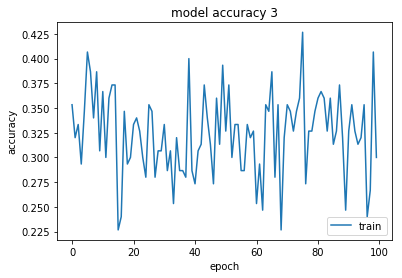

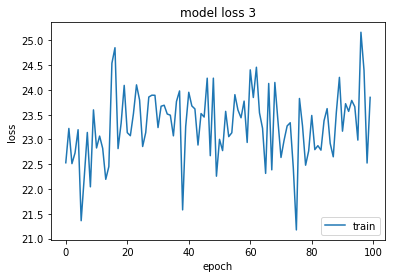

In [145]:
# Grafico para el accuracy
import matplotlib.pyplot as plt
plt.plot(promacc)
plt.title('model accuracy 3')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

# Grafico para el Loss
plt.plot(promerr)
plt.title('model loss 3')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()